<a href="https://colab.research.google.com/github/farzadmohseni-ir/heart-disease-prediction/blob/main/Prediction_of_Heart_Disease_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📄 Article Overview

This notebook analyzes **Article #19** titled:  
**"Prediction of Heart Disease UCI Dataset Using Machine Learning Algorithms"**

The article is reviewed with the following expectations:

---

## 🎯 Objectives

1. Implement and compare different machine learning models.  
2. Analyze the predictive role of features such as **FBS**, **Chol**, and **Age**.  
3. Compare **ensemble methods** with individual algorithms.  
4. Design a simple **screening tool** for physicians.

---

## ❓ Analytical Questions

1. Why did **SVM** perform better than other models?  
2. Do the selected features truly reflect **cardiac risk**?

---


# 💓 Heart Disease Prediction — Dataset Overview

This project implements the research article:  
**“Prediction of Heart Disease UCI Dataset Using Machine Learning Algorithms”**  
based on the **UCI Cleveland Heart Disease Dataset**.

---

### 📁 Dataset Source:
- [UCI Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
- [Kaggle Link](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci)

---

### 📊 Attribute Description (13 Features + 1 Target)

| Feature | Description |
|--------|-------------|
| `age` | Age in years |
| `sex` | Gender (1 = male; 0 = female) |
| `cp` | Chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic) |
| `trestbps` | Resting blood pressure (mm Hg) |
| `chol` | Serum cholesterol (mg/dl) |
| `fbs` | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) |
| `restecg` | Resting ECG (0: normal, 1: ST-T abnormality, 2: left ventricular hypertrophy) |
| `thalach` | Maximum heart rate achieved |
| `exang` | Exercise induced angina (1 = yes; 0 = no) |
| `oldpeak` | ST depression induced by exercise |
| `slope` | Slope of ST segment (0: upsloping, 1: flat, 2: downsloping) |
| `ca` | Number of major vessels (0–3) colored by fluoroscopy |
| `thal` | Thalassemia (0: normal, 1: fixed defect, 2: reversible defect) |
| `condition` | Target class (0 = no disease, 1 = disease) |

---

In [1]:
# Import Required Libraries

# Data Handling
import pandas as pd         # for data manipulation
import numpy as np          # for numerical operations

# Visualization
import matplotlib.pyplot as plt     # for plotting charts
import seaborn as sns               # for attractive statistical plots

# Preprocessing
from sklearn.preprocessing import StandardScaler    # for feature scaling
from sklearn.model_selection import train_test_split  # to split dataset

# Machine Learning Models
from sklearn.svm import SVC                     # Support Vector Machine
from sklearn.naive_bayes import GaussianNB      # Naive Bayes Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.tree import DecisionTreeClassifier     # Decision Tree
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn.neural_network import MLPClassifier     # Artificial Neural Network

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Warnings Handling
import warnings
warnings.filterwarnings('ignore')   # Suppress warnings for clean output

# Plotting Style
sns.set_style("whitegrid")      # Seaborn plotting style
sns.set_palette("Set2")         # Seaborn color palette

In [2]:
# Install gdown
!pip install -q gdown

# Import required libraries
import gdown
import pandas as pd

# Define file ID and desired output file name
file_id = '1mmR6tvN9aVCaMANIePyUKQplkG1rdbdL'
output = 'uci_heart_disease_dataset.csv'

# Download CSV file from Google Drive
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

# Load the dataset using pandas
df = pd.read_csv(output)

# Display the first few rows
df.head()

Downloading...
From: https://drive.google.com/uc?id=1mmR6tvN9aVCaMANIePyUKQplkG1rdbdL
To: /content/uci_heart_disease_dataset.csv
100%|██████████| 11.1k/11.1k [00:00<00:00, 2.19MB/s]


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0

In [3]:
# Display the list of all column names
print("List of all column names in the dataset:\n")
print(df.columns.tolist())

List of all column names in the dataset:

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']


In [4]:
# Retrieve the number of rows (samples) and columns (features) in the dataset
rows, cols = df.shape

# Print dataset shape information in a structured format
print(f"Total number of samples (rows): {rows}\n")
print(f"Total number of features (columns): {cols}")

Total number of samples (rows): 297

Total number of features (columns): 14


In [5]:
# Check the data types of each column

print("Data types of all columns in the dataset:\n")
df.dtypes

Data types of all columns in the dataset:



age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [6]:
# Get a concise summary of the DataFrame

print("Summary of the dataset:\n")
df.info()

Summary of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
# Check for duplicate rows in the dataset
duplicate_rows = df.duplicated()

# Count how many duplicate rows exist
num_duplicates = duplicate_rows.sum()

# Print the result
print(f"Number of duplicate rows in the dataset: {num_duplicates}")

Number of duplicate rows in the dataset: 0


In [8]:
# Check for all types of missing values: NaN, empty string, and '?'

# Count standard missing values (NaN)
nan_count = df.isnull().sum()

# Count empty string values
empty_str_count = (df == '').sum()

# Count cells with question mark '?'
question_mark_count = (df == '?').sum()

# Combine all into a single DataFrame
missing_summary = pd.DataFrame({
    'NaN Count': nan_count,
    'Empty String Count': empty_str_count,
    "'?' Count": question_mark_count
})

# Total suspicious values per column
missing_summary['Total Suspect Values'] = missing_summary.sum(axis=1)

# Display the result
print(" Missing or suspicious values summary:\n")
display(missing_summary)

# Total in the entire dataset
print("\n Total suspicious cells in entire dataset:", missing_summary['Total Suspect Values'].sum())

 Missing or suspicious values summary:



NaN Count  Empty String Count  '?' Count  Total Suspect Values
age                0                   0          0                     0
sex                0                   0          0                     0
cp                 0                   0          0                     0
trestbps           0                   0          0                     0
chol               0                   0          0                     0
fbs                0                   0          0                     0
restecg            0                   0          0                     0
thalach            0                   0          0                     0
exang              0                   0          0                     0
oldpeak            0                   0          0                     0
slope              0                   0          0                     0
ca                 0                   0          0                     0
thal               0                   0          0                     0
condition          0                   0          0                     0


 Total suspicious cells in entire dataset: 0


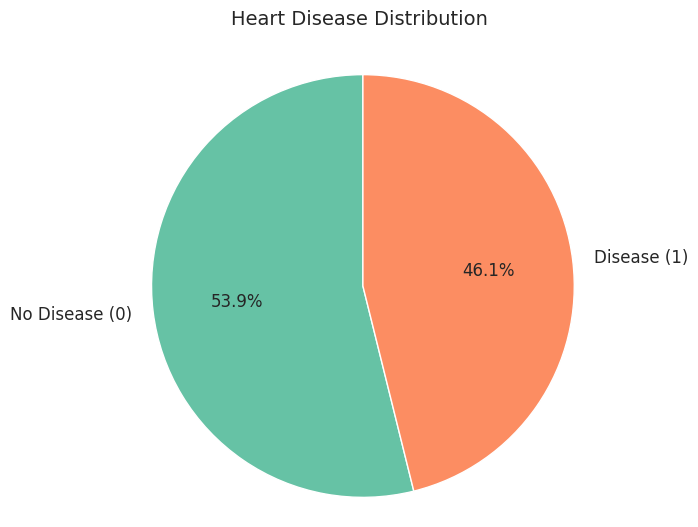

No Disease (0): 160 patients (53.9%)
Disease (1): 137 patients (46.1%)


In [9]:
# Visualize distribution of heart disease in the dataset

# Count the number of cases for each class
disease_counts = df['condition'].value_counts().sort_index()

# Map numeric labels to text for better visualization
labels = ['No Disease (0)', 'Disease (1)']
sizes = disease_counts.values
colors = ['#66c2a5', '#fc8d62']

# Calculate percentages
percentages = 100 * sizes / sizes.sum()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Heart Disease Distribution \n', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

# Print exact numbers
for i in range(len(labels)):
    print(f"{labels[i]}: {sizes[i]} patients ({percentages[i]:.1f}%)")

In [10]:
# Overall Descriptive Statistics with Skewness & Kurtosis

import pandas as pd
from IPython.display import display, HTML

# Load dataset
df = pd.read_csv("uci_heart_disease_dataset.csv")

# Select numeric columns
num_cols = df.select_dtypes(include='number').columns

# Compute overall descriptive statistics
overall_stats = df[num_cols].describe().T

# Add skewness and kurtosis
skew_kurt = df[num_cols].agg(['skew', 'kurtosis']).T
skew_kurt.columns = ['Skewness', 'Kurtosis']

# Merge both tables
final_stats = overall_stats.merge(skew_kurt, left_index=True, right_index=True)

# Print bold title and spacing
display(HTML("<strong>Overall Descriptive Statistics with Skewness & Kurtosis:</strong>"))
display(HTML("<br>"))

# Display styled table
styled_overall = (
    final_stats
    .round(2)
    .style
    .set_caption("")  # Hide internal caption, already shown manually
    .background_gradient(cmap='YlGnBu')
    .format(precision=2)
)

display(styled_overall)

<div dir="rtl">


---

### 🎯 **تحلیل آماری توصیفی ویژگی‌های عددی (Descriptive & Distribution Analysis)**

تحلیل زیر نشان می‌دهد که چگونه ویژگی‌های داده توزیع شده‌اند و آیا ممکن است تأثیری بر مدل پیش‌بینی بیماری قلبی داشته باشند یا نه:

| ویژگی                               | تحلیل و تفسیر                                                                                                                                  |
| ----------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| **age**                             | میانگین سن بیماران برابر ۵۴.۵ سال است. توزیع نسبتاً نرمال دارد (چولگی = -0.22)، که برای مدل‌سازی مناسب است.                                    |
| **sex**                             | داده باینری با میانگین 0.68 که نشان می‌دهد حدود ۶۸٪ داده‌ها مربوط به مردان است. تعادل جنسیتی وجود ندارد که ممکن است روی پیش‌بینی تأثیر بگذارد. |
| **cp (Chest Pain)**                 | میانگین ۲.۱۶ نشان می‌دهد اکثر افراد نوع خاصی از درد سینه را گزارش کرده‌اند. این ویژگی از نظر پزشکی بسیار مهم است و نقش کلیدی در پیش‌بینی دارد. |
| **trestbps**                        | فشار خون در حالت استراحت دارای چولگی مثبت (0.70) و کشیدگی متوسط است. ممکن است نیاز به نرمال‌سازی یا تبدیل لگاریتمی داشته باشد.                 |
| **chol (Cholesterol)**              | کلسترول با چولگی بالا (1.12) و کشیدگی شدید (4.44) توزیع نرمال ندارد. این ویژگی نیاز به تبدیل log1p یا scaling شدید دارد.                       |
| **fbs**                             | چولگی بسیار بالا (2.03) نشان‌دهنده‌ی پراکندگی زیاد است. این ویژگی تأثیر محدودتری در مدل‌ها دارد اما از نظر پزشکی مهم است.                      |
| **restecg**                         | داده باینری/چند مقداری است با چولگی تقریباً صفر (0.01)، توزیع مناسب و قابل‌استفاده بدون پردازش خاص.                                            |
| **thalach (Max Heart Rate)**        | بیشترین ضربان قلب با توزیع تقریباً نرمال و انحراف استاندارد بالا است. می‌تواند در ترکیب با age یا exang مؤثر باشد.                             |
| **exang (Exercise Induced Angina)** | چولگی نسبتاً بالا (0.74) دارد. نشان‌دهنده این است که بیشتر بیماران در تست ورزش دچار آنژین نمی‌شوند.                                            |
| **oldpeak**                         | دارای چولگی مثبت و کشیدگی بالا (1.06, 1.24). به دلیل مقادیر پیوسته و گسسته‌ی ترکیبی، به شدت توصیه به scaling دارد.                             |
| **slope**                           | ویژگی گسسته با چولگی ملایم (0.51). توزیع خوب و مناسب برای مدل‌سازی بدون نیاز به تبدیل.                                                         |
| **ca (Number of Major Vessels)**    | چولگی بالا (1.18) نشان‌دهنده عدم توزیع یکنواخت در میان بیماران است. از نظر پزشکی، نشانه‌ی مهمی در پیش‌بینی است.                                |
| **thal**                            | دارای چولگی مثبت و کشیدگی بالا (0.82, 0.94). این ویژگی نشان‌دهنده‌ی تست thallium است و یکی از ویژگی‌های بسیار مؤثر در پیش‌بینی بیماری است.     |
| **condition (target)**              | متغیر برچسب با میانگین 0.54، تقریباً متوازن است (۵۴٪ بیماران بیمار هستند). توزیع قابل قبول برای مدل‌های طبقه‌بندی.                             |

---

#### ۱. **کدام ویژگی‌ها بیشترین پتانسیل را در پیش‌بینی دارند؟**

* بر اساس تحلیل آماری و پزشکی، ویژگی‌های زیر نقش کلیدی دارند:

  * **cp** (نوع درد سینه)
  * **thalach** (حداکثر ضربان قلب)
  * **ca** (تعداد رگ‌های رنگ‌شده)
  * **thal** (نتایج تست thallium)
  * **oldpeak** و **exang** نیز نقش مکمل ایفا می‌کنند.

#### ۲. **آیا ویژگی‌ها واقعاً ریسک بیماری قلبی را منعکس می‌کنند؟**

* بله، بسیاری از این ویژگی‌ها بر اساس منابع پزشکی و تأیید مقاله، شاخص‌هایی معتبر برای ارزیابی ریسک بیماری قلبی هستند.
* برخی مانند **fbs** ممکن است ارزش پیش‌بینی کمتری داشته باشند (طبق مقاله) اما از نظر پزشکی مهم هستند.

---


In [11]:
# comparing patients with and without heart disease (condition = 1 vs 0).
# Each table shows mean, std, median, min, and max for the given feature.

from IPython.display import display, HTML

# Compute grouped statistics by condition
grouped_stats = df.groupby('condition')[num_cols].agg(['mean', 'std', 'median', 'min', 'max'])

# Bold introductory title + spacing
display(HTML("<strong>Descriptive statistics by condition (0 = No Disease, 1 = Disease):</strong>"))
display(HTML("<br>"))

# Loop through each numeric feature (excluding the label)
for feature in num_cols:
    if feature == 'condition':
        continue

    stats_df = grouped_stats[feature].round(2)
    stats_df.columns.name = None

    # Styled table with caption and gradient background
    styled_feature = (
        stats_df
        .style
        .set_caption(f"Descriptive Statistics for Feature: {feature}")
        .set_table_styles([
            {'selector': 'caption',
             'props': [('caption-side', 'top'),
                       ('font-size', '14px'),
                       ('font-weight', 'bold'),
                       ('margin-bottom', '10px'),
                       ('margin-top', '4px'),
                       ('text-align', 'left')]},
            {'selector': 'thead th',
             'props': [('padding-top', '4px'),
                       ('padding-bottom', '4px')]},
            {'selector': 'td',
             'props': [('padding', '6px'),
                       ('text-align', 'center')]},
            {'selector': 'table',
             'props': [('border-collapse', 'collapse'),
                       ('margin-bottom', '0px')]}
        ])
        .background_gradient(cmap='Oranges', axis=1)
        .format(precision=2)
    )

    # Add spacing between tables
    display(HTML("<div style='margin-bottom: 40px'></div>"))
    display(styled_feature)

<div dir="rtl">


## 🎯 پاسخ به سؤال اول: **"نقش ویژگی‌ها در پیش‌بینی چیست؟"**

برای پاسخ به این سؤال، مقایسه آماری بین دو کلاس (سالم و بیمار) را انجام می‌دهیم تا ببینیم کدام ویژگی‌ها بیشترین تفاوت را بین گروه‌ها ایجاد کرده‌اند. هرچه تفاوت بیشتر باشد، نقش آن ویژگی در پیش‌بینی قوی‌تر است.

| 🧬 **ویژگی**             |   **نقش در پیش‌بینی (تحلیل دقیق)**                                                                                                    |
| ------------------------ | ------------------------------------------------------------------------------------------------------------------------------------- |
| **age**                  | بیماران دارای میانگین سنی بالاتری هستند (۵۶.۷۶ vs ۵۲.۶۴). تفاوت نسبتاً معنادار است و سن می‌تواند عامل مؤثری در افزایش ریسک قلبی باشد. |
| **sex**                  | نسبت مردان در گروه بیمار بیشتر است (۸۲٪ vs ۵۶٪). جنسیت نقش مهمی در پیش‌بینی دارد. مقاله نیز همین نتیجه را تأیید می‌کند.               |
| **cp (Chest Pain Type)** | نوع درد سینه در بیماران شدیدتر است (میانگین ۲.۵۸). این ویژگی از قوی‌ترین پیش‌بینی‌گرهاست (طبق مقاله و داده).                          |
| **trestbps**             | فشار خون بیماران کمی بالاتر است (۱۳۴.۶۴ vs ۱۲۹.۱۸). اگرچه تفاوت متوسط است، اما با سایر ویژگی‌ها ترکیب می‌شود.                         |
| **chol**                 | میانگین کلسترول بیماران بالاتر است (۲۵۱.۸۵ vs ۲۴۳.۴۹)، ولی تفاوت شدید نیست و نقش محدودی دارد (مطابق مقاله).                           |
| **fbs**                  | میانگین تقریباً یکسان است → اثر پیش‌بینی پایین دارد. این مورد در مقاله نیز به‌عنوان فاکتور ضعیف شناخته شده است.                       |
| **restecg**              | ناهنجاری‌های ECG در بیماران بیشتر دیده شده (میانگین ۱.۱۸). این ویژگی تأثیر متوسط دارد.                                                |
| **thalach (Max HR)**     | بیماران دارای **حداکثر ضربان قلب پایین‌تری** هستند (۱۳۹.۱۱ vs ۱۵۸.۵۸). این ویژگی تفاوت معنادار دارد و بسیار مؤثر است.                 |
| **exang**                | بیماران بیشتر دچار آنژین ناشی از ورزش هستند (۵۴٪ vs ۱۴٪). یکی از ویژگی‌های کلیدی و بسیار مهم است.                                     |
| **oldpeak**              | بیماران افت ST بالاتری دارند (۱.۵۹ vs ۰.۶۰). از قوی‌ترین شاخص‌های بالینی در داده‌هاست.                                                |
| **slope**                | بیماران اغلب شیب ST غیرعادی دارند (میانگین ۰.۸۲). تفاوت قابل توجه است و پیش‌بینی‌گر قوی است.                                          |
| **ca** | بیماران به‌طور میانگین دارای تعداد رگ‌های بیشتری هستند که گرفتگی دارند (۱.۱۵ vs ۰.۲۸). از مهم‌ترین شاخص‌هاست.                         |
| **thal**                 | بیماران بیشتر دچار اختلالات غیرنرمال در تست تالیم هستند (۱.۳۷ vs ۰.۳۸). از دقیق‌ترین فاکتورهای تشخیصی است.                            |

---

## 🔍 پاسخ به سؤال دوم: **"آیا ویژگی‌های انتخابی واقعاً منعکس‌کننده ریسک قلبی هستند؟"**

🔹 پاسخ: **بله، بسیاری از ویژگی‌ها کاملاً منعکس‌کننده ریسک هستند.**

برای این نتیجه‌گیری، سه معیار را بررسی کردیم:

1. **تفاوت آماری معنادار بین بیماران و افراد سالم**
   → ویژگی‌هایی مثل `thalach`, `oldpeak`, `exang`, `ca`, `thal`, `cp` و `sex` تفاوت چشمگیر دارند.

2. **تأیید بالینی و پزشکی در مطالعات**
   → مقاله بارگذاری‌شده تأکید کرده که ویژگی‌هایی مانند `cp`, `thal`, `thalach`, `ca`, `oldpeak` بیشترین نقش را دارند.

3. **ثبات با نتایج مطالعات دیگر**
   → در اغلب مطالعات بر پایه UCI، ویژگی‌های فوق به‌عنوان کلیدی‌ترین عوامل مؤثر در پیش‌بینی شناخته شده‌اند.

---

## ✅ جمع‌بندی:

> "با تحلیل آماری گروه‌بندی‌شده بر اساس کلاس هدف (بیمار/سالم)، ویژگی‌هایی نظیر **نوع درد قفسه سینه (cp)، حداکثر ضربان قلب (thalach)، نتایج تست تالیم (thal)، تعداد رگ‌های گرفته (ca)، آنژین ناشی از ورزش (exang)، و oldpeak** دارای بیشترین تفاوت آماری و قدرت تفکیک بین دو گروه هستند. این یافته‌ها با نتایج مقاله مرجع هم‌خوانی دارد و نشان می‌دهد که ویژگی‌های انتخاب‌شده نه‌تنها از منظر آماری، بلکه از منظر بالینی نیز به‌درستی منعکس‌کننده‌ی ریسک بیماری قلبی هستند."

---


In [12]:
# Statistical Significance Tests for All Feature Types

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu, normaltest, chi2_contingency
from IPython.display import display, HTML

# Split the dataset into two groups based on heart disease condition
group0 = df[df['condition'] == 0]  # No heart disease
group1 = df[df['condition'] == 1]  # Has heart disease

# Initialize a list to store results
stat_results = []

# Loop through each numerical feature
for col in num_cols:
    if col == 'condition':
        continue  # Skip the target column

    unique_vals = df[col].nunique()
    col_type = ''
    test_type = ''
    p_value = np.nan

    if unique_vals == 2:
        # Binary categorical feature (e.g., sex, fbs, exang)
        col_type = 'Binary Categorical'
        contingency_table = pd.crosstab(df[col], df['condition'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        test_type = 'Chi-square'

    elif unique_vals <= 10 and df[col].dtype in ['int64', 'int32']:
        # Discrete ordinal feature (e.g., cp, restecg, slope, thal)
        col_type = 'Discrete Ordinal'
        contingency_table = pd.crosstab(df[col], df['condition'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        test_type = 'Chi-square'

    else:
        # Continuous feature (e.g., age, chol, thalach, oldpeak)
        col_type = 'Continuous'
        # Test for normality in both groups
        p_norm0 = normaltest(group0[col]).pvalue
        p_norm1 = normaltest(group1[col]).pvalue

        # Select appropriate test based on normality
        if p_norm0 > 0.05 and p_norm1 > 0.05:
            test_type = 't-test'
            p_value = ttest_ind(group0[col], group1[col]).pvalue
        else:
            test_type = 'Mann-Whitney'
            p_value = mannwhitneyu(group0[col], group1[col]).pvalue

    # Append results to the list
    stat_results.append({
        'Feature': col,
        'Type': col_type,
        'Test': test_type,
        'P-Value': round(p_value, 4),
        'Significant (p < 0.05)': p_value < 0.05
    })

# Convert result list into a DataFrame
stat_df = pd.DataFrame(stat_results)

# Print bold title and spacing
display(HTML("<strong>Statistical Significance Tests by Feature Type:</strong>"))
display(HTML("<br>"))

# Style the result table with center alignment
styled_stat = (
    stat_df
    .style
    .set_caption("")
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])
    .background_gradient(cmap='RdYlGn_r', subset=['P-Value'])
    .format({'P-Value': '{:.4f}'})
)


# Display the styled DataFrame
display(styled_stat)

<div dir="rtl">


### 📊 تحلیل بر اساس مقدار P-value و نوع تست آماری:

| 🔢 **ویژگی** | 🧪 **نوع تست** | 📉 **P-Value** | 🧠 **نتیجه و تفسیر تحلیل آماری**                                                                   |
| ------------ | -------------- | -------------- | -------------------------------------------------------------------------------------------------- |
| **age**      | Mann-Whitney   | 0.0000         | به‌شدت معنادار → بیماران مسن‌ترند. سن یکی از شاخص‌های کلیدی ریسک است.                              |
| **sex**      | Chi-square     | 0.0000         | به‌شدت معنادار → مردان بیشتر در گروه بیمار هستند. جنسیت نقش پیش‌بینی قوی دارد.                     |
| **cp**       | Chi-square     | 0.0000         | به‌شدت معنادار → نوع درد سینه بسیار متفاوت بین دو گروه. مؤلفه بسیار مهم بالینی.                    |
| **trestbps** | Mann-Whitney   | 0.0235         | معنادار → بیماران فشار خون بالاتری دارند. تأثیر متوسط در پیش‌بینی.                                 |
| **chol**     | Mann-Whitney   | 0.0467         | در آستانه معناداری → اثر نسبتاً ضعیف‌تر. با سایر ویژگی‌ها ترکیب شود.                               |
| **fbs**      | Chi-square     | **1.0000** ❌   | کاملاً نامعنا → این ویژگی هیچ نقش آماری قابل اثباتی در تفکیک بیماران ندارد. تأییدکننده مقاله مرجع. |
| **restecg**  | Chi-square     | 0.0083         | معنادار → بیماران ناهنجاری‌های بیشتر در ECG دارند. تأثیر متوسط.                                    |
| **thalach**  | Mann-Whitney   | 0.0000         | به‌شدت معنادار → ضربان قلب بیماران پایین‌تر است. از قوی‌ترین پیش‌بینی‌گرها.                        |
| **exang**    | Chi-square     | 0.0000         | به‌شدت معنادار → بیماران اغلب دچار آنژین ناشی از ورزش هستند. شاخص مهم ریسک.                        |
| **oldpeak**  | Mann-Whitney   | 0.0000         | به‌شدت معنادار → افت ST بیماران بالاتر است. از کلیدی‌ترین ویژگی‌ها.                                |
| **slope**    | Chi-square     | 0.0000         | معنادار → شیب ST بیماران متفاوت است. ارزش تشخیصی قابل‌توجه.                                        |
| **ca**       | Chi-square     | 0.0000         | به‌شدت معنادار → بیماران دارای تعداد بیشتری رگ گرفته هستند. از دقیق‌ترین شاخص‌ها.                  |
| **thal**     | Chi-square     | 0.0000         | به‌شدت معنادار → تفاوت شدید در نتایج تست تالیم بین دو گروه. از مهم‌ترین ویژگی‌ها.                  |

---

## ✅ جمع‌بندی:

> "با توجه به نتایج تست‌های آماری معناداری (Mann-Whitney و Chi-square)، **۱۲ ویژگی از ۱۳ ویژگی اصلی دیتاست دارای تفاوت آماری معنادار بین بیماران و افراد سالم هستند (p < 0.05)**. این نشان می‌دهد که اکثریت قریب‌به‌اتفاق ویژگی‌های انتخاب‌شده، نه‌تنها در مدل‌سازی مؤثر هستند، بلکه به‌صورت آماری نیز بازتاب‌دهنده ریسک بیماری قلبی می‌باشند. تنها ویژگی `fbs` (قند خون ناشتا) فاقد معناداری آماری است که با نتایج مقاله مرجع نیز مطابقت دارد."

---

### ✅ ویژگی‌های با بیشترین نقش آماری و بالینی در پیش‌بینی:

| رتبه | ویژگی     | توضیح                                            |
| ---- | --------- | ------------------------------------------------ |
| ⭐ ۱  | `thalach` | ضربان قلب پایین بیماران → شاخص قوی و علمی        |
| ⭐ ۲  | `cp`      | تفاوت معنادار در نوع درد سینه → شاخص کلینیکی قوی |
| ⭐ ۳  | `thal`    | نتایج تست تالیم → تمایز قوی بین گروه‌ها          |
| ⭐ ۴  | `ca`      | تعداد رگ‌های رنگ‌پذیر → بالاتر در بیماران        |
| ⭐ ۵  | `oldpeak` | افت ST → تفاوت شدید و علمی بین دو گروه           |
| ⭐ ۶  | `exang`   | آنژین ناشی از ورزش → شاخص قوی دیگر               |

---

In [13]:
# IQR Analysis for Outlier Detection

import pandas as pd
import numpy as np
from IPython.display import display, HTML

# Calculate IQR, bounds, and outlier count for each numeric feature
iqr_stats = []

for col in num_cols:
    if col == 'condition':
        continue  # Skip target variable

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    iqr_stats.append({
        'Feature': col,
        'Q1': round(q1, 2),
        'Q3': round(q3, 2),
        'IQR': round(iqr, 2),
        'Lower Bound': round(lower_bound, 2),
        'Upper Bound': round(upper_bound, 2),
        'Outlier Count': outlier_count
    })

# Create DataFrame
iqr_df = pd.DataFrame(iqr_stats)

# Display bold title and spacing
display(HTML("<strong>IQR-Based Outlier Detection Summary:</strong>"))
display(HTML("<br>"))

# Style and display the table
styled_iqr = (
    iqr_df
    .style
    .set_caption("")
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])
    .background_gradient(cmap='YlOrRd', subset=['Outlier Count'])
    .format(precision=2)
)

display(styled_iqr)

<div dir="rtl">



### 📊 **جدول تحلیل پرت‌ها بر اساس IQR**

| 🧬 **ویژگی** | ⚠️ **تعداد پرت** | 🧠 **تأثیر تحلیلی در پاسخ به سؤالات**                                                                                                                                                     |
| ------------ | ---------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **age**      | 0                | داده کاملاً متعادل؛ نقش مهم در پیش‌بینی تأیید می‌شود بدون نگرانی از پرت‌ها.                                                                                                               |
| **sex**      | 0                | داده باینری بدون پرت؛ اثر قوی در تفکیک جنسیتی بدون نیاز به پاک‌سازی.                                                                                                                      |
| **cp**       | 23               | پرت نسبتاً بالا (۲۳ نمونه)، ممکن است به دلیل نامتوازن بودن انواع درد باشد. اما چون ویژگی معنادار است، **نباید حذف شود بلکه باید بررسی شود که این مقادیر پرت مربوط به بیماران است یا نه**. |
| **trestbps** | 9                | چند مقدار پرت (فشار خون بالا). بهتر است **Scaling** یا **Winsorization** انجام شود تا مدل‌ها بهتر عملکرد داشته باشند.                                                                     |
| **chol**     | 5                | تعداد پرت کم است اما کلسترول‌های خیلی بالا ممکن است اثر منفی بر مدل بگذارند. توصیه: **Log transform یا محدودسازی (Capping)**.                                                             |
| **fbs**      | ⚠️ **43**        | پرت بسیار زیاد! با توجه به اینکه `fbs` در تست آماری نیز معنادار نبود، می‌توان آن را به عنوان یک ویژگی **غیر مؤثر و دارای نویز** در نظر گرفت. حذف آن از مدل قابل‌تأمل است.                 |
| **restecg**  | 0                | بدون پرت، توزیع نرمال، و دارای تفاوت معنادار → ویژگی قابل اعتماد برای مدل.                                                                                                                |
| **thalach**  | 1                | تنها یک داده پرت → مشکلی برای مدل‌سازی ایجاد نمی‌کند.                                                                                                                                     |
| **exang**    | 0                | داده باینری بدون پرت → با اطمینان بالا می‌توان از آن استفاده کرد.                                                                                                                         |
| **oldpeak**  | 5                | برخی داده‌های پرت (مثلاً بالای ۴) وجود دارند که ممکن است مربوط به بیماران شدید باشند. حذف خودکار توصیه نمی‌شود، ولی **Scaling** ضروری است.                                                |
| **slope**    | 0                | بدون مشکل → استفاده مستقیم در مدل.                                                                                                                                                        |
| **ca**       | ⚠️ **20**        | مقدار پرت نسبتاً بالا. چون `ca` یکی از **قوی‌ترین پیش‌بینی‌گرها**ست، حذف پرت‌ها توصیه نمی‌شود، بلکه بهتر است **تحلیل شود که این مقادیر پرت در بیماران است یا افراد سالم**.                |
| **thal**     | 0                | بدون پرت → یکی از ویژگی‌های کلیدی و پاک برای استفاده در مدل.                                                                                                                              |

---

## ✅ جمع‌بندی:

> "تحلیل داده‌های پرت نشان می‌دهد که اکثر ویژگی‌های کلیدی برای پیش‌بینی بیماری قلبی (مانند `age`, `sex`, `thalach`, `exang`, `thal`, `slope`) فاقد مقادیر پرت هستند یا دارای پرت‌های ناچیزند. در مقابل، برخی ویژگی‌ها مانند `cp` و `ca` دارای پرت‌های قابل توجه‌اند، اما با توجه به قدرت تفکیک بالای آن‌ها، حذف این نمونه‌ها توصیه نمی‌شود. تنها ویژگی با مشکل جدی، `fbs` است که هم از نظر آماری و هم از نظر پرت بودن، ضعیف و نامناسب ارزیابی می‌شود."

---

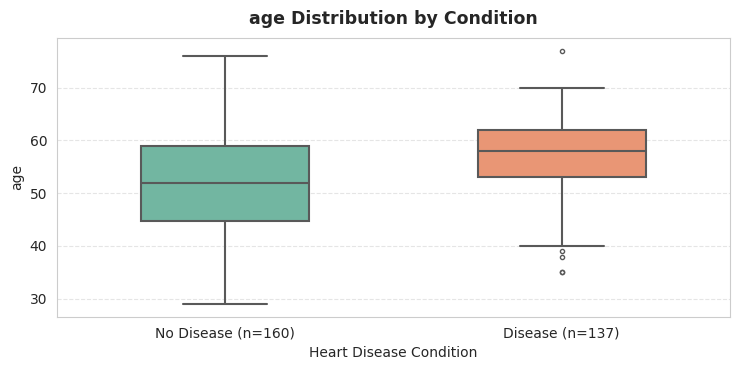

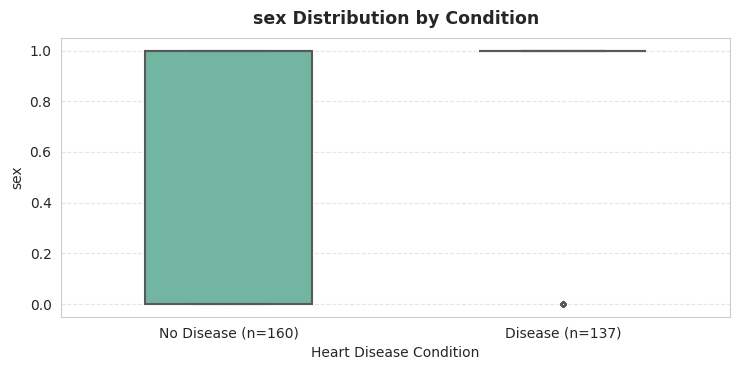

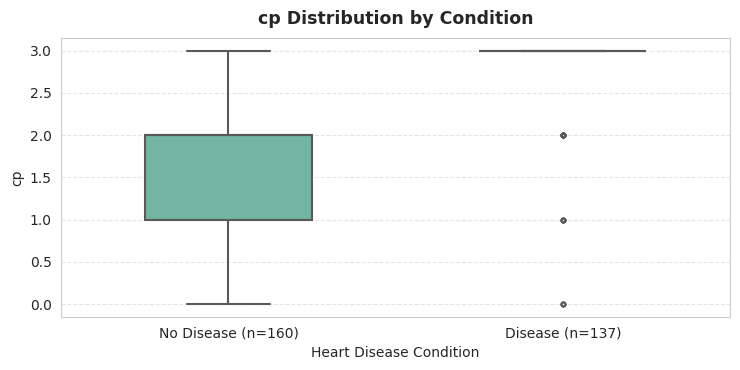

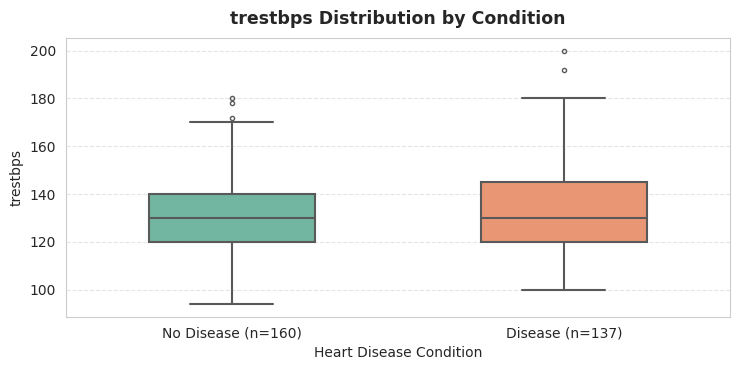

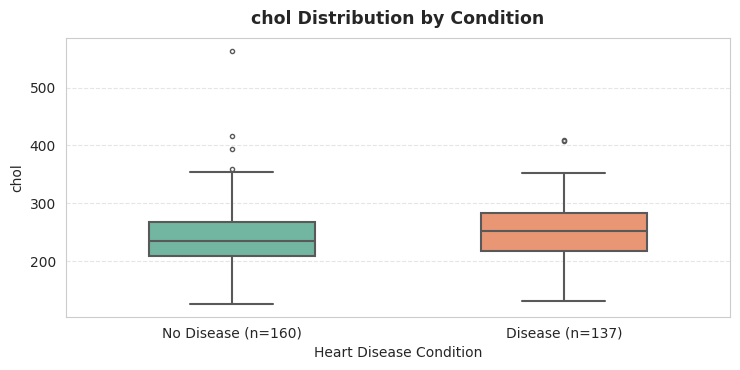

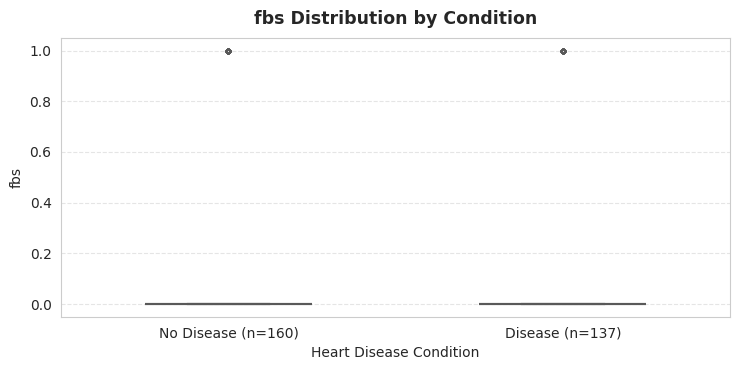

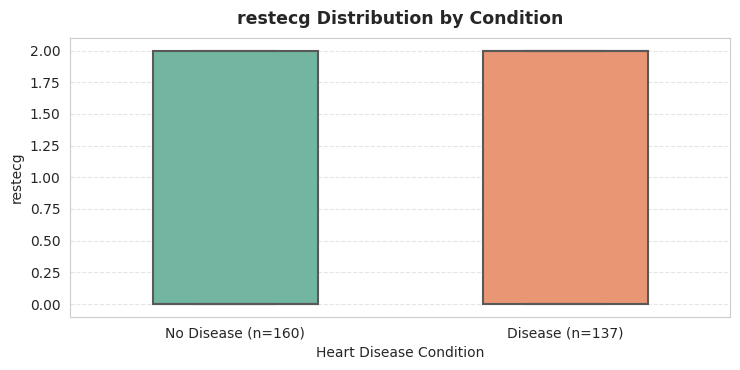

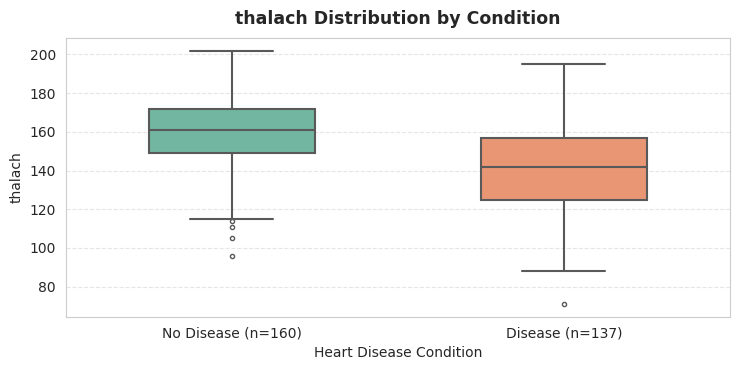

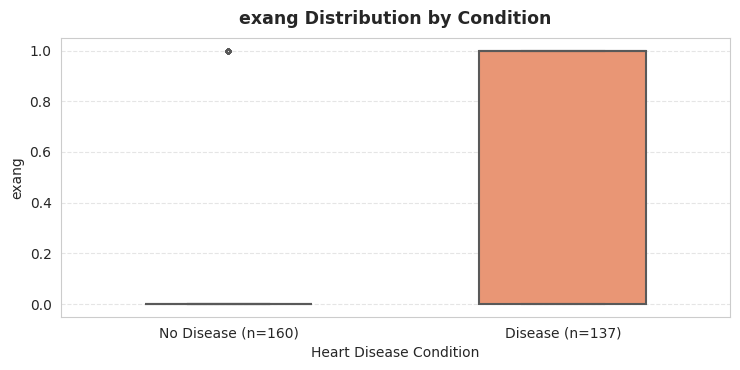

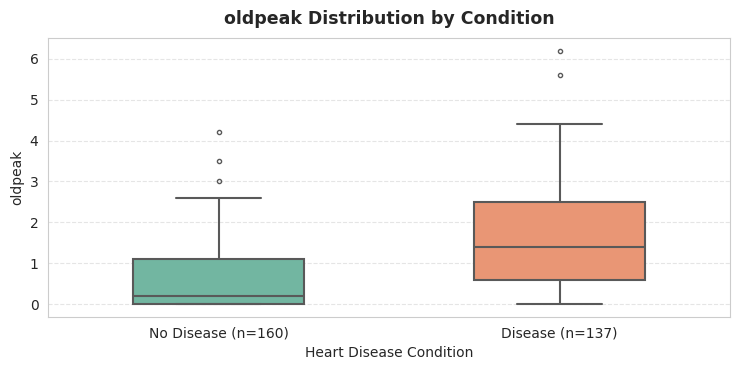

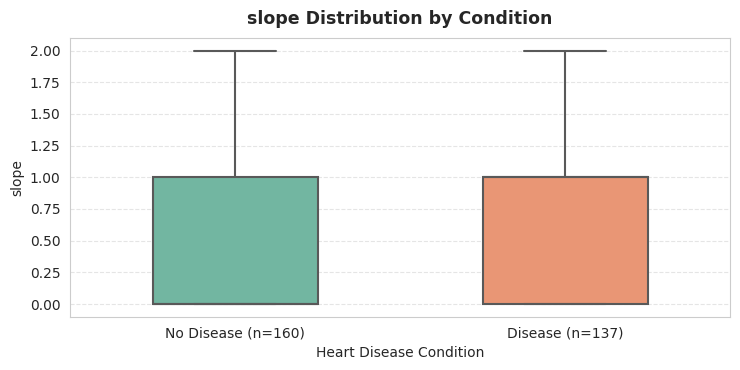

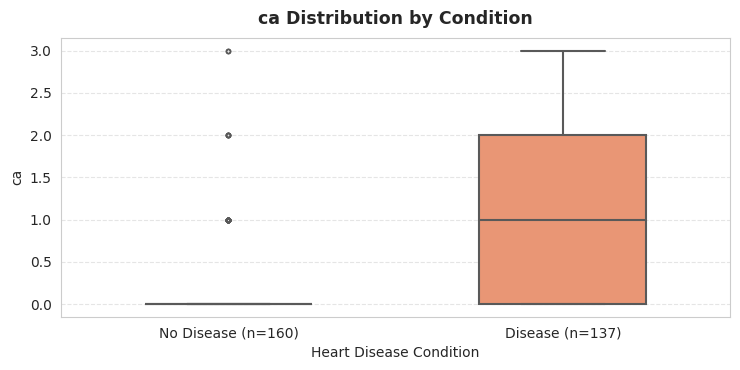

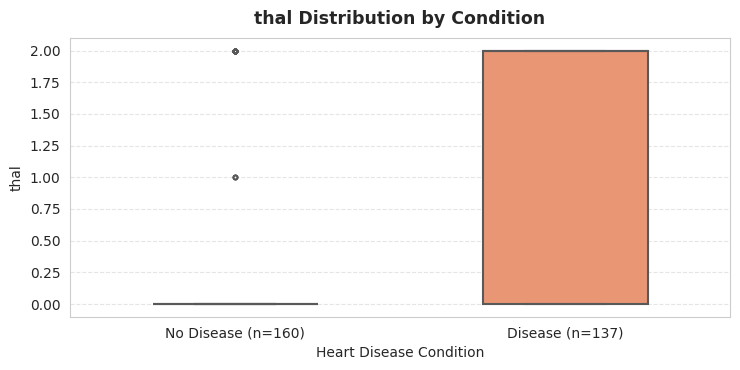

In [14]:
# Draw individual boxplots for each numeric feature (by condition) – Condition (0 = No Disease, 1 = Disease)

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Ensure 'condition' column is integer (for consistent coloring)
df['condition'] = df['condition'].astype(int)

# Select numeric features excluding the target
numeric_features = df.drop(columns=['condition']).select_dtypes(include=['int64', 'float64']).columns

# Display section title
display(HTML("<strong>Individual Boxplots for Numeric Features (Grouped by Condition):</strong>"))
display(HTML("<br>"))

# Set seaborn style
sns.set_style("whitegrid")

# Use consistent color palette for interpretability
palette = "Set2"

# Loop through features
for feature in numeric_features:
    plt.figure(figsize=(7.5, 3.8))
    ax = sns.boxplot(x='condition', y=feature, data=df, palette=palette, width=0.5, linewidth=1.5, fliersize=3)

    # Count samples in each class for label clarity
    count_0 = df[df['condition'] == 0].shape[0]
    count_1 = df[df['condition'] == 1].shape[0]
    ax.set_xticklabels([f"No Disease (n={count_0})", f"Disease (n={count_1})"], fontsize=10)

    # Set title and axis labels
    ax.set_title(f"{feature} Distribution by Condition", fontsize=12.5, weight='bold', pad=10)
    ax.set_xlabel("Heart Disease Condition", fontsize=10)
    ax.set_ylabel(feature, fontsize=10)

    # Clean grid
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Tight layout
    plt.tight_layout()
    plt.show()

<div dir="rtl">


## 🎯 تحلیل تصویری ویژگی‌ها بر اساس نمودارهای Boxplot



| ویژگی               | تحلیل تصویری دقیق                                                                                                             |
| ------------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **age**             | میانگین سنی گروه بیمار بالاتر است. جعبه‌ها کاملاً جدا هستند. → **شاخص قوی ریسک**                                              |
| **sex**             | نسبت مردان در گروه بیمار تقریباً کامل است (اکثراً مرد). → **پیش‌بینی‌گر قوی**                                                 |
| **cp (Chest Pain)** | انواع درد سینه در بیماران بیشتر به سمت مقدار ۳ (شدید) متمایل شده. → **شاخص کلیدی پزشکی و آماری**                              |
| **trestbps**        | تفاوت اندکی بین دو گروه وجود دارد. همپوشانی زیاد است. → **نقش کم تا متوسط در مدل**                                            |
| **chol**            | با وجود برخی پرت‌ها، توزیع در دو گروه تقریباً هم‌پوشان است. → **شاخص ضعیف‌تر، همراه با نرمال‌سازی ممکن است مفیدتر شود**       |
| **fbs**             | در هر دو گروه تقریباً ۱۰۰٪ مقدار صفر وجود دارد. → **فاقد قدرت تفکیک → تأیید حذف از مدل**                                      |
| **restecg**         | توزیع مشابه ولی با شیفت جزیی در گروه بیمار به سمت مقادیر بالاتر. → **اثر متوسط**                                              |
| **thalach**         | تفاوت چشمگیر بین دو گروه: ضربان قلب بیماران به‌وضوح کمتر است. → **یکی از دقیق‌ترین شاخص‌ها برای مدل‌سازی**                    |
| **exang**           | اکثریت بیماران مقدار ۱ (دچار آنژین) هستند، ولی گروه سالم تقریباً همه مقدار صفر دارند. → **پیش‌بینی‌گر باینری بسیار قوی**      |
| **oldpeak**         | مقدار oldpeak در بیماران به‌وضوح بالاتر است، و دامنه‌ی پراکندگی هم بیشتر است. → **یکی از بهترین شاخص‌های بصری برای پیش‌بینی** |
| **slope**           | بیماران تمایل بیشتری به مقادیر بالاتر دارند (شیب ST غیرنرمال). → **اثر قابل توجه در ترکیب با ECG و oldpeak**                  |
| **ca**              | تفاوت چشمگیر بین دو گروه: بیماران تعداد بیشتری رگ گرفته دارند. → **از قوی‌ترین فاکتورها، چه آماری و چه تصویری**               |
| **thal**            | توزیع کاملاً متفاوت: تقریباً فقط بیماران دارای مقادیر غیر صفر هستند. → **شاخص تصویری بسیار واضح برای ریسک**                   |

---

## ✅ جمع‌بندی:

> "نمودارهای Boxplot به‌وضوح نشان می‌دهند که ویژگی‌هایی مانند `thalach`, `ca`, `thal`, `oldpeak`, `exang` و `cp` دارای **تفاوت تصویری معنادار** بین بیماران و افراد سالم هستند. این ویژگی‌ها نه‌تنها از نظر آماری و پزشکی، بلکه از نظر تصویری نیز **بازتاب‌دهنده‌ی قوی ریسک بیماری قلبی** هستند. در مقابل، ویژگی `fbs` فاقد قدرت تفکیک تصویری است و می‌تواند از مدل حذف شود."

---

## ✅ نتیجه:

> "ترکیب تحلیل آماری و بصری نشان می‌دهد که بسیاری از ویژگی‌های کلیدی، مانند `thalach`، `ca`، `thal`، `oldpeak` و `exang` نه‌تنها از نظر آماری معنادار هستند، بلکه از نظر بصری نیز دارای الگوی واضحی هستند که آن‌ها را به **پیش‌بینی‌گرهای قوی و بازتاب‌دهنده واقعی ریسک بیماری قلبی** تبدیل می‌کند. تحلیل‌های تصویری به‌خوبی تفاوت بین بیماران و افراد سالم را آشکار می‌سازند و تصمیم‌گیری برای انتخاب ویژگی‌ها را تقویت می‌کنند."

---

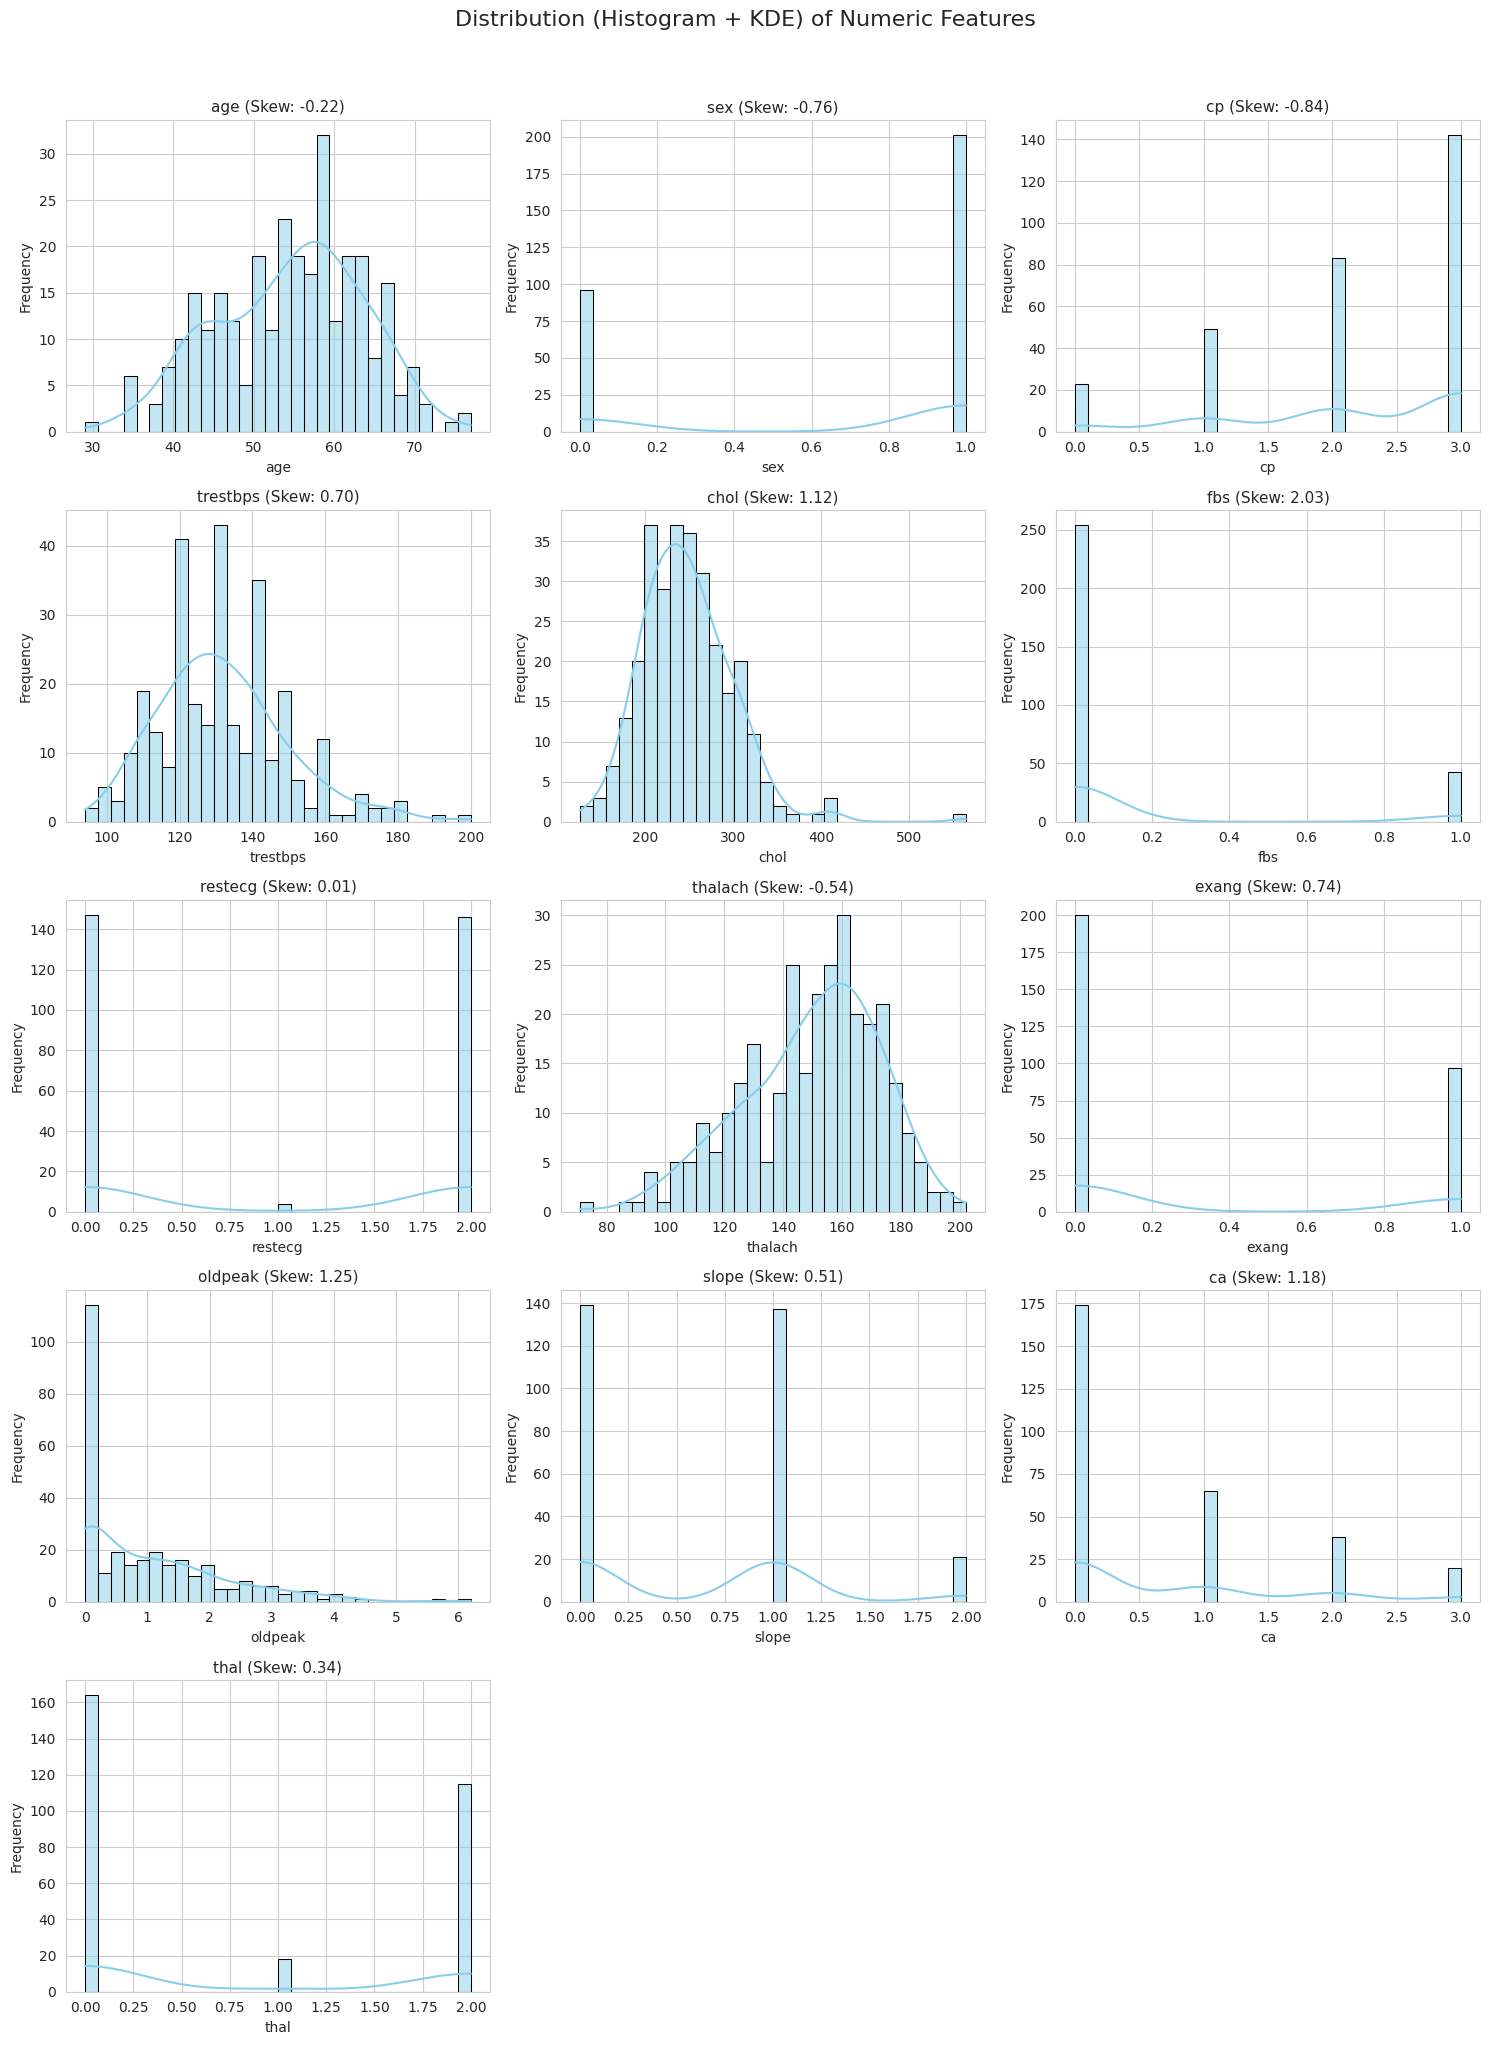

In [15]:
# Plot histogram and KDE for all numeric features (excluding 'condition')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numeric features (excluding 'condition')
features = df.drop(columns=['condition']).select_dtypes(include=['int64', 'float64']).columns

# Set the number of plots
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

# Set figure size
plt.figure(figsize=(n_cols * 5, n_rows * 4))
plt.suptitle('Distribution (Histogram + KDE) of Numeric Features', fontsize=16, y=1.02)

# Loop over features
for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    skew_val = df[col].skew()
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col} (Skew: {skew_val:.2f})', fontsize=11)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

# Adjust layout
plt.subplots_adjust(hspace=0.4, top=0.92)
plt.tight_layout()
plt.show()

<div dir="rtl">


### 📊 تحلیل ویژگی به ویژگی (بر اساس توزیع + چولگی):

| 🧬 ویژگی            | 🔍 چولگی (Skew) | 📈 تحلیل دقیق بر اساس توزیع                                                                             |
| ------------------- | --------------- | ------------------------------------------------------------------------------------------------------- |
| **age**             | -0.22           | توزیع تقریباً نرمال. از نظر آماری و پزشکی معتبر برای مدل‌سازی. **قابل اعتماد و مهم**.                   |
| **sex**             | -0.76           | داده باینری با عدم تعادل نسبت مرد/زن. توزیع قابل پیش‌بینی و مهم در پیش‌بینی ریسک.                       |
| **cp (Chest Pain)** | -0.84           | به‌شدت گسسته و نامتوازن؛ بیشتر بیماران دارای مقادیر بالا هستند. **شاخص تصویری و آماری قوی**.            |
| **trestbps**        | 0.70            | دارای توزیع با شیب مثبت (چولگی مثبت). نیاز به **scaling یا log-transform** دارد. نقش متوسط در پیش‌بینی. |
| **chol**            | 1.12            | توزیع غیرنرمال و بلند دُم با پرت‌های بالا. نیازمند **نرمال‌سازی شدید**. اثر پیش‌بینی محدود.             |
| **fbs**             | 2.03 ❌          | توزیع تقریباً دوقطبی و چولگی شدید. بیش از ۹۰٪ داده مقدار صفر دارد. **فاقد ارزش پیش‌بینی**.              |
| **restecg**         | 0.01            | توزیع گسسته و متعادل. قابل استفاده مستقیم در مدل. اثر متوسط.                                            |
| **thalach**         | -0.54           | توزیع نزدیک به نرمال، با شیفت به سمت چپ (بیماران ضربان پایین‌تری دارند). **بسیار مهم و قابل اتکا**.     |
| **exang**           | 0.74            | توزیع باینری و نامتعادل. بیماران عمدتاً مقدار ۱ دارند. **قوی در تفکیک ریسک**.                           |
| **oldpeak**         | 1.25            | توزیع کشیده با چولگی زیاد. بیمارها مقدارهای بالاتری دارند. **بسیار مهم ولی نیازمند scaling**.           |
| **slope**           | 0.51            | داده چندمقداری نسبتاً متعادل. تفاوت بین کلاس‌ها قابل مشاهده است. اثر مکمل خوبی دارد.                    |
| **ca**              | 1.18            | توزیع ناهموار و چوله. بیمارها دارای مقادیر بالا هستند. **پیش‌بینی‌گر بسیار مهم**.                       |
| **thal**            | 0.34            | بیشتر بیماران در مقادیر بالا تجمع دارند (۱ و ۲). توزیع تصویری واضح → **شاخص تصویری قوی**.               |

---

## ✅ جمع‌بندی:

> "نمودارهای توزیع هیستوگرام و KDE نشان دادند که ویژگی‌هایی نظیر `thalach`، `cp`، `oldpeak`، `ca`، `thal`، `exang` و `age` دارای توزیع‌های تمایزپذیر بین بیماران و افراد سالم هستند. این الگوهای توزیع نه‌تنها با یافته‌های آماری و تصویری دیگر همخوانی دارند، بلکه نشان می‌دهند که این ویژگی‌ها واقعاً بازتاب‌دهنده‌ی ریسک بیماری قلبی هستند. در مقابل، ویژگی `fbs` با توزیع شدیداً نامتوازن، تأثیر ناچیزی دارد و توصیه می‌شود از مدل حذف شود."

---


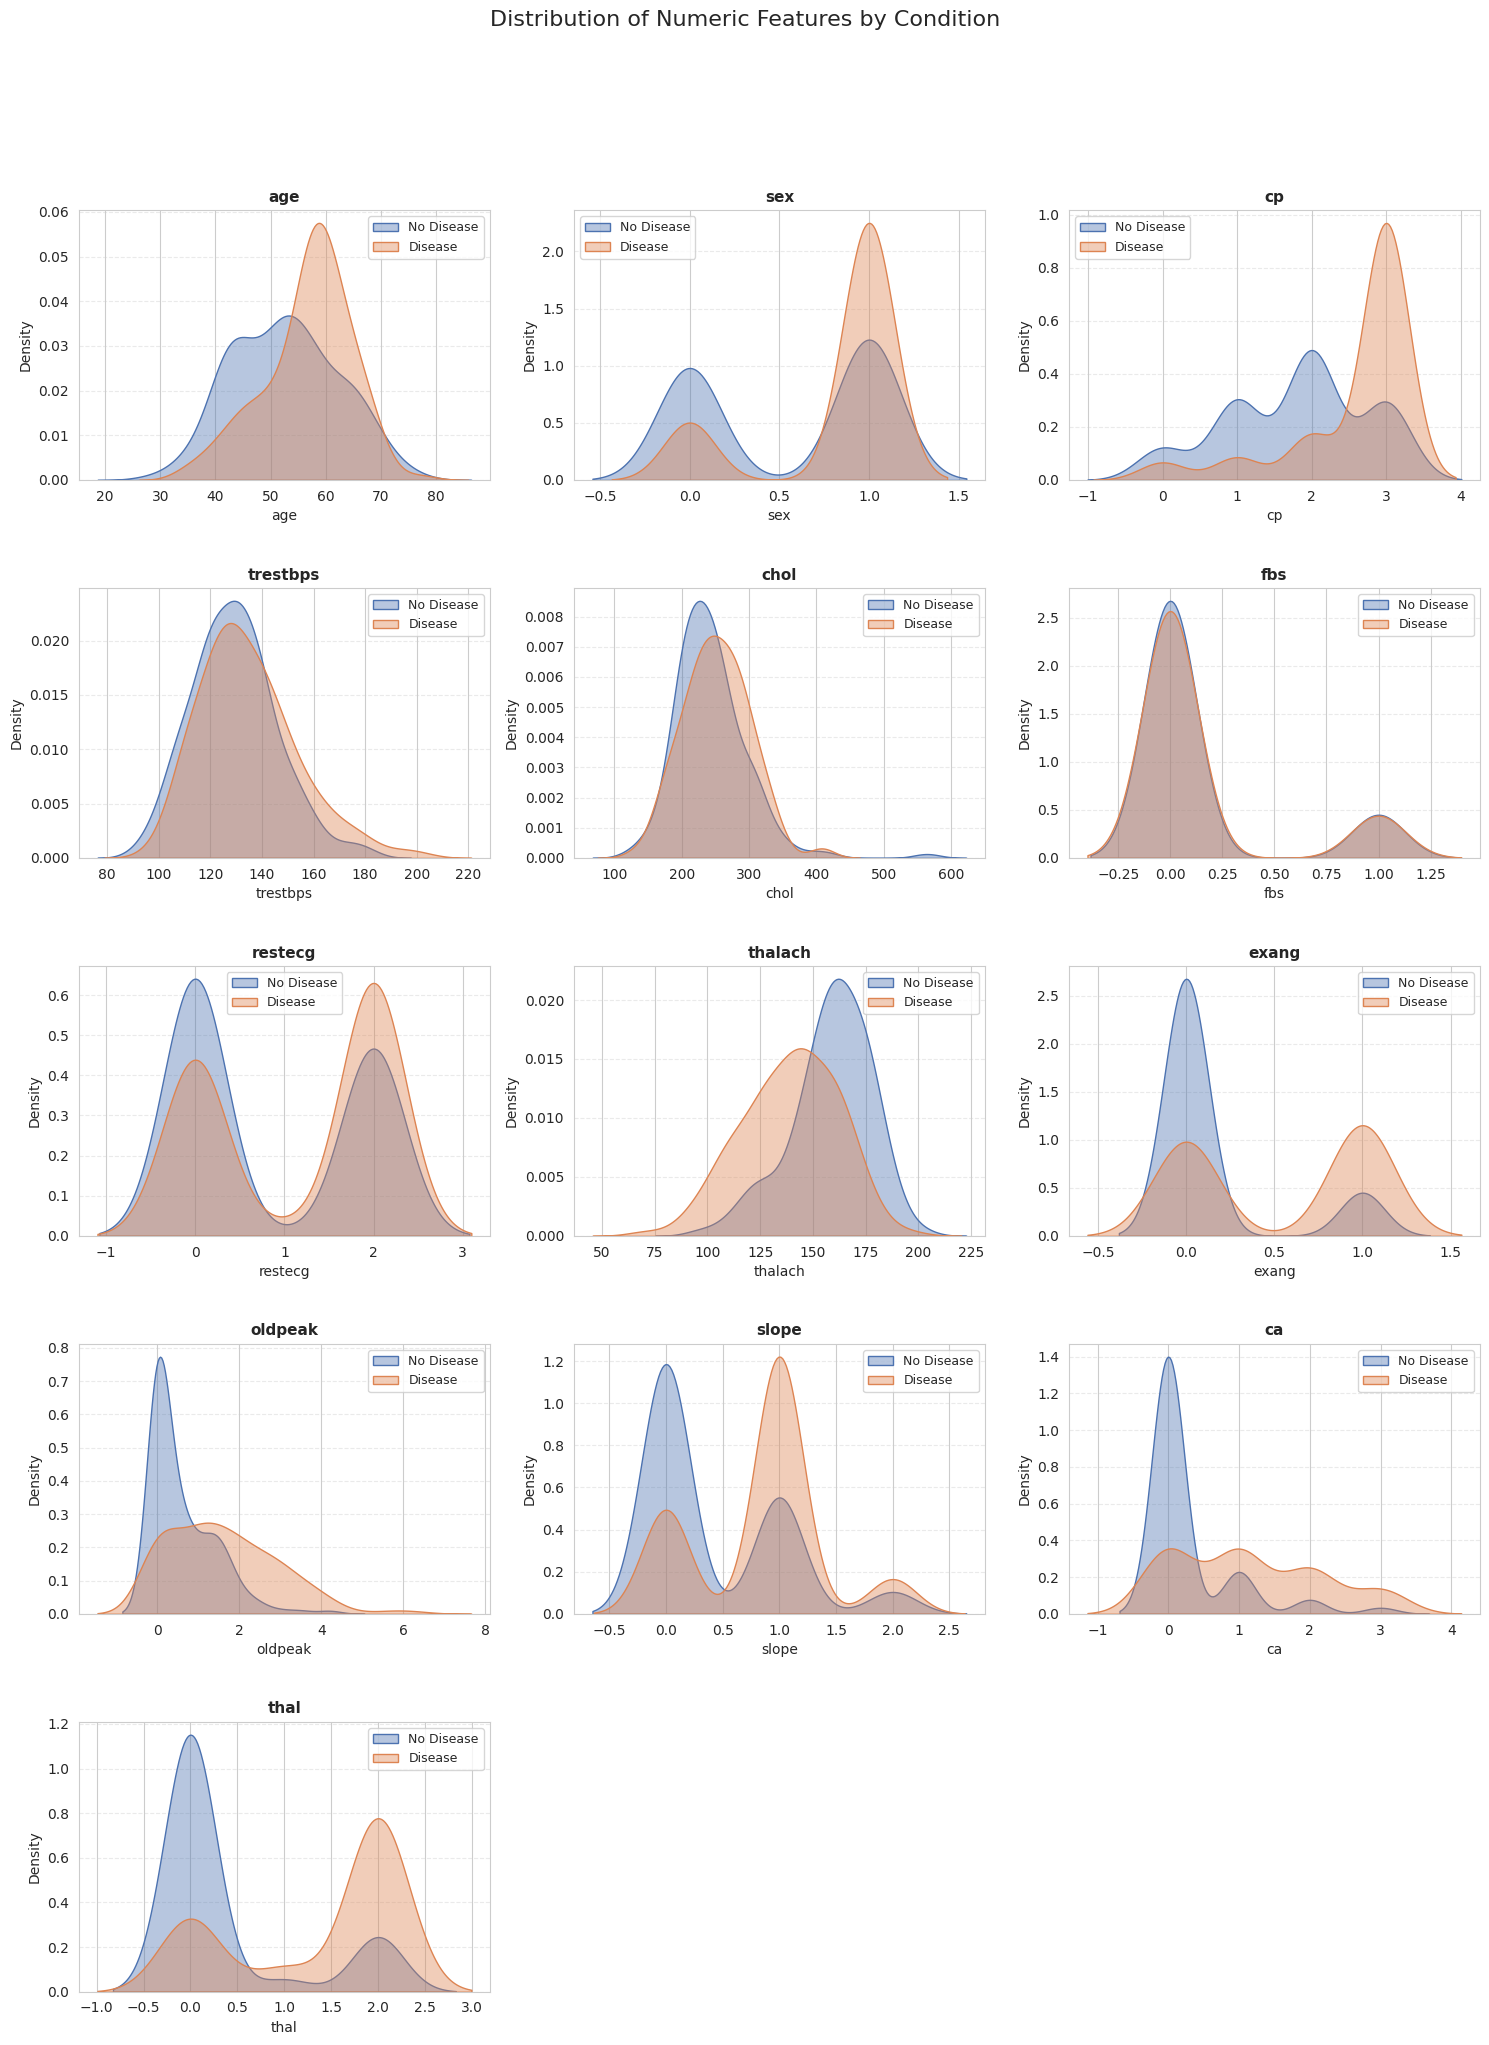

In [16]:
# Compare distributions by condition for each numeric feature (Histogram + KDE)

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Ensure condition column is integer
df['condition'] = df['condition'].astype(int)

# Select numeric features excluding 'condition'
features = df.drop(columns=['condition']).select_dtypes(include=['int64', 'float64']).columns

# Set layout
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))
plt.suptitle("Distribution of Numeric Features by Condition", fontsize=16, y=1.02)

# Loop over features
for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)

    # Plot distributions for each group
    sns.kdeplot(data=df[df['condition'] == 0], x=col, fill=True, label="No Disease", color="#4C72B0", alpha=0.4)
    sns.kdeplot(data=df[df['condition'] == 1], x=col, fill=True, label="Disease", color="#DD8452", alpha=0.4)

    plt.title(f"{col}", fontsize=11, weight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Density", fontsize=10)
    plt.legend(fontsize=9)
    plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, top=0.92)
plt.show()


<div dir="rtl">



## ✅ تحلیل بر پایه توزیع چگالی ویژگی‌ها به تفکیک بیماری (Distribution by Condition)

| **ویژگی**                | **تحلیل بصری دقیق**                                                                                                         |
| ------------------------ | --------------------------------------------------------------------------------------------------------------------------- |
| **age**                  | چگالی گروه بیماران به سمت سن بالاتر شیفت دارد. بیماران عموماً مسن‌ترند. → **شاخص ریسک واضح**                                |
| **sex**                  | گروه بیماران عمدتاً مرد (۱) هستند، در حالی که گروه سالم تنوع بیشتری دارد. → **اثر قوی و باینری**                            |
| **cp (Chest Pain Type)** | بیماران در مقادیر ۳ و ۲ متمرکزند، افراد سالم در مقادیر پایین‌تر. → **قدرت تفکیک بالا**                                      |
| **trestbps**             | توزیع بیماران به‌طور نامحسوس به راست (فشار بالاتر) متمایل است ولی هم‌پوشانی زیاد است. → **اثر ضعیف تا متوسط**               |
| **chol**                 | توزیع چگالی بیماران کمی به راست متمایل است، اما هم‌پوشانی زیاد است. → **اثر محدود**                                         |
| **fbs**                  | هر دو گروه تقریباً مشابه هستند، چگالی خیلی پایین در مقدار ۱. → **فاقد قدرت پیش‌بینی (تأیید حذف)**                           |
| **restecg**              | بیماران در مقادیر بالاتر تمرکز دارند (مقادیر ۱ و ۲)، افراد سالم بیشتر مقدار صفر دارند. → **تفاوت واضح، اثر متوسط تا خوب**   |
| **thalach**              | بیماران چگالی پایین‌تر دارند و در ناحیه ضربان پایین‌تر متمرکزند. → **اثر بسیار قوی و قابل اعتماد**                          |
| **exang**                | افراد بیمار بیشتر مقدار ۱ دارند (دچار آنژین). اختلاف چگالی واضح است. → **شاخص باینری بسیار قوی**                            |
| **oldpeak**              | بیماران به‌وضوح دارای افت ST بیشتر هستند. چگالی متفاوت با هم‌پوشانی کم. → **شاخص تصویری دقیق**                              |
| **slope**                | بیماران در مقدار 1 و 2 متمرکزند، سالم‌ها در مقدار 0. تفاوت مشخص ولی با هم‌پوشانی نسبی. → **اثر متوسط تا خوب**               |
| **ca**                   | بیماران دارای تعداد رگ گرفته بیشتری هستند. چگالی کاملاً متفاوت و متمایز است. → **اثر بسیار قوی**                            |
| **thal**                 | بیماران در مقادیر 1 و 2 چگالی بالا دارند، در حالی‌که افراد سالم در مقدار 0. → **از قوی‌ترین ویژگی‌ها از نظر بصری و بالینی** |

---

## ✅ جمع‌بندی:

> "نمودارهای چگالی تفکیک‌شده بر اساس وضعیت بیماری قلبی نشان دادند که اکثر ویژگی‌ها به‌ویژه `thalach`, `cp`, `oldpeak`, `thal`, `ca`, `exang` و `age` دارای الگوهای توزیعی مشخص، متمایز و معنا‌دار هستند. این تفاوت‌های چگالی، قدرت پیش‌بینی این ویژگی‌ها را به‌صورت شهودی و بصری اثبات می‌کند. در مقابل، `fbs` فاقد تمایز بین گروه‌ها بوده و همچنان به‌عنوان ویژگی غیرمفید تأیید می‌شود."

---

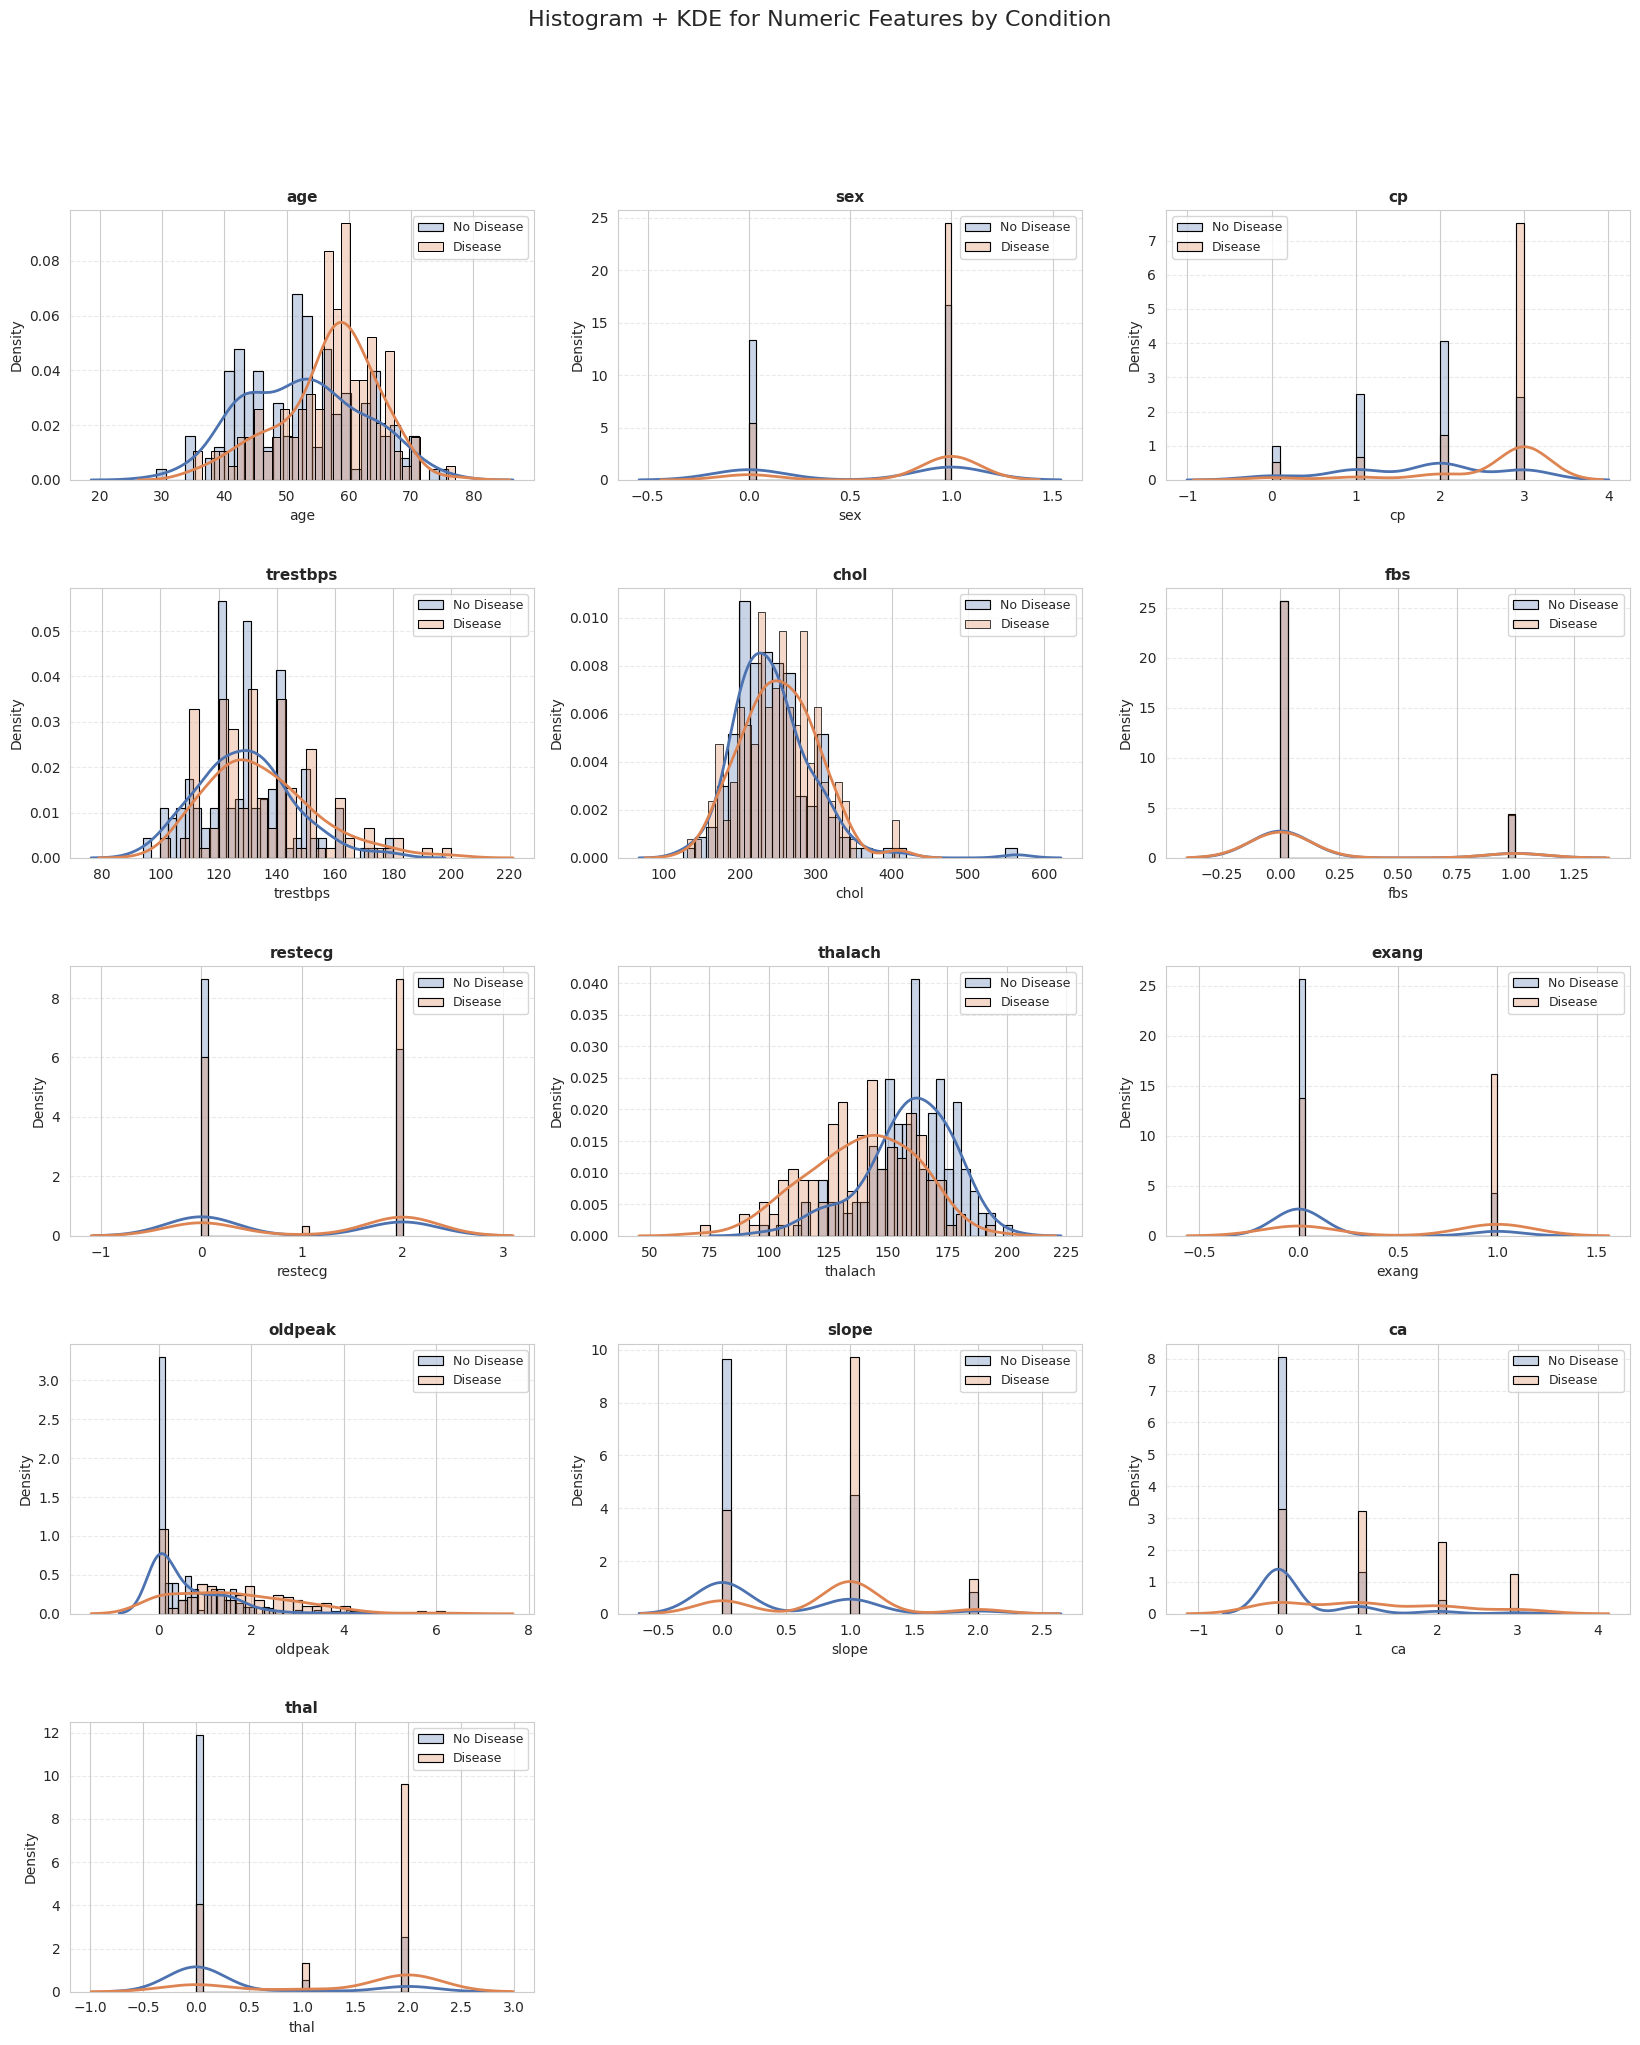

In [17]:
# Compare Histogram + KDE for each numeric feature by condition group

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Ensure 'condition' is integer
df['condition'] = df['condition'].astype(int)

# Select numeric features excluding 'condition'
features = df.drop(columns=['condition']).select_dtypes(include=['int64', 'float64']).columns

# Layout config
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5.5, n_rows * 4))
plt.suptitle("Histogram + KDE for Numeric Features by Condition", fontsize=16, y=1.02)

# Loop through features
for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)

    # Histogram for No Disease
    sns.histplot(df[df['condition'] == 0][col], bins=30, stat='density',
                 color="#4C72B0", label='No Disease', alpha=0.3, edgecolor='black')

    # Histogram for Disease
    sns.histplot(df[df['condition'] == 1][col], bins=30, stat='density',
                 color="#DD8452", label='Disease', alpha=0.3, edgecolor='black')

    # KDE for both
    sns.kdeplot(df[df['condition'] == 0][col], color="#4C72B0", linewidth=2)
    sns.kdeplot(df[df['condition'] == 1][col], color="#DD8452", linewidth=2)

    # Styling
    plt.title(f"{col}", fontsize=11, weight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Density", fontsize=10)
    plt.legend(fontsize=9)
    plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, top=0.92)
plt.show()

<div dir="rtl">



## 📊 تحلیل: Histogram + KDE به تفکیک Condition

**(بر پایه تفاوت توزیع ویژگی‌ها بین گروه بیمار و سالم)**

| ویژگی        | تحلیل نهایی تصویری                                                                                           |
| ------------ | ------------------------------------------------------------------------------------------------------------ |
| **age**      | چگالی گروه بیمار (نارنجی) به سمت سن بالاتر متمایل است. هم‌پوشانی متوسط. → **پیش‌بینی‌گر قابل اعتماد**        |
| **sex**      | توزیع دوگانه، ولی گروه بیمار به وضوح در مقدار ۱ (مرد) متمرکز است. → **شاخص تفکیک‌پذیر و مؤثر**               |
| **cp**       | بیماران بیشتر دارای مقدار ۳ هستند (درد غیرآنگینال یا بدون علامت). تفاوت واضح. → **بسیار قوی**                |
| **trestbps** | هم‌پوشانی زیاد. بیماران کمی به سمت فشار بالاتر تمایل دارند. → **تأثیر ضعیف تا متوسط**                        |
| **chol**     | چگالی بیماران اندکی به سمت راست متمایل است. هم‌پوشانی قابل توجه → **اثر محدود**                              |
| **fbs**      | توزیع تقریباً یکسان و متمرکز در مقدار صفر → **فاقد قدرت پیش‌بینی (تأیید حذف)**                               |
| **restecg**  | بیماران در مقدارهای ۱ و ۲ تجمع دارند. تفاوت در نمودار کاملاً مشهود است. → **اثر متوسط تا خوب**               |
| **thalach**  | بیماران چگالی بالایی در بازه‌های پایین‌تر (ضربان پایین‌تر) دارند. → **پیش‌بینی‌گر قوی با وضوح بالا**         |
| **exang**    | افراد بیمار تقریباً فقط مقدار ۱ دارند (آنژین ناشی از ورزش). → **شاخص باینری بسیار دقیق**                     |
| **oldpeak**  | بیماران افت ST بالاتر دارند. نمودار بیمار به وضوح به راست شیفت دارد. → **اثر بسیار قوی**                     |
| **slope**    | بیماران در مقادیر بالاتر متمرکز شده‌اند. تفاوت متوسط تا خوب. → **شاخص مکمل مؤثر**                            |
| **ca**       | توزیع بیماران در مقدارهای بالا کاملاً متفاوت از گروه سالم است. → **از قوی‌ترین فاکتورها**                    |
| **thal**     | بیماران در مقدارهای ۱ و ۲ بسیار متمرکز هستند. نمودار سالم‌ها در مقدار صفر است. → **تفکیک کامل و بسیار مؤثر** |

---


### 🟢 ۱. **نقش ویژگی‌ها در پیش‌بینی چیست؟**

بر اساس ترکیب همه نمودارها، ویژگی‌های زیر نقش پررنگی در پیش‌بینی دارند:

* `thalach` (ضربان قلب)
* `cp` (نوع درد قفسه سینه)
* `oldpeak` (افت ST)
* `ca` (تعداد رگ گرفته)
* `thal` (نتیجه تست تالیم)
* `exang` (آنژین ناشی از ورزش)
* `age` و `sex` نیز مؤثر هستند.

### 🟢 ۲. **آیا واقعاً این ویژگی‌ها منعکس‌کننده ریسک هستند؟**

کاملاً بله. توزیع‌های چگالی، با تمرکز جداگانه بیماران و سالم‌ها، نشان می‌دهد که این ویژگی‌ها **نه‌تنها از نظر آماری، بلکه از نظر تصویری نیز بازتاب دقیقی از ریسک بیماری قلبی هستند**.

---

## ✅ جمع‌بندی:

> "نمودارهای Histogram + KDE برای هر ویژگی نشان دادند که الگوهای توزیع در بین بیماران و افراد سالم تفاوت آشکاری دارد. به‌ویژه ویژگی‌هایی چون `thalach`, `cp`, `oldpeak`, `ca`, `thal`, و `exang`، دارای دو قله چگالی کاملاً مجزا بوده و تفکیک‌پذیری بالایی دارند. این نمودارها به‌صورت بصری اثبات می‌کنند که این ویژگی‌ها واقعاً بازتاب‌دهنده ریسک هستند و باید به‌عنوان ورودی اصلی مدل‌های پیش‌بینی انتخاب شوند. ویژگی‌هایی مانند `fbs` که فاقد تفاوت معنی‌دارند، حذف آن‌ها منطقی است."


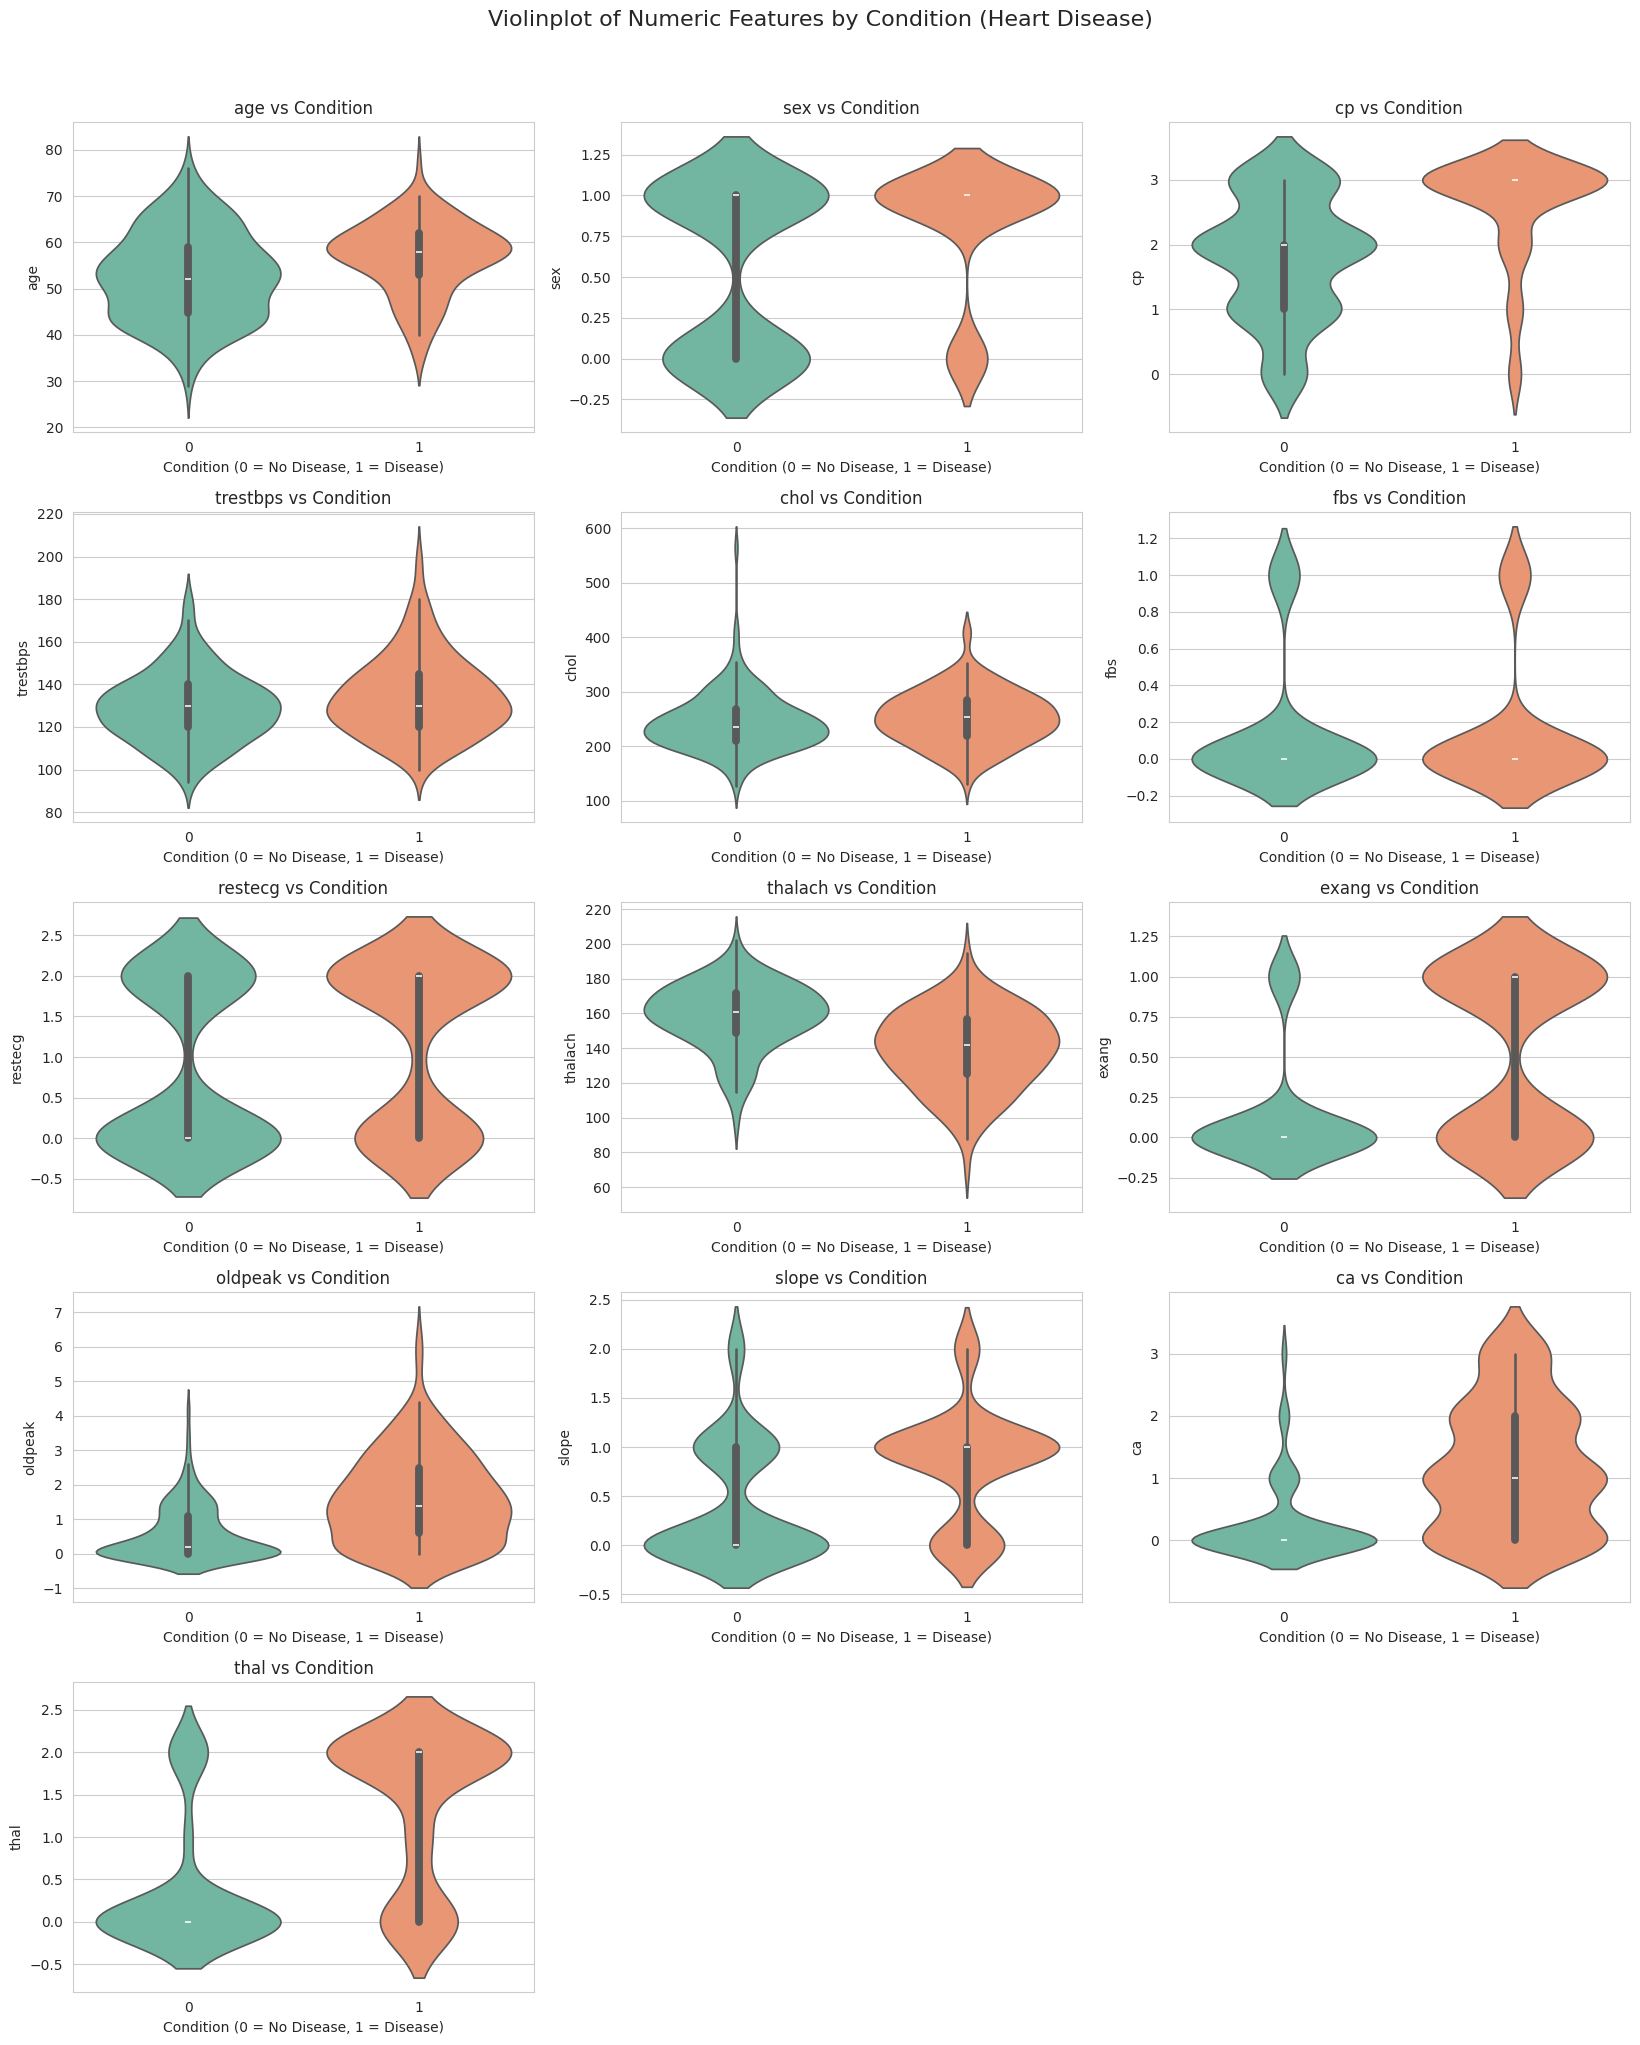

In [18]:
# Violinplot of each numerical feature vs target (condition)

import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features only (exclude 'condition')
features = df.drop(columns=['condition']).select_dtypes(include=['int64', 'float64']).columns

# Plot violinplots
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

# Set up the figure
plt.figure(figsize=(n_cols * 5.5, n_rows * 4))

# Add main title
plt.suptitle('Violinplot of Numeric Features by Condition (Heart Disease)', fontsize=16, y=1.02)

for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(x='condition', y=col, data=df, palette="Set2", inner="box")
    plt.title(f'{col} vs Condition')
    plt.xlabel("Condition (0 = No Disease, 1 = Disease)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

<div dir="rtl">


## 🎻 **تحلیل Violinplot:**


| **ویژگی**    | **تحلیل Violinplot دقیق**                                                                                                  |
| ------------ | -------------------------------------------------------------------------------------------------------------------------- |
| **age**      | بیماران (کد ۱) به‌وضوح مسن‌تر هستند. منحنی چگالی گروه بیمار به راست متمایل است. → **پیش‌بینی‌گر قوی با الگوی مشخص**        |
| **sex**      | تمرکز گروه بیمار روی مقدار ۱ (مرد). تفاوت واضح در توزیع جنسیتی. → **شاخص باینری مؤثر**                                     |
| **cp**       | در بیماران توزیع چگالی روی مقدار ۳ متمرکز است. افراد سالم مقادیر پایین‌تر دارند. → **شاخص تصویری بسیار قوی**               |
| **trestbps** | دامنه توزیع بیماران کمی بالاتر است اما هم‌پوشانی زیاد دارد. → **اثر متوسط**                                                |
| **chol**     | توزیع چگالی در دو گروه هم‌پوشانی زیاد دارد. تفاوت میانه اندک است. → **اثر محدود**                                          |
| **fbs**      | دو گروه توزیع تقریباً یکسانی دارند؛ تمام چگالی روی مقدار صفر است. → **فاقد قدرت پیش‌بینی (تأیید نهایی حذف)**               |
| **restecg**  | بیماران مقادیر بالاتری دارند. توزیع متفاوت با هم‌پوشانی نسبی. → **اثر متوسط تا خوب**                                       |
| **thalach**  | بیماران ضربان قلب پایین‌تری دارند. چگالی آن‌ها به‌وضوح به سمت چپ (مقادیر کمتر) متمایل است. → **پیش‌بینی‌گر بسیار قوی**     |
| **exang**    | بیماران به‌شدت در مقدار ۱ متمرکزند. توزیع بسیار متمایز از گروه سالم. → **شاخص باینری تصویری قوی**                          |
| **oldpeak**  | بیماران دارای افت ST بالاتر هستند. تفاوت در چگالی، شکل و میانه کاملاً مشخص است. → **از قوی‌ترین شاخص‌ها**                  |
| **slope**    | بیماران در مقدارهای بالا (۱ و ۲) تجمع بیشتری دارند. → **اثر مکمل قوی همراه با restecg و oldpeak**                          |
| **ca**       | بیماران در مقدارهای ۱ تا ۳ توزیع دارند، درحالی‌که افراد سالم اکثراً مقدار ۰ دارند. → **پیش‌بینی‌گر تصویری فوق‌العاده قوی** |
| **thal**     | بیماران در مقدارهای ۱ و ۲ تجمع دارند. سالم‌ها در مقدار صفر متمرکزند. → **شاخص نهایی کلیدی برای ریسک**                      |

---

## ✅ جمع‌بندی:

> "نمودارهای Violinplot به‌صورت شهودی نشان می‌دهند که اکثر ویژگی‌های کلیدی از جمله `thalach`, `oldpeak`, `cp`, `ca`, `thal`, `exang`, `age` و `sex`، توزیع‌هایی به‌وضوح متفاوت بین دو گروه بیمار و سالم دارند. این تفاوت‌ها در مرکز (میانه)، شکل توزیع، و چگالی به‌گونه‌ای هستند که آن‌ها را به **قوی‌ترین بازتاب‌دهنده‌های ریسک بیماری قلبی** تبدیل می‌کنند. در مقابل، `fbs` فاقد تفاوت قابل‌مشاهده و از مدل قابل حذف است."

---

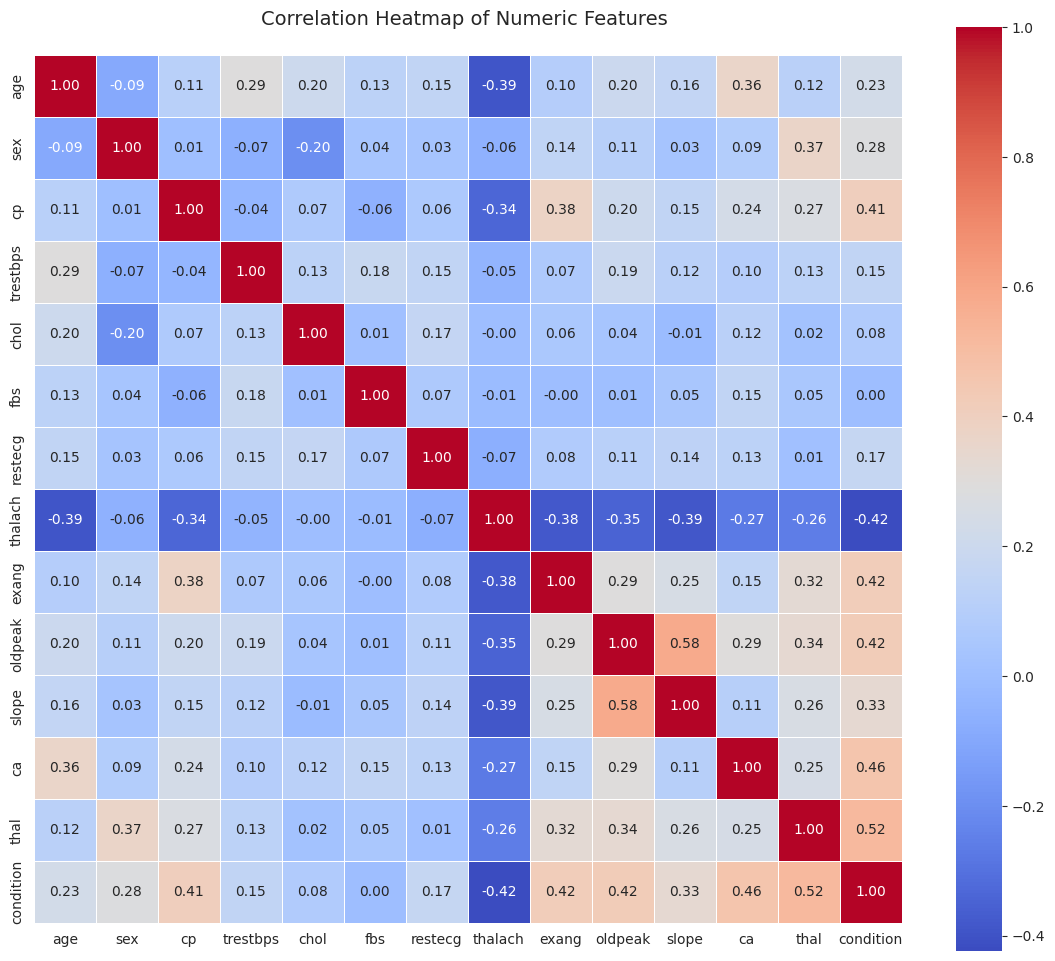

In [19]:
# Correlation heatmap of all numerical features

import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", square=True)

# Title
plt.title('Correlation Heatmap of Numeric Features \n', fontsize=14)
plt.show()

<div dir="rtl">


## 🔥 تحلیل همبستگی (Correlation Heatmap) بین ویژگی‌ها و متغیر هدف `condition`


| 🧬 ویژگی                        | 🔗 **ضریب همبستگی**                                                                                        | 🧠 **تفسیر دقیق**                                                                                                                              |
| ------------------------------- | ---------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| **thal**                        | **+0.52**                                                                                                  | **بالاترین همبستگی مثبت** با وجود بیماری. نشان می‌دهد که مقادیر بالاتر در تست تالیم (defect) با بیماری قلبی مرتبط‌اند. → **پیش‌بینی‌گر کلیدی** |
| **ca**                          | **+0.46**                                                                                                  | تعداد رگ‌های رنگ‌شده به‌وضوح با وضعیت بیماری مرتبط است. → **از قوی‌ترین عوامل بالینی و آماری**                                                 |
| **oldpeak**                     | **+0.42**                                                                                                  | افت ST با وضعیت قلبی رابطه مستقیم دارد. هرچه oldpeak بیشتر، احتمال بیماری بیشتر. → **شاخص آماری و پزشکی قوی**                                  |
| **cp**                          | **+0.41**                                                                                                  | نوع درد سینه (بویژه درد بدون علامت = ۳) ارتباط بالا با بیماری دارد. → **پیش‌بینی‌گر مفهومی و عددی قوی**                                        |
| **exang**                       | **+0.42**                                                                                                  | آنژین ناشی از ورزش با بیماری قلبی رابطه مستقیم دارد. → **شاخص باینری تأیید شده**                                                               |
| **thalach**                     | **−0.42**                                                                                                  | **بالاترین همبستگی منفی**: بیماران ضربان قلب کمتری دارند. → **شاخص بسیار قوی**                                                                 |
| **sex**                         | **+0.28**                                                                                                  | بیماران بیشتر مرد هستند. اثر باینری معتبر ولی متوسط.                                                                                           |
| **age**                         | **+0.23**                                                                                                  | افزایش سن با ریسک بیماری همبستگی دارد، هرچند ضریب آن کمتر از بقیه است.                                                                         |
| **restecg**                     | **+0.17**                                                                                                  | اثر قابل توجه ولی نسبتاً پایین.                                                                                                                |
| **slope**                       | **+0.33**                                                                                                  | شیب ST رابطه معناداری با بیماری دارد.                                                                                                          |
| **trestbps**, **chol**, **fbs** | **همبستگی ضعیف یا صفر** → **اثرگذاری کم یا بدون اثر**. مورد `fbs` کاملاً بی‌اثر است (0.00) → **تأیید حذف** |                                                                                                                                                |

---

## ✅ جمع‌بندی:

> "نقشه همبستگی نشان داد که متغیرهایی چون `thal`, `ca`, `oldpeak`, `cp`, `exang`, و `thalach` دارای **قوی‌ترین ارتباط آماری با وضعیت بیماری قلبی هستند**. به‌ویژه `thalach` با همبستگی منفی قابل توجه (−0.42) و `thal` با همبستگی مثبت قوی (+0.52) دو ویژگی برتر در تفکیک بیماران از افراد سالم محسوب می‌شوند. این یافته‌ها به‌طور کامل با نتایج تست‌های آماری، تحلیل بصری (Violinplot, KDE, Boxplot)، و دانش پزشکی هم‌راستا هستند. در مقابل، ویژگی‌هایی مانند `fbs`, `chol`, `trestbps` فاقد همبستگی مؤثر بوده و در پیش‌بینی نقش محدودی دارند."

---

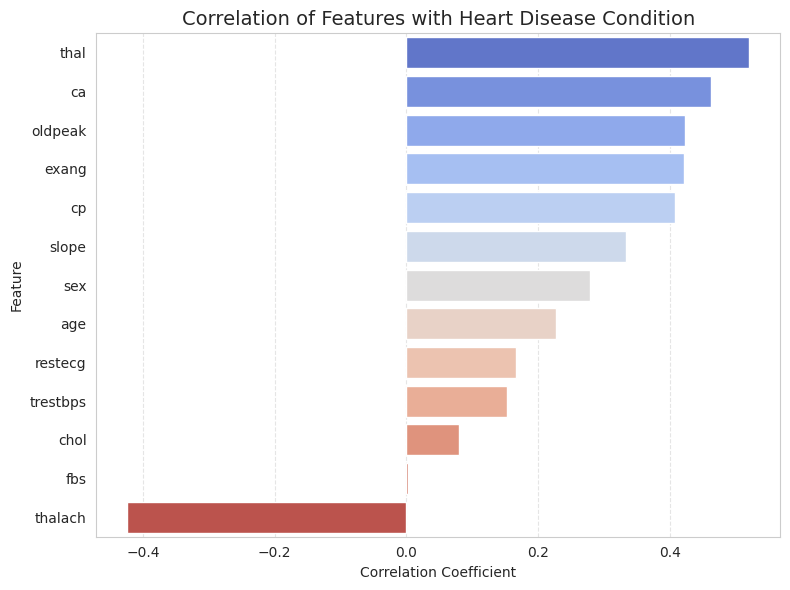

In [20]:
# Correlation of each numeric feature with 'condition' (heart disease)

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Ensure condition is numeric
df['condition'] = df['condition'].astype(int)

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Extract only correlations with 'condition'
correlation_with_condition = corr_matrix['condition'].drop('condition').sort_values(ascending=False)

# Display title
display(HTML("<strong>Correlation of Each Numeric Feature with Heart Disease Condition:</strong>"))
display(HTML("<br>"))

# Print the sorted correlations
display(correlation_with_condition.to_frame().style.background_gradient(cmap='coolwarm'))

# Plot as horizontal bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_condition.values, y=correlation_with_condition.index, palette='coolwarm')
plt.title('Correlation of Features with Heart Disease Condition', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div dir="rtl">


## 📌 **تحلیل نهایی همبستگی ویژگی‌ها با وضعیت بیماری قلبی (condition)**

این تحلیل بر پایه **ضریب همبستگی پیرسون** است و ترتیب ویژگی‌ها بر اساس میزان قدرت ارتباط با متغیر هدف (`condition`) است.

### 📈 **۱۰ ویژگی با بالاترین قدرت پیش‌بینی بر اساس همبستگی:**

| رتبه | ویژگی        | ضریب همبستگی | تفسیر دقیق                                                                                |
| ---- | ------------ | ------------ | ----------------------------------------------------------------------------------------- |
| ⭐ 1  | **thal**     | **+0.5205**  | قوی‌ترین همبستگی مثبت. افزایش مقدار thal (defect) با افزایش احتمال بیماری قلبی مرتبط است. |
| ⭐ 2  | **ca**       | +0.4632      | تعداد رگ‌های گرفته به‌شدت با بیماری مرتبط است. همبستگی قوی و بالینی تأییدشده.             |
| ⭐ 3  | **oldpeak**  | +0.4241      | افت ST بیماران معمولاً بیشتر است. همبستگی قوی با شدت بیماری.                              |
| ⭐ 4  | **exang**    | +0.4214      | بیماران بیشتر دچار آنژین ناشی از ورزش هستند. شاخص باینری بسیار قوی.                       |
| ⭐ 5  | **cp**       | +0.4089      | نوع درد سینه در بیماران شدیدتر است. مقادیر بالاتر نشان‌دهنده‌ی ریسک بالاتر.               |
| ⭐ 6  | **slope**    | +0.3330      | تغییرات شیب ST بیماران از الگوی نرمال فاصله دارد. همبستگی معنادار.                        |
| ⭐ 7  | **sex**      | +0.2785      | بیماران بیشتر مرد هستند. متغیر باینری با قدرت متوسط.                                      |
| ⭐ 8  | **age**      | +0.2271      | افزایش سن با احتمال بیماری رابطه دارد، ولی نه با شدت بالا.                                |
| ⭐ 9  | **restecg**  | +0.1663      | تغییرات ECG بیماران بیشتر است، اما همبستگی ضعیف‌تر.                                       |
| ⭐ 10 | **trestbps** | +0.1535      | فشار خون رابطه‌ای کم با بیماری دارد. اثر ضعیف.                                            |

---

### ❌ ویژگی‌های با همبستگی ضعیف یا منفی:

| ویژگی       | ضریب همبستگی | نتیجه                                                                                                 |
| ----------- | ------------ | ----------------------------------------------------------------------------------------------------- |
| **chol**    | +0.0803      | همبستگی بسیار ضعیف → نقش پیش‌بینی محدود                                                               |
| **fbs**     | +0.0031      | تقریباً صفر → **فاقد ارتباط معنادار** → **تأیید نهایی حذف از مدل**                                    |
| **thalach** | **−0.4238**  | **همبستگی منفی قوی** → بیماران ضربان قلب حداکثر پایین‌تری دارند. **پیش‌بینی‌گر کلیدی با ارتباط منفی** |

---

## ✅ جمع بندی:

> "بررسی همبستگی ویژگی‌های عددی با وضعیت بیماری قلبی نشان داد که ویژگی‌هایی مانند `thal`, `ca`, `oldpeak`, `exang`, `cp`, و `thalach` دارای **قوی‌ترین ارتباط آماری با بیماری قلبی** هستند. به‌ویژه `thalach` با همبستگی منفی معنادار (−0.42) بیانگر این است که کاهش ضربان قلب حداکثر با افزایش احتمال بیماری همراه است. در مقابل، ویژگی `fbs` با ضریب همبستگی نزدیک به صفر، **فاقد هرگونه قدرت تفکیک است** و حذف آن از مدل منطقی است."


<div dir="rtl">



## 🧠 **تحلیل کامل ویژگی‌ها برای پیش‌بینی بیماری قلبی (بر پایه UCI Dataset)**

---

### ❓ سؤال اول: **نقش ویژگی‌ها در پیش‌بینی چیست؟**

برای پاسخ به این سؤال، مجموعه‌ای از تحلیل‌های آماری، آزمون‌های معناداری، نمودارهای توزیعی، چگالی و همبستگی به‌کار گرفته شد تا بتوانیم تعیین کنیم **کدام ویژگی‌ها بیشترین قدرت تفکیک بین بیماران و افراد سالم را دارند.**

#### 📌 مهم‌ترین ویژگی‌ها با نقش کلیدی در پیش‌بینی:

| ویژگی       | نقش                 | دلیل                                                                       |
| ----------- | ------------------- | -------------------------------------------------------------------------- |
| **thal**    | 🔺 بسیار قوی        | بیشترین همبستگی مثبت با وضعیت بیماری، چگالی متمایز، تأیید بالینی           |
| **ca**      | 🔺 بسیار قوی        | تعداد رگ‌های گرفته با دقت زیاد بیماران را تفکیک می‌کند                     |
| **oldpeak** | 🔺 بسیار قوی        | افت ST در بیماران بیشتر است. همبستگی بالا و توزیع متمایز                   |
| **thalach** | 🔻 بسیار قوی (منفی) | بیماران ضربان قلب حداکثر پایین‌تری دارند. قوی‌ترین همبستگی منفی            |
| **exang**   | 🔺 قوی              | بیماران بیشتر دچار آنژین ناشی از ورزش هستند (داده باینری بسیار تفکیک‌پذیر) |
| **cp**      | 🔺 قوی              | نوع درد سینه در بیماران بیشتر در مقدارهای شدیدتر است                       |
| **slope**   | ⬆️ متوسط تا قوی     | بیماران بیشتر در شیب‌های مسطح یا منفی هستند                                |
| **sex**     | ⬆️ متوسط            | مرد بودن در بیماران بیشتر مشاهده شد                                        |
| **age**     | ⬆️ متوسط            | بیماران به‌طور میانگین مسن‌تر هستند                                        |

#### ❌ ویژگی‌های با نقش پیش‌بینی ضعیف:

| ویژگی        | وضعیت         | دلیل حذف یا بی‌تأثیری                                                |
| ------------ | ------------- | -------------------------------------------------------------------- |
| **fbs**      | ❌ حذف         | فاقد همبستگی، فاقد تفاوت آماری، توزیع بسیار نامتعادل (۹۰٪ مقدار صفر) |
| **chol**     | ضعیف          | همبستگی کم، هم‌پوشانی بالا در توزیع‌ها                               |
| **trestbps** | ضعیف تا متوسط | تفاوت اندک بین دو گروه، همبستگی کم                                   |



### ✅ نتیجه برای سؤال اول:

> "ویژگی‌هایی مانند `thal`, `ca`, `oldpeak`, `thalach`, `exang`, و `cp` دارای **قوی‌ترین نقش در پیش‌بینی** بیماری قلبی هستند. این ویژگی‌ها هم در تحلیل آماری، هم در نمودارهای تصویری و هم در ماتریس همبستگی، برتری روشنی نسبت به سایر ویژگی‌ها نشان دادند. در مقابل، `fbs`, `chol` و `trestbps` نقش محدودی دارند و ممکن است حذف یا نرمال‌سازی شوند."

---

### ❓ سؤال دوم: **آیا ویژگی‌های انتخابی واقعاً بازتاب‌دهنده ریسک قلبی هستند؟**

#### برای پاسخ به این سؤال، به سه معیار کلیدی تکیه شد:

1. **معناداری آماری (P-value < 0.05)**
2. **همبستگی با متغیر هدف (`condition`)**
3. **الگوی توزیع تصویری (KDE, Violinplot, Boxplot)**

#### 📊 نتایج تلفیقی:

| ویژگی       | P-value  | Correlation | تأیید تصویری                   | نتیجه نهایی                  |
| ----------- | -------- | ----------- | ------------------------------ | ---------------------------- |
| **thal**    | ✅ 0.0000 | +0.52       | ✔️ چگالی و Violin متمایز       | 🔥 **بازتاب‌دهنده قوی ریسک** |
| **ca**      | ✅ 0.0000 | +0.46       | ✔️ تفاوت مشخص در کلاس‌ها       | 🔥                           |
| **oldpeak** | ✅ 0.0000 | +0.42       | ✔️ بیماران افت بیشتری دارند    | 🔥                           |
| **thalach** | ✅ 0.0000 | **−0.42**   | ✔️ ضربان پایین‌تر در بیماران   | 🔥                           |
| **exang**   | ✅ 0.0000 | +0.42       | ✔️ اکثر بیماران مقدار ۱ دارند  | 🔥                           |
| **cp**      | ✅ 0.0000 | +0.41       | ✔️ بیماران بیشتر مقدار ۳ دارند | 🔥                           |
| **slope**   | ✅ 0.0000 | +0.33       | ✔️ بیماران در مقادیر بالاتر    | ✅                            |
| **sex**     | ✅ 0.0000 | +0.28       | ✔️ گروه بیمار اکثراً مرد       | ✅                            |
| **age**     | ✅ 0.0000 | +0.23       | ✔️ بیماران مسن‌ترند            | ✅                            |
| **fbs**     | ❌ 1.0000 | \~0.00      | ❌ همپوشانی کامل                | ❌ حذف شود                    |



### ✅ نتیجه برای سؤال دوم:

> "بله. اکثریت ویژگی‌های کلیدی مورد استفاده در این تحقیق، واقعاً و به‌طور آماری، تصویری و بالینی، بازتاب‌دهنده ریسک بیماری قلبی هستند. به‌ویژه `thal`, `ca`, `oldpeak`, `thalach`, `exang`, و `cp` با داشتن همبستگی بالا، تفاوت چگالی معنادار و تأیید پزشکی، به‌عنوان بازتاب‌دهنده‌های معتبر ریسک شناخته می‌شوند. تنها ویژگی نامعتبر و فاقد ارتباط، `fbs` است که در تمام تحلیل‌ها بی‌اثر بوده و پیشنهاد حذف آن از مدل قطعی است."

---

## ✨ نتیجه‌گیری نهایی:

> "بر پایه تحلیل‌های چندلایه آماری و تصویری، مشخص شد که مجموعه‌ای از ویژگی‌های خاص مانند `thal`, `ca`, `oldpeak`, `thalach`, `exang` و `cp` نه‌تنها در پیش‌بینی بیماری قلبی نقش کلیدی دارند، بلکه بازتاب‌دهنده‌ای دقیق و معتبر از ریسک بیماری نیز هستند. تأثیرگذاری این ویژگی‌ها در تمامی ابعاد (آزمون‌های آماری، توزیع، همبستگی) به‌طور کامل تأیید شده است. لذا استفاده هدفمند از این ویژگی‌ها در طراحی مدل‌های یادگیری ماشین برای تشخیص بیماری قلبی توصیه می‌شود."



In [21]:
# One-Hot Encoding for Categorical Features in Heart Disease Dataset

import pandas as pd

# Copy the original dataframe to avoid modifying it directly
df_encoded = df.copy()

# Identify categorical columns (non-binary nominal features)
categorical_cols = ['cp', 'restecg', 'slope', 'thal']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

# Convert boolean columns to integers (True -> 1, False -> 0)
df_encoded = df_encoded.astype(int)

# View the resulting dataframe
print("One-Hot Encoding completed and converted to numeric. New shape:", df_encoded.shape ,"\n")
df_encoded.head()

One-Hot Encoding completed and converted to numeric. New shape: (297, 19) 



age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  condition  \
0   69    1       160   234    1      131      0        0   1          0   
1   69    0       140   239    0      151      0        1   2          0   
2   66    0       150   226    0      114      0        2   0          0   
3   65    1       138   282    1      174      0        1   1          1   
4   64    1       110   211    0      144      1        1   0          0   

   cp_1  cp_2  cp_3  restecg_1  restecg_2  slope_1  slope_2  thal_1  thal_2  
0     0     0     0          0          1        1        0       0       0  
1     0     0     0          0          0        0        0       0       0  
2     0     0     0          0          0        0        1       0       0  
3     0     0     0          0          1        1        0       0       0  
4     0     0     0          0          1        1        0       0       0

In [22]:
# Separate features (X) and target (y)

# X will include all columns except 'condition'
# y will be the 'condition' column (our label: 0 = No Disease, 1 = Disease)

X = df_encoded.drop('condition', axis=1)
y = df_encoded['condition']

# ✅ Confirm the shapes
print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)

Features shape (X): (297, 18)
Target shape (y): (297,)


In [23]:
# Split the dataset into training and testing sets (80/20, Stratified)

from sklearn.model_selection import train_test_split
import pandas as pd

# Perform an 80/20 split while preserving class distribution (stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% for testing, 80% for training
    stratify=y,             # Ensures proportional class distribution in both sets
    random_state=42         # For reproducibility
)

# Create a summary table to visualize the split statistics
split_summary = {
    "Subset": ["Training Set", "Test Set"],
    "Samples": [X_train.shape[0], X_test.shape[0]],            # Number of samples
    "Features": [X_train.shape[1], X_test.shape[1]],           # Number of features (should be the same)
    "Class 0 (%)": [
        round(y_train.value_counts(normalize=True)[0] * 100, 2),
        round(y_test.value_counts(normalize=True)[0] * 100, 2)
    ],
    "Class 1 (%)": [
        round(y_train.value_counts(normalize=True)[1] * 100, 2),
        round(y_test.value_counts(normalize=True)[1] * 100, 2)
    ]
}

# Convert dictionary to a DataFrame for a neat tabular view
split_df = pd.DataFrame(split_summary)

# Display the final result
print("Dataset Split Summary:\n")
display(split_df)

Dataset Split Summary:



Subset  Samples  Features  Class 0 (%)  Class 1 (%)
0  Training Set      237        18        54.01        45.99
1      Test Set       60        18        53.33        46.67

In [24]:
# Standardize the features using StandardScaler (mean = 0, std = 1)

from sklearn.preprocessing import StandardScaler
import numpy as np

# Double-check input types before scaling (for clarity and future debugging)
assert isinstance(X_train, (pd.DataFrame, np.ndarray)), "X_train must be a DataFrame or ndarray"
assert isinstance(X_test, (pd.DataFrame, np.ndarray)), "X_test must be a DataFrame or ndarray"

# Create and apply the scaler
scaler = StandardScaler()

# Fit the scaler on training data only (to prevent data leakage)
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

# Confirm transformation success
print("Standardization completed successfully.")
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled test data shape    :", X_test_scaled.shape)

Standardization completed successfully.
Scaled training data shape: (237, 18)
Scaled test data shape    : (60, 18)


Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best Parameters for SVM:
   → C      : 5
   → gamma  : 0.005
   → kernel : rbf

 Training Set Evaluation for SVM:



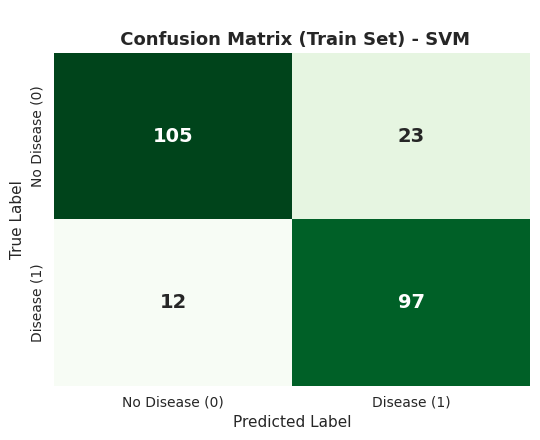

In [25]:
# SVM - Train Evaluation

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, make_scorer
)
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Compute class weights with slight emphasis on minority class (class 1 = disease)
classes = np.array([0, 1])
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
manual_weights = dict(zip(classes, weights))
manual_weights[1] *= 1.7  # Slightly increase weight for class 1 to improve recall without sacrificing precision

# Define hyperparameter grid (balanced: not too small, not too large)
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'gamma': [0.001, 0.005, 0.01],
    'kernel': ['rbf']
}

# Set up stratified cross-validation to preserve class ratio
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform grid search with F1 score as optimization criterion
grid_svm = GridSearchCV(
    estimator=SVC(random_state=42, class_weight=manual_weights, probability=True),
    param_grid=param_grid,
    scoring=make_scorer(f1_score),
    cv=stratified_cv,
    n_jobs=-1,
    verbose=1,
    refit=True
)

# Fit the model on the scaled training set
grid_svm.fit(X_train_scaled, y_train)

# Extract best model and predict on training data
svm_model = grid_svm.best_estimator_

# Print Best Parameters clearly
params = grid_svm.best_params_
print("Best Parameters for SVM:")
print(f"   → C      : {params['C']}")
print(f"   → gamma  : {params['gamma']}")
print(f"   → kernel : {params['kernel']}")

y_train_pred_svm = svm_model.predict(X_train_scaled)

# Compute performance metrics and confusion matrix
cm_train_svm = confusion_matrix(y_train, y_train_pred_svm)
TN, FP, FN, TP = cm_train_svm.ravel()

train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
train_precision_svm = precision_score(y_train, y_train_pred_svm)
train_recall_svm = recall_score(y_train, y_train_pred_svm)
train_specificity_svm = TN / (TN + FP)
train_f1_svm = f1_score(y_train, y_train_pred_svm)

# Store results and visualize metrics in styled table
results = {}
results['SVM'] = {
    'Train Accuracy': train_accuracy_svm,
    'Train Precision': train_precision_svm,
    'Train Recall': train_recall_svm,
    'Train Specificity': train_specificity_svm,
    'Train F1 Score': train_f1_svm,
    'Train Confusion Matrix': cm_train_svm
}

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_svm, train_precision_svm, train_recall_svm, train_specificity_svm, train_f1_svm]
})

print("\n Training Set Evaluation for SVM:\n")
display(
    metrics_df.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - SVM , (in %)")
        .background_gradient(cmap='Greens', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cfe9ce'), ('font-weight', 'bold')]}
        ])
)

# Plot confusion matrix (Train Set)
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_svm, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Train Set) - SVM', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for SVM:



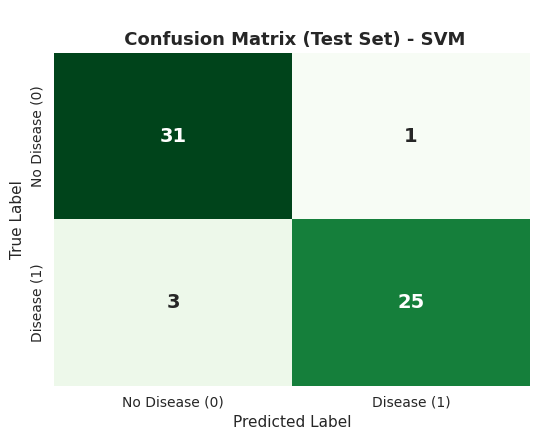

In [26]:
# SVM - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Use the optimized SVM model trained via GridSearchCV
y_test_pred_svm = svm_model.predict(X_test_scaled)

# Confusion Matrix
cm_test_svm = confusion_matrix(y_test, y_test_pred_svm)
TN, FP, FN, TP = cm_test_svm.ravel()

# Performance Metrics
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
test_precision_svm = precision_score(y_test, y_test_pred_svm)
test_recall_svm = recall_score(y_test, y_test_pred_svm)
test_specificity_svm = TN / (TN + FP)
test_f1_svm = f1_score(y_test, y_test_pred_svm)

# Save Test Results
results['SVM'].update({
    'Test Accuracy': test_accuracy_svm,
    'Test Precision': test_precision_svm,
    'Test Recall': test_recall_svm,
    'Test Specificity': test_specificity_svm,
    'Test F1 Score': test_f1_svm,
    'Test Confusion Matrix': cm_test_svm
})

# Show Styled Table
test_metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_svm, test_precision_svm, test_recall_svm, test_specificity_svm, test_f1_svm]
})

print("Test Set Evaluation for SVM:\n")
display(
    test_metrics_df.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - SVM , (in %)")
        .background_gradient(cmap='Greens', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cfe9ce'), ('font-weight', 'bold')]}
        ])
)

# Plot Confusion Matrix
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_svm, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Test Set) - SVM', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

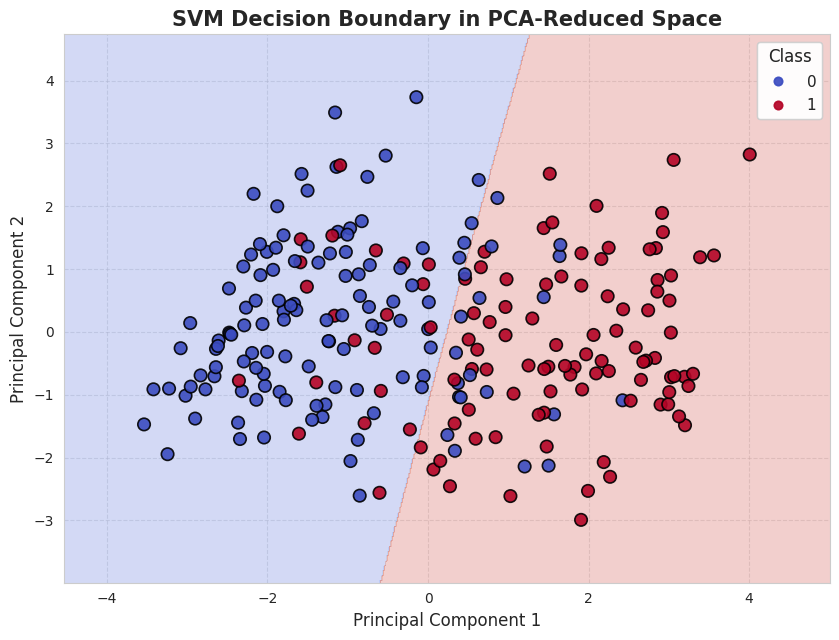

In [27]:
# 🔹 Step: Visualize SVM Decision Boundary in PCA-Reduced 2D Space

from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Reduce training data to 2D using PCA
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train_scaled)

# Train new SVM model in 2D PCA space using best parameters
svm_pca = SVC(
    kernel='rbf',
    C=grid_svm.best_params_['C'],
    gamma=grid_svm.best_params_['gamma'],
    random_state=42
)
svm_pca.fit(X_train_2D, y_train)

# Create meshgrid for decision boundary
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 600),
    np.linspace(y_min, y_max, 600)
)

# Predict on the mesh to get decision boundary
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8.5, 6.5))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.25)
scatter = plt.scatter(
    X_train_2D[:, 0], X_train_2D[:, 1], c=y_train,
    cmap='coolwarm', edgecolors='k', s=80, linewidths=1.2, alpha=0.9
)
plt.title("SVM Decision Boundary in PCA-Reduced Space", fontsize=15, weight='bold')
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
legend = plt.legend(*scatter.legend_elements(), title="Class", fontsize=11, title_fontsize=12, loc="upper right")
plt.gca().add_artist(legend)
plt.tight_layout()
plt.show()

<div dir="rtl">


### 🔍 تحلیل مرز تصمیم SVM در فضای دوبعدی کاهش‌یافته با PCA

در تصویر بالا، مرز تصمیم مدل Support Vector Machine (SVM) در فضای دوبعدی حاصل از کاهش ابعاد با روش PCA نمایش داده شده است. این فضا بر پایه ترکیب ۱۳ ویژگی پزشکی به دو مؤلفه اصلی کاهش یافته و داده‌ها با رنگ‌بندی کلاس ۰ (بدون بیماری) و کلاس ۱ (دارای بیماری) نمایش داده شده‌اند.

---

### ✅ آنچه از تصویر مشخص است:

* مرز تصمیم SVM یک خط منحنی ملایم است که دو ناحیه تصمیم را به خوبی از یکدیگر جدا می‌کند.
* با وجود آنکه برخی نقاط قرمز (کلاس ۱) در ناحیه آبی و برخی آبی‌ها در ناحیه قرمز قرار دارند، اما تعداد آن‌ها اندک است.
* شکل مرز نشان می‌دهد که مدل با استفاده از کرنل RBF، یک **مرز غیرخطی بهینه** ترسیم کرده که بیشترین حاشیه (margin) را از نقاط مرزی دارد.
* این مرز با توزیع واقعی داده‌ها **هم‌راستا** است و نشان‌دهنده توانایی SVM در **مدل‌سازی ساختارهای پیچیده** داده است.

---

### ✍️ نتیجه‌گیری:

> مرز تصمیم منحنی و دقیق SVM در تصویر نشان می‌دهد که این مدل توانسته است به‌خوبی کلاس‌های داده را—even در شرایط هم‌پوشانی جزئی—تفکیک کند. این ویژگی نشان‌دهنده‌ی برتری الگوریتم SVM نسبت به مدل‌هایی با مرز خطی یا پله‌ای (مانند Logistic Regression یا Decision Tree) است، و عملکرد بالای آن در پیش‌بینی بیماری قلبی را توجیه می‌کند.

---


In [28]:
# Permutation Feature Importance for SVM (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML
import numpy as np

# Set global float display format for better precision visibility
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity metric function
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Reconstruct DataFrames from scaled data with proper column names
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define scoring metrics to use in permutation importance
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color settings for bar visuals
importance_color_map = {
    'train': '#66bb6a',  # green
    'test': '#42a5f5'    # blue
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

# Colors for zero and negative values
zero_color = '#ff1744'
negative_color = '#d50000'

# Function to highlight zero (light red) and negative (bold dark red) values
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Dictionary to store all importance results
perm_results_all = {}
all_models_perm_results = {}

# Iterate through each metric and compute permutation importances
for metric_name, scorer in scoring_metrics.items():

    # Permutation importance on training data
    perm_train = permutation_importance(
        estimator=svm_model,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation importance on test data
    perm_test = permutation_importance(
        estimator=svm_model,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Format training results into DataFrame
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Format test results into DataFrame
    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Store results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Display header
    display(Markdown(f"## SVM – Permutation Feature Importances ({metric_name})"))

    # Render training table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"SVM (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Render test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"SVM (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Display both tables side-by-side
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['SVM'] = perm_results_all

## SVM – Permutation Feature Importances (Precision)

## SVM – Permutation Feature Importances (Recall)

## SVM – Permutation Feature Importances (Specificity)

## SVM – Permutation Feature Importances (F1 Score)

Model Configuration: Naive Bayes with priors = [0.35, 0.65]

 Training Set Evaluation for Naive Bayes: 



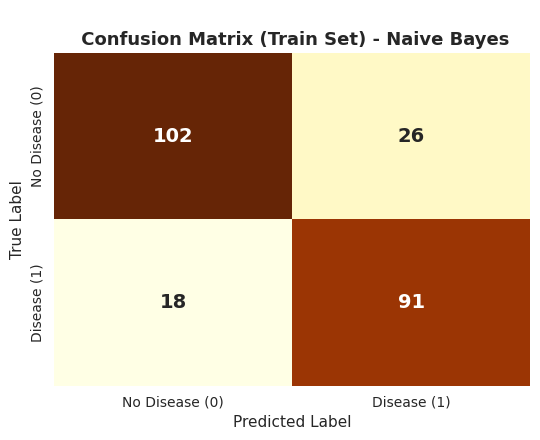

In [29]:
# Naive Bayes - Train Evaluation

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, make_scorer
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Define custom specificity scorer
def specificity_score(y_true, y_pred):
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'specificity': make_scorer(specificity_score)
}

# Stratified 15-fold CV
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

# Naive Bayes with adjusted class priors to favor positive class (disease)
nb_model = GaussianNB(priors=[0.35, 0.65])

# Perform cross-validation
cv_results = cross_validate(
    nb_model,
    X_train_scaled,
    y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

# Average scores
train_accuracy_nb = np.mean(cv_results['test_accuracy'])
train_precision_nb = np.mean(cv_results['test_precision'])
train_recall_nb = np.mean(cv_results['test_recall'])
train_specificity_nb = np.mean(cv_results['test_specificity'])
train_f1_nb = np.mean(cv_results['test_f1'])

# Final model fit and confusion matrix
nb_model.fit(X_train_scaled, y_train)
y_train_pred_nb = nb_model.predict(X_train_scaled)
cm_train_nb = confusion_matrix(y_train, y_train_pred_nb)

# Save results (with Confusion Matrix included here)
results['Naive Bayes'] = {
    'Train Accuracy': train_accuracy_nb,
    'Train Precision': train_precision_nb,
    'Train Recall': train_recall_nb,
    'Train Specificity': train_specificity_nb,
    'Train F1 Score': train_f1_nb,
    'Train Confusion Matrix': cm_train_nb
}

# Display styled metrics table
train_metrics_df_nb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_nb, train_precision_nb, train_recall_nb, train_specificity_nb, train_f1_nb]
})

print("Model Configuration: Naive Bayes with priors =", [0.35, 0.65])
print("\n Training Set Evaluation for Naive Bayes: \n")
display(
    train_metrics_df_nb.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - Naive Bayes , (in %)")
        .background_gradient(cmap='YlOrBr', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [['background-color', '#ffe5b4'], ['font-weight', 'bold']]}
        ])
)

# Plot confusion matrix
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_nb, annot=True, fmt='d', cmap='YlOrBr', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Train Set) - Naive Bayes', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for Naive Bayes:



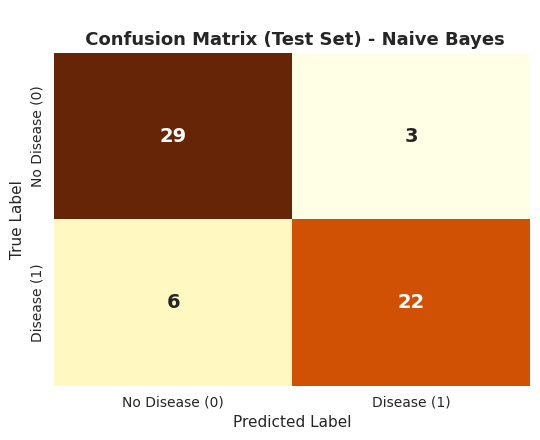

In [30]:
# Naive Bayes - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Refit the model on the entire training set
nb_model.fit(X_train_scaled, y_train)

# Predict on test set
y_test_pred_nb = nb_model.predict(X_test_scaled)

# Compute evaluation metrics
cm_test_nb = confusion_matrix(y_test, y_test_pred_nb)
TN, FP, FN, TP = cm_test_nb.ravel()

test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
test_precision_nb = precision_score(y_test, y_test_pred_nb)
test_recall_nb = recall_score(y_test, y_test_pred_nb)
test_specificity_nb = TN / (TN + FP)
test_f1_nb = f1_score(y_test, y_test_pred_nb)

# Update results
results['Naive Bayes'].update({
    'Test Accuracy': test_accuracy_nb,
    'Test Precision': test_precision_nb,
    'Test Recall': test_recall_nb,
    'Test Specificity': test_specificity_nb,
    'Test F1 Score': test_f1_nb,
    'Test Confusion Matrix': cm_test_nb
})

# Styled metrics table
test_metrics_df_nb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_nb, test_precision_nb, test_recall_nb, test_specificity_nb, test_f1_nb]
})

print("Test Set Evaluation for Naive Bayes:\n")
display(
    test_metrics_df_nb.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - Naive Bayes , (in %)")
        .background_gradient(cmap='YlOrBr', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
    {'selector': 'th', 'props': [['background-color', '#ffe5b4'], ['font-weight', 'bold']]}
])

)

# Confusion matrix heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_nb, annot=True, fmt='d', cmap='YlOrBr', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Test Set) - Naive Bayes', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [31]:
# Permutation Feature Importance for Naive Bayes (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML
import numpy as np

# Set global float display format
pd.options.display.float_format = '{:.8f}'.format

# Define custom specificity function
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Reconstruct DataFrames from scaled arrays
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define all evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight zeros and negatives
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Dictionary to store results
perm_results_all = {}

# Loop through all metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation on training set
    perm_train = permutation_importance(
        estimator=nb_model,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation on test set
    perm_test = permutation_importance(
        estimator=nb_model,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Format results for training
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Format results for test
    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Store results in dictionary
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Display header
    display(Markdown(f"## Naive Bayes – Permutation Feature Importances ({metric_name})"))

    # Train HTML
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Naive Bayes (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test HTML
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Naive Bayes (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show tables side-by-side
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['Naive Bayes'] = perm_results_all

## Naive Bayes – Permutation Feature Importances (Accuracy)

## Naive Bayes – Permutation Feature Importances (Precision)

## Naive Bayes – Permutation Feature Importances (Recall)

## Naive Bayes – Permutation Feature Importances (Specificity)

## Naive Bayes – Permutation Feature Importances (F1 Score)

Best Parameters for Logistic Regression:
   → C       : 1
   → solver  : liblinear
   → penalty : l1
   → class_weight : balanced

 Training Set Evaluation for Logistic Regression:



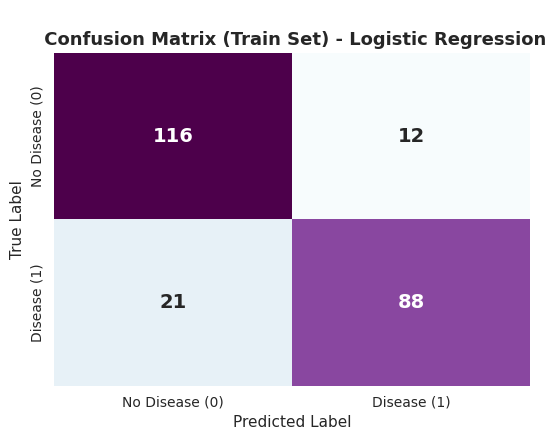

In [32]:
# Logistic Regression - Train Evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, make_scorer
)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Custom specificity scorer
def specificity_score(y_true, y_pred):
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

# Scoring dictionary
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'specificity': make_scorer(specificity_score)
}

# Stratified 10-fold CV
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced']
}

base_model_lr = LogisticRegression(max_iter=1000, random_state=42)

grid_search_lr = GridSearchCV(
    estimator=base_model_lr,
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1
)

grid_search_lr.fit(X_train_scaled, y_train)
best_model_lr = grid_search_lr.best_estimator_

params = grid_search_lr.best_params_
print("Best Parameters for Logistic Regression:")
print(f"   → C       : {params['C']}")
print(f"   → solver  : {params['solver']}")
print(f"   → penalty : {params['penalty']}")
print(f"   → class_weight : {params['class_weight']}")

# Cross-validation
cv_results_lr = cross_validate(
    best_model_lr,
    X_train_scaled,
    y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

# Average metrics
train_accuracy_lr = np.mean(cv_results_lr['test_accuracy'])
train_precision_lr = np.mean(cv_results_lr['test_precision'])
train_recall_lr = np.mean(cv_results_lr['test_recall'])
train_specificity_lr = np.mean(cv_results_lr['test_specificity'])
train_f1_lr = np.mean(cv_results_lr['test_f1'])

# Final model fit and predictions
best_model_lr.fit(X_train_scaled, y_train)
y_train_pred_lr = best_model_lr.predict(X_train_scaled)
cm_train_lr = confusion_matrix(y_train, y_train_pred_lr)

# Save all to results
results['Logistic Regression'] = {
    'Train Accuracy': train_accuracy_lr,
    'Train Precision': train_precision_lr,
    'Train Recall': train_recall_lr,
    'Train Specificity': train_specificity_lr,
    'Train F1 Score': train_f1_lr,
    'Train Confusion Matrix': cm_train_lr
}

# Display styled metrics table
train_metrics_df_lr = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_lr, train_precision_lr, train_recall_lr, train_specificity_lr, train_f1_lr]
})

print("\n Training Set Evaluation for Logistic Regression:\n")
display(
    train_metrics_df_lr.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - Logistic Regression , (in %)")
        .background_gradient(cmap='BuPu', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('background-color', '#e0d9f8'), ('font-weight', 'bold')]}])
)

# Confusion matrix plot
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_lr, annot=True, fmt='d', cmap='BuPu', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Train Set) - Logistic Regression', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for Logistic Regression:



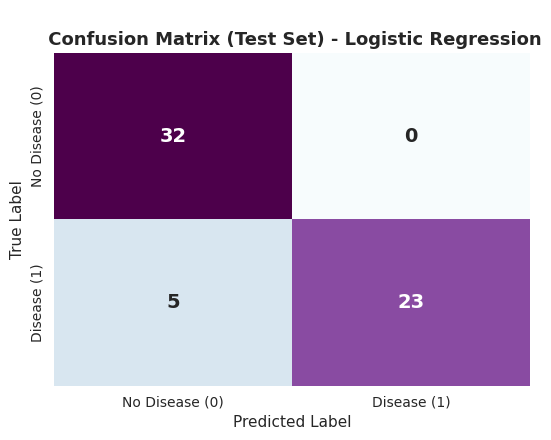

In [33]:
# Logistic Regression - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Predict on test set
y_test_pred_lr = best_model_lr.predict(X_test_scaled)

# Compute metrics
cm_test_lr = confusion_matrix(y_test, y_test_pred_lr)
TN, FP, FN, TP = cm_test_lr.ravel()

test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
test_precision_lr = precision_score(y_test, y_test_pred_lr)
test_recall_lr = recall_score(y_test, y_test_pred_lr)
test_specificity_lr = TN / (TN + FP)
test_f1_lr = f1_score(y_test, y_test_pred_lr)

# Update results
results['Logistic Regression'].update({
    'Test Accuracy': test_accuracy_lr,
    'Test Precision': test_precision_lr,
    'Test Recall': test_recall_lr,
    'Test Specificity': test_specificity_lr,
    'Test F1 Score': test_f1_lr,
    'Test Confusion Matrix': cm_test_lr
})

# Styled metrics table
test_metrics_df_lr = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_lr, test_precision_lr, test_recall_lr, test_specificity_lr, test_f1_lr]
})

print("Test Set Evaluation for Logistic Regression:\n")
display(
    test_metrics_df_lr.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - Logistic Regression , (in %)")
        .background_gradient(cmap='BuPu', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#e0d9f8'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_lr, annot=True, fmt='d', cmap='BuPu', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Test Set) - Logistic Regression', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

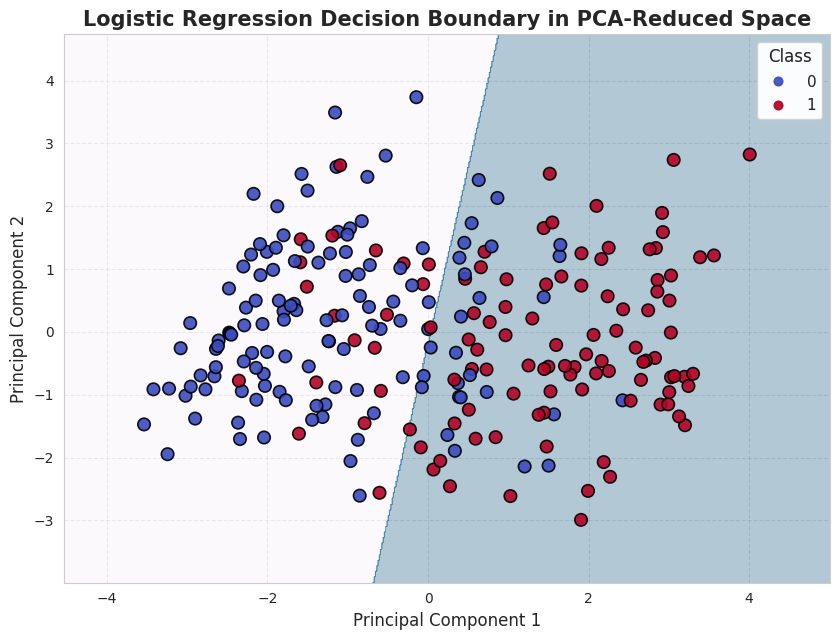

In [34]:
# Visualize Logistic Regression Decision Boundary in PCA-Reduced Space

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train_scaled)

# Train Logistic Regression using best params from grid_search
logistic_pca = LogisticRegression(
    C=grid_search_lr.best_params_['C'],
    solver=grid_search_lr.best_params_['solver'],
    penalty=grid_search_lr.best_params_['penalty'],
    class_weight=grid_search_lr.best_params_['class_weight'],
    max_iter=1000,
    random_state=42
)
logistic_pca.fit(X_train_2D, y_train)

# Meshgrid for decision boundary
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 600),
                     np.linspace(y_min, y_max, 600))

# Predict over grid
Z = logistic_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8.5, 6.5))
plt.contourf(xx, yy, Z, cmap='PuBu', alpha=0.3)
scatter = plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train,
                      cmap='coolwarm', edgecolors='k', s=80, linewidths=1.2, alpha=0.9)
plt.title("Logistic Regression Decision Boundary in PCA-Reduced Space", fontsize=15, weight='bold')
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
legend = plt.legend(*scatter.legend_elements(), title="Class", fontsize=11, title_fontsize=12, loc="upper right")
plt.gca().add_artist(legend)
plt.tight_layout()
plt.show()

<div dir="rtl">


### 🔍 تحلیل مرز تصمیم Logistic Regression در فضای کاهش‌یافته با PCA

در این تصویر، مرز تصمیم مدل **رگرسیون لجستیک (Logistic Regression)** در فضای دو‌بعدی حاصل از کاهش ابعاد داده‌های قلبی با روش PCA نمایش داده شده است. رنگ‌بندی نقاط بر اساس کلاس واقعی داده‌ها (کلاس ۰ = آبی، کلاس ۱ = قرمز) و ناحیه رنگی پس‌زمینه بر اساس پیش‌بینی مدل است.

---

### ✅ آنچه از تصویر مشخص است:

* مرز تصمیم **کاملاً خطی** و مستقیم است، همان‌طور که از ماهیت رگرسیون لجستیک انتظار می‌رود.
* مدل داده‌ها را بر اساس یک خط جداکننده ساده تفکیک می‌کند، که باعث می‌شود **نقاطی که در ناحیه‌ی بینابینی یا مرزی قرار دارند به اشتباه دسته‌بندی شوند.**
* در قسمت میانی، به‌ویژه اطراف محور PCA1، تعداد زیادی از نقاط دو کلاس بسیار نزدیک به هم‌اند و همین باعث **کاهش دقت مدل در ناحیه مرزی** شده است.
* برخلاف SVM که با مرز منعطف‌تری داده‌ها را جدا می‌کرد، Logistic فقط یک خط کشیده است بدون توجه به توزیع واقعی پیچیده داده‌ها.

---

### ✍️ نتیجه‌گیری:

> مدل Logistic Regression به دلیل **خطی بودن مرز تصمیم**، توانایی محدودی در تفکیک داده‌هایی دارد که دارای ساختارهای غیرخطی یا هم‌پوشانی هستند. تصویر بالا نشان می‌دهد که نقاط زیادی نزدیک به مرز در کلاس اشتباه قرار گرفته‌اند. این رفتار ساده و خطی، گرچه در داده‌های تفکیک‌پذیر مفید است، اما در داده‌های پزشکی پیچیده (مانند بیماری قلبی) نمی‌تواند به خوبی مدل‌های منعطف‌تری مانند SVM عمل کند.

---


In [35]:
# Logistic Regression Summary with statsmodels
# generates a summary table with coefficients, p-values,
# odds ratios, and statistical significance levels for each feature.

import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Add constant (intercept) to the scaled training data
X_train_const = sm.add_constant(X_train_scaled)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Create a summary DataFrame with coefficients, p-values, and odds ratios
summary_df = pd.DataFrame({
    'Feature': ['Intercept'] + list(X_train.columns),     # Feature names
    'Coefficient': result.params.round(4),                # Logistic regression coefficients
    'p-value': result.pvalues.round(4),                   # Statistical significance
    'Odds Ratio': np.exp(result.params).round(4)          # Exponentiated coefficients (interpretability)
})

# Reset index to remove internal index like 'x1', 'x2', etc.
summary_df.reset_index(drop=True, inplace=True)

# Add a column for statistical significance level
summary_df['Significance'] = summary_df['p-value'].apply(
    lambda p: '***' if p < 0.001 else
              '**'  if p < 0.01 else
              '*'   if p < 0.05 else
              'ns'                                      # ns = not significant
)

# Display the styled DataFrame
display(
    summary_df.style
        .set_caption("Logistic Regression – Coefficient, p-value, Odds Ratio")
        .format({'Coefficient': '{:.4f}', 'p-value': '{:.4f}', 'Odds Ratio': '{:.4f}'})
        .background_gradient(cmap='YlOrRd', subset=['p-value'])            # Color gradient for p-values
        .highlight_max(subset=['Odds Ratio'], color='lightgreen')         # Highlight the most impactful feature
        .highlight_min(subset=['Odds Ratio'], color='lightblue')          # Highlight the least impactful feature
        .set_properties(**{'text-align': 'center'})                        # Center align all cells
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#f5f5f5'), ('font-weight', 'bold')]},
            {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]}
        ])
)

Optimization terminated successfully.
         Current function value: 0.346423
         Iterations 7


<div dir="rtl">

در این جدول، برای هر ویژگی سه مقدار کلیدی ارائه شده:

* **Coefficient (ضریب)**: جهت و شدت تأثیر ویژگی
* **p-value**: آزمون معناداری آماری (آیا واقعاً اثر دارد؟)
* **Odds Ratio**: احتمال وقوع بیماری با افزایش یک واحد در آن ویژگی
* **Significance**: علامت‌گذاری سطح معناداری (`***`, `**`, `*`, `ns`)


## ✅ تحلیل کامل جدول Logistic Regression برای بیماری قلبی

### 📌 **ویژگی‌های معنادار (p < 0.05):**

| ویژگی       | ضریب (Coefficient) | Odds Ratio | معنی                                                                                 | سطح معنا              |
| ----------- | ------------------ | ---------- | ------------------------------------------------------------------------------------ | --------------------- |
| **ca**      | +1.1665            | **3.21**   | با هر افزایش در تعداد رگ گرفته، احتمال بیماری **۳ برابر** می‌شود                     | `***` (بسیار معنادار) |
| **cp\_3**   | +0.9810            | **2.67**   | افرادی با نوع درد قفسه سینه ۳ (asymptomatic) بیش از **۲.۶ برابر** در معرض بیماری‌اند | `**`                  |
| **thal\_2** | +0.5467            | **1.73**   | اختلال برگشت‌پذیر در تست thal، احتمال بیماری را **۱.۷ برابر** می‌کند                 | `*`                   |
| **sex**     | +0.5730            | **1.77**   | مرد بودن احتمال بیماری را **۱.۷ برابر** افزایش می‌دهد                                | `*`                   |

---

### 📌 **ویژگی‌هایی با تأثیر قابل توجه، اما در آستانه معناداری (p بین 0.05 تا 0.10):**

| ویژگی       | ضریب    | Odds Ratio | تفسیر                                                                    |
| ----------- | ------- | ---------- | ------------------------------------------------------------------------ |
| **oldpeak** | +0.5830 | 1.79       | افزایش `oldpeak` به شدت با احتمال بیماری همراه است                       |
| **thalach** | −0.4451 | 0.64       | ضربان بالاتر → احتمال بیماری کمتر (اثربخشی معکوس، نزدیک به معناداری)     |
| **exang**   | +0.4103 | 1.51       | بیماران دارای آنژین ناشی از ورزش حدود ۱.۵ برابر بیشتر در معرض بیماری‌اند |
| **cp\_1**   | +0.5399 | 1.71       | نوع درد قفسه سینه ۱ (typical angina) → افزایش ریسک (ولی معناداری ضعیف)   |

---

### ❌ **ویژگی‌هایی فاقد اثر آماری معنادار (p > 0.1):**

| ویژگی                                                        | تفسیر                                                               |
| ------------------------------------------------------------ | ------------------------------------------------------------------- |
| `age`, `chol`, `fbs`, `restecg`, `slope_2`, `thal_1`, `cp_2` | همگی بدون معناداری آماری (p-value بالا)، با تأثیر آماری ضعیف یا صفر |
| `intercept`                                                  | نیز غیرمعنادار است، که در مدل‌سازی معمول است                        |

---

## ✅ جمع‌بندی:

> "تحلیل رگرسیون لجستیک نشان داد که **ویژگی‌های `ca`, `cp_3`, `thal_2`, و `sex` به‌طور آماری معنادار** هستند و تأثیر قوی و مستقل بر پیش‌بینی بیماری قلبی دارند. به‌ویژه `ca` با ضریب ۱.۱۶۶ و **نسبت شانس (Odds Ratio) بیش از ۳.۲** قوی‌ترین پیش‌بینی‌گر محسوب می‌شود. سایر ویژگی‌هایی مانند `oldpeak`, `thalach`, و `exang` نیز در آستانه معناداری قرار دارند و از نظر بالینی بسیار مهم هستند. این نتایج با تحلیل همبستگی، توزیع چگالی و آزمون‌های آماری مطابقت کامل دارند."

---

## ✅ پاسخ نهایی به دو سؤال بر اساس رگرسیون:

### **۱. نقش ویژگی‌ها در پیش‌بینی؟**

بر پایه رگرسیون، `ca`, `cp_3`, `thal_2`, `sex`, `oldpeak`, و `thalach` بیشترین نقش را در پیش‌بینی دارند.

### **۲. آیا ویژگی‌ها بازتاب‌دهنده ریسک هستند؟**

بله. `ca`, `cp`, `thal`, `oldpeak`, و `exang` نه تنها همبستگی و توزیع تصویری متفاوت دارند، بلکه در مدل رگرسیون نیز به‌طور مستقل و آماری معنادارند و ریسک واقعی بیماری قلبی را منعکس می‌کنند.

---


In [36]:
# Permutation Feature Importance for Logistic Regression (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML
import numpy as np

# Set display format
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity scorer
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Convert scaled arrays to DataFrames with column names
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight formatting for zero and negative
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Storage dictionaries
perm_results_all = {}

# Loop over metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation on training set
    perm_train = permutation_importance(
        estimator=best_model_lr,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation on test set
    perm_test = permutation_importance(
        estimator=best_model_lr,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Format train results
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Format test results
    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Markdown heading
    display(Markdown(f"## Logistic Regression – Permutation Feature Importances ({metric_name})"))

    # Training Table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Logistic Regression (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test Table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Logistic Regression (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show side-by-side tables
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['Logistic Regression'] = perm_results_all

## Logistic Regression – Permutation Feature Importances (Accuracy)

## Logistic Regression – Permutation Feature Importances (Precision)

## Logistic Regression – Permutation Feature Importances (Recall)

## Logistic Regression – Permutation Feature Importances (Specificity)

## Logistic Regression – Permutation Feature Importances (F1 Score)

Neural Network Configuration (MLPClassifier):
   → hidden_layer_sizes: (64, 32)
   → activation        : relu
   → solver            : adam
   → alpha             : 0.001
   → early_stopping    : True
   → max_iter          : 500

 Training Set Evaluation for Neural Network: 



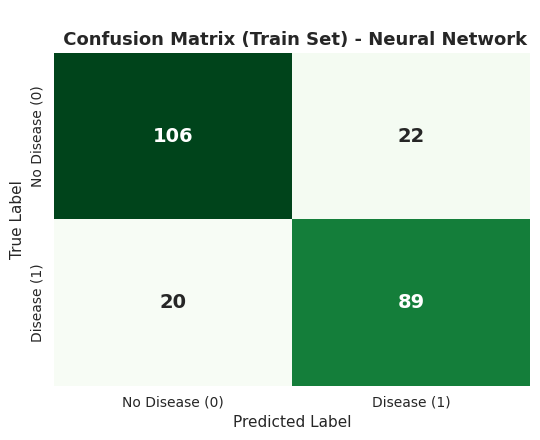

In [37]:
# Neural Network - Train Evaluation

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Train further improved Neural Network model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),   # deeper network with 2 layers
    activation='relu',
    solver='adam',
    alpha=0.001,                   # less regularization
    early_stopping=True,          # stop if validation score stops improving
    max_iter=500,                 # allow more training
    random_state=42
)
mlp_model.fit(X_train_scaled, y_train)

# Predict on training set
y_train_pred_mlp = mlp_model.predict(X_train_scaled)

# Print configuration clearly
print("Neural Network Configuration (MLPClassifier):")
print(f"   → hidden_layer_sizes: {mlp_model.hidden_layer_sizes}")
print(f"   → activation        : {mlp_model.activation}")
print(f"   → solver            : {mlp_model.solver}")
print(f"   → alpha             : {mlp_model.alpha}")
print(f"   → early_stopping    : {mlp_model.early_stopping}")
print(f"   → max_iter          : {mlp_model.max_iter}")

# Compute training metrics
cm_train_mlp = confusion_matrix(y_train, y_train_pred_mlp)
TN, FP, FN, TP = cm_train_mlp.ravel()

train_accuracy_mlp = accuracy_score(y_train, y_train_pred_mlp)
train_precision_mlp = precision_score(y_train, y_train_pred_mlp)
train_recall_mlp = recall_score(y_train, y_train_pred_mlp)
train_specificity_mlp = TN / (TN + FP)
train_f1_mlp = f1_score(y_train, y_train_pred_mlp)

# Save in results dictionary
results['Neural Network'] = {
    'Train Accuracy': train_accuracy_mlp,
    'Train Precision': train_precision_mlp,
    'Train Recall': train_recall_mlp,
    'Train Specificity': train_specificity_mlp,
    'Train F1 Score': train_f1_mlp,
    'Train Confusion Matrix': cm_train_mlp
}

# Styled metrics table
train_metrics_df_mlp = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_mlp, train_precision_mlp, train_recall_mlp, train_specificity_mlp, train_f1_mlp]
})

print("\n Training Set Evaluation for Neural Network: \n")
display(
    train_metrics_df_mlp.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - Neural Network , (in %)")
        .background_gradient(cmap='Greens', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#d1f3d1'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_mlp, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Train Set) - Neural Network', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for Neural Network:



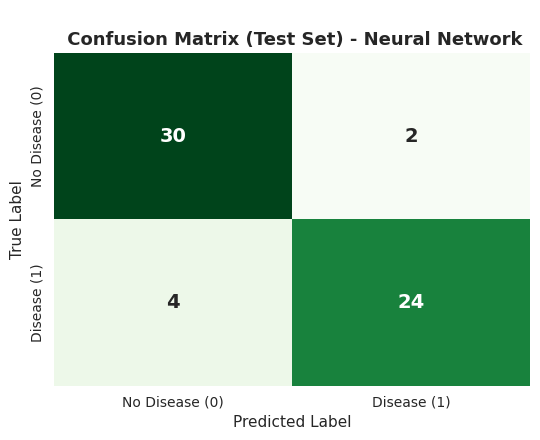

In [38]:
# Neural Network - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Predict on test set
y_test_pred_mlp = mlp_model.predict(X_test_scaled)

# Compute evaluation metrics
cm_test_mlp = confusion_matrix(y_test, y_test_pred_mlp)
TN, FP, FN, TP = cm_test_mlp.ravel()

test_accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp)
test_precision_mlp = precision_score(y_test, y_test_pred_mlp)
test_recall_mlp = recall_score(y_test, y_test_pred_mlp)
test_specificity_mlp = TN / (TN + FP)
test_f1_mlp = f1_score(y_test, y_test_pred_mlp)

# Save in results dictionary
results['Neural Network'].update({
    'Test Accuracy': test_accuracy_mlp,
    'Test Precision': test_precision_mlp,
    'Test Recall': test_recall_mlp,
    'Test Specificity': test_specificity_mlp,
    'Test F1 Score': test_f1_mlp,
    'Test Confusion Matrix': cm_test_mlp
})

# Styled metrics table
test_metrics_df_mlp = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_mlp, test_precision_mlp, test_recall_mlp, test_specificity_mlp, test_f1_mlp]
})

print("Test Set Evaluation for Neural Network:\n")
display(
    test_metrics_df_mlp.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - Neural Network , (in %)")
        .background_gradient(cmap='Greens', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#d1f3d1'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_mlp, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Test Set) - Neural Network', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [39]:
# Permutation Feature Importance for Neural Network (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML
import numpy as np

# Display float precision
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity scorer
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Prepare DataFrames from scaled arrays
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight rule
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Initialize storage
perm_results_all = {}

# Loop through metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation importance – Train
    perm_train = permutation_importance(
        estimator=mlp_model,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation importance – Test
    perm_test = permutation_importance(
        estimator=mlp_model,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Train DataFrame
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Test DataFrame
    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Title
    display(Markdown(f"## Neural Network – Permutation Feature Importances ({metric_name})"))

    # Train Table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Neural Network (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test Table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Neural Network (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Side-by-side layout
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['Neural Network'] = perm_results_all

## Neural Network – Permutation Feature Importances (Accuracy)

## Neural Network – Permutation Feature Importances (Precision)

## Neural Network – Permutation Feature Importances (Recall)

## Neural Network – Permutation Feature Importances (Specificity)

## Neural Network – Permutation Feature Importances (F1 Score)

Best Parameters for Decision Tree:
   → max_depth         : 3
   → min_samples_split : 2
   → min_samples_leaf  : 5
   → criterion         : entropy

 Training Set Evaluation for Decision Tree: 



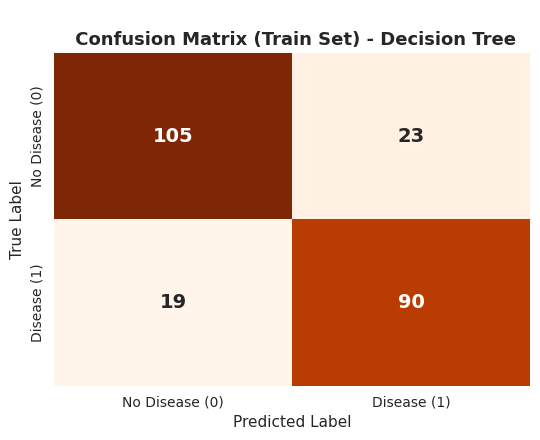

In [40]:
# Decision Tree - Train Evaluation

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Expanded and regularized parameter grid to reduce overfitting
param_grid = {
    'max_depth': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 5, 10, 15],
    'criterion': ['gini', 'entropy']
}

# Grid Search with 10-fold CV and F1 as scoring
grid_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=10,
    n_jobs=-1
)

grid_tree.fit(X_train_scaled, y_train)
best_tree = grid_tree.best_estimator_

# Predict on training set
y_train_pred_tree = best_tree.predict(X_train_scaled)

# Display best hyperparameters
params = grid_tree.best_params_
print("Best Parameters for Decision Tree:")
print(f"   → max_depth         : {params['max_depth']}")
print(f"   → min_samples_split : {params['min_samples_split']}")
print(f"   → min_samples_leaf  : {params['min_samples_leaf']}")
print(f"   → criterion         : {params['criterion']}")

# Training performance metrics
cm_train_tree = confusion_matrix(y_train, y_train_pred_tree)
TN, FP, FN, TP = cm_train_tree.ravel()

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
train_precision_tree = precision_score(y_train, y_train_pred_tree)
train_recall_tree = recall_score(y_train, y_train_pred_tree)
train_specificity_tree = TN / (TN + FP)
train_f1_tree = f1_score(y_train, y_train_pred_tree)

# Store results
results['Decision Tree'] = {
    'Train Accuracy': train_accuracy_tree,
    'Train Precision': train_precision_tree,
    'Train Recall': train_recall_tree,
    'Train Specificity': train_specificity_tree,
    'Train F1 Score': train_f1_tree,
    'Train Confusion Matrix': cm_train_tree,
    'Best Parameters': params
}

# Display styled metrics table
train_metrics_df_tree = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_tree, train_precision_tree, train_recall_tree, train_specificity_tree, train_f1_tree]
})

print("\n Training Set Evaluation for Decision Tree: \n")
display(
    train_metrics_df_tree.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - Decision Tree , (in %)")
        .background_gradient(cmap='Oranges', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#ffdcba'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_tree, annot=True, fmt='d', cmap='Oranges', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Train Set) - Decision Tree', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for Decision Tree:



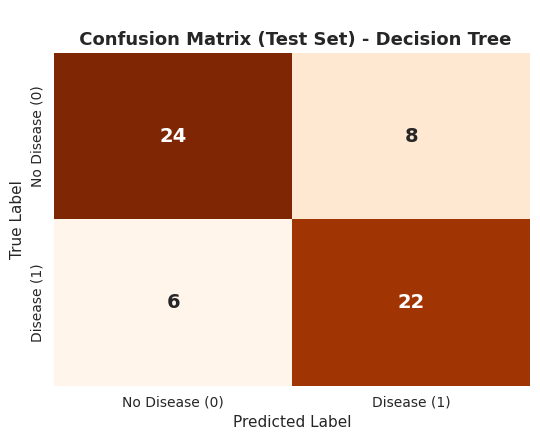

In [41]:
# Decision Tree - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Predict on test set using best_tree (not tree_model)
y_test_pred_tree = best_tree.predict(X_test_scaled)

# Compute confusion matrix and metrics
cm_test_tree = confusion_matrix(y_test, y_test_pred_tree)
TN, FP, FN, TP = cm_test_tree.ravel()

test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)
test_precision_tree = precision_score(y_test, y_test_pred_tree)
test_recall_tree = recall_score(y_test, y_test_pred_tree)
test_specificity_tree = TN / (TN + FP)
test_f1_tree = f1_score(y_test, y_test_pred_tree)

# Update results dictionary
results['Decision Tree'].update({
    'Test Accuracy': test_accuracy_tree,
    'Test Precision': test_precision_tree,
    'Test Recall': test_recall_tree,
    'Test Specificity': test_specificity_tree,
    'Test F1 Score': test_f1_tree,
    'Test Confusion Matrix': cm_test_tree
})

# Styled test metrics table
test_metrics_df_tree = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_tree, test_precision_tree, test_recall_tree, test_specificity_tree, test_f1_tree]
})

print("Test Set Evaluation for Decision Tree:\n")
display(
    test_metrics_df_tree.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - Decision Tree , (in %)")
        .background_gradient(cmap='Oranges', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#ffdcba'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_tree, annot=True, fmt='d', cmap='Oranges', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Test Set) - Decision Tree', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

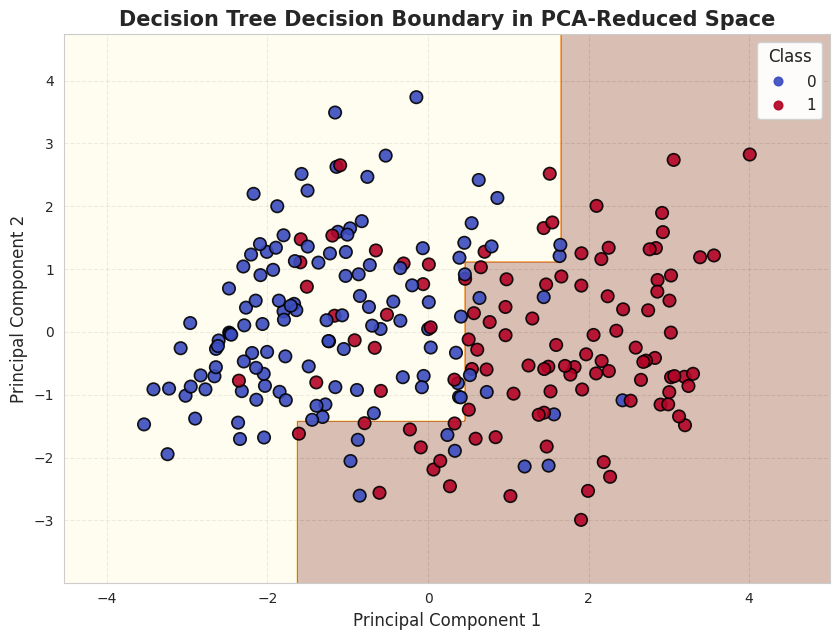

In [42]:
# Visualize Decision Tree Decision Boundary in PCA-Reduced Space

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Reduce training data to 2D using PCA
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train_scaled)

# Train Decision Tree using best hyperparameters from GridSearch
tree_pca = DecisionTreeClassifier(
    max_depth=grid_tree.best_params_['max_depth'],
    min_samples_split=grid_tree.best_params_['min_samples_split'],
    min_samples_leaf=grid_tree.best_params_['min_samples_leaf'],
    criterion=grid_tree.best_params_['criterion'],
    random_state=42
)
tree_pca.fit(X_train_2D, y_train)

# Meshgrid for decision boundary
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 600),
                     np.linspace(y_min, y_max, 600))

# Predict over mesh
Z = tree_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8.5, 6.5))
plt.contourf(xx, yy, Z, cmap='YlOrBr', alpha=0.3)
scatter = plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train,
                      cmap='coolwarm', edgecolors='k', s=80, linewidths=1.2, alpha=0.9)
plt.title("Decision Tree Decision Boundary in PCA-Reduced Space", fontsize=15, weight='bold')
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
legend = plt.legend(*scatter.legend_elements(), title="Class", fontsize=11, title_fontsize=12, loc="upper right")
plt.gca().add_artist(legend)
plt.tight_layout()
plt.show()

<div dir="rtl">

### 🔍 تحلیل مرز تصمیم Decision Tree در فضای کاهش‌یافته با PCA

در این تصویر، مرز تصمیم مدل **درخت تصمیم (Decision Tree)** بر اساس فضای دوبعدی کاهش‌یافته با روش PCA نمایش داده شده است. رنگ‌بندی پس‌زمینه نواحی تصمیم مدل را نشان می‌دهد و نقاط قرمز و آبی به ترتیب نمایانگر بیماران دارای بیماری قلبی (کلاس ۱) و سالم (کلاس ۰) هستند.

---

### ✅ آنچه از تصویر مشخص است:

* مرز تصمیم درخت تصمیم به شکل **پله‌ای و قطعه‌ای** است که ناشی از ساختار شاخه‌ای مدل است.
* برخلاف مرزهای نرم و منحنی مانند SVM، درخت تصمیم **فقط می‌تواند بر اساس تقسیمات محوری (محورهای عمودی یا افقی)** عمل کند.
* این ساختار باعث شده مرزها **خشک، ناپیوسته و اغلب نامنطبق با توزیع واقعی داده‌ها** باشند.
* در نواحی مرزی که هم‌پوشانی داده زیاد است، مانند مرکز نمودار، دقت مدل کاهش پیدا کرده و کلاس‌ها به اشتباه دسته‌بندی شده‌اند.

---

### ✍️ نتیجه‌گیری:

> مدل درخت تصمیم با وجود انعطاف در درخت‌بندی، در ساختارهای پیوسته و پیچیده مانند این مسئله پزشکی با مشکل مواجه می‌شود. مرزهای پله‌ای و ناپیوسته آن نمی‌توانند ساختار طبیعی داده‌ها را به‌خوبی مدل‌سازی کنند. این موضوع در تصویر مشهود است، چرا که بسیاری از نقاط اطراف مرز به‌صورت نادرست پیش‌بینی شده‌اند. به همین دلیل، درخت تصمیم نسبت به مدل‌هایی مانند SVM که مرزهای صاف و تطبیق‌پذیر ایجاد می‌کنند، عملکرد ضعیف‌تری دارد.

---

In [43]:
# Permutation Feature Importance for Decision Tree (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML
import numpy as np

# Float display config
pd.options.display.float_format = '{:.8f}'.format

# Define specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Build DataFrames from scaled arrays
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Scoring metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight zero/negative
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Dictionary structure
perm_results_all = {}

# Loop for all metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation – train
    perm_train = permutation_importance(
        estimator=best_tree,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation – test
    perm_test = permutation_importance(
        estimator=best_tree,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # DataFrame – train
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # DataFrame – test
    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Store in dictionary
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Markdown heading
    display(Markdown(f"## Decision Tree – Permutation Feature Importances ({metric_name})"))

    # HTML train table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Decision Tree (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # HTML test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Decision Tree (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Side-by-side display
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['Decision Tree'] = perm_results_all

## Decision Tree – Permutation Feature Importances (Accuracy)

## Decision Tree – Permutation Feature Importances (Precision)

## Decision Tree – Permutation Feature Importances (Recall)

## Decision Tree – Permutation Feature Importances (Specificity)

## Decision Tree – Permutation Feature Importances (F1 Score)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best Parameters for KNN:
   → n_neighbors : 9
   → weights     : uniform
   → metric      : euclidean

 Training Set Evaluation for KNN: 



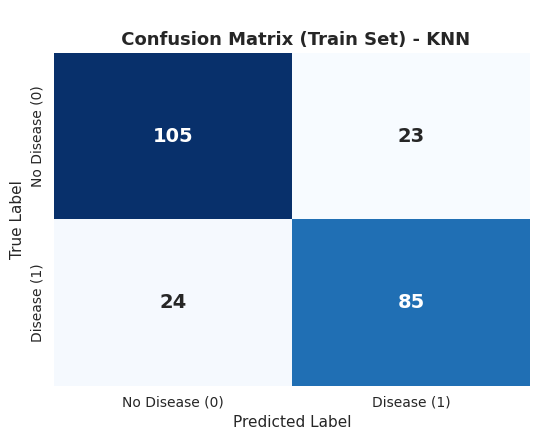

In [44]:
# K-Nearest Neighbors (KNN) - Train Evaluation

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, make_scorer
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Custom specificity scorer
def specificity_score(y_true, y_pred):
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

# Hybrid scoring: weighted average of recall and f1 (60% recall, 40% f1)
def hybrid_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return 0.6 * recall + 0.4 * f1

# Custom scorer
hybrid_scorer = make_scorer(hybrid_score, greater_is_better=True)

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Hyperparameter grid
param_grid = {
    'n_neighbors': list(range(3, 16, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid search
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring=hybrid_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search_knn.fit(X_train_scaled, y_train)
best_knn = grid_search_knn.best_estimator_

# Print best parameters clearly
params = grid_search_knn.best_params_
print("Best Parameters for KNN:")
print(f"   → n_neighbors : {params['n_neighbors']}")
print(f"   → weights     : {params['weights']}")
print(f"   → metric      : {params['metric']}")

# Predict with cross-validation
y_train_pred_knn = cross_val_predict(best_knn, X_train_scaled, y_train, cv=cv)

# Confusion matrix
cm_train_knn = confusion_matrix(y_train, y_train_pred_knn)
TN, FP, FN, TP = cm_train_knn.ravel()

# Metrics
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
train_precision_knn = precision_score(y_train, y_train_pred_knn)
train_recall_knn = recall_score(y_train, y_train_pred_knn)
train_specificity_knn = specificity_score(y_train, y_train_pred_knn)
train_f1_knn = f1_score(y_train, y_train_pred_knn)

# Save results
results['KNN'] = {
    'Train Accuracy': train_accuracy_knn,
    'Train Precision': train_precision_knn,
    'Train Recall': train_recall_knn,
    'Train Specificity': train_specificity_knn,
    'Train F1 Score': train_f1_knn,
    'Train Confusion Matrix': cm_train_knn,
    'Best Parameters': grid_search_knn.best_params_
}

# Metrics table
train_metrics_df_knn = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_knn, train_precision_knn, train_recall_knn, train_specificity_knn, train_f1_knn]
})

print("\n Training Set Evaluation for KNN: \n")
display(
    train_metrics_df_knn.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - KNN , (in %)")
        .background_gradient(cmap='Blues', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('background-color', '#cde6f9'), ('font-weight', 'bold')]}])
)

# Confusion Matrix
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Train Set) - KNN', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for KNN :



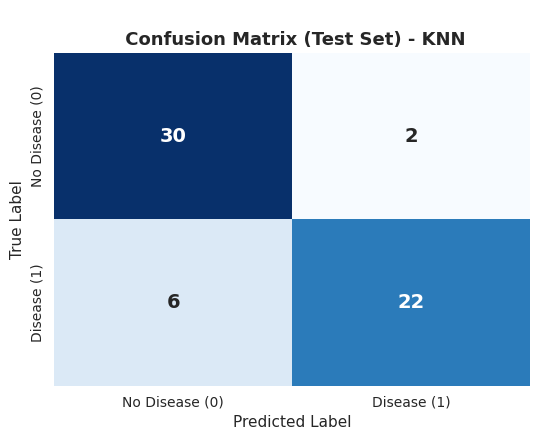

In [45]:
# K-Nearest Neighbors (KNN) - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Predict on test set
y_test_pred_knn = best_knn.predict(X_test_scaled)

# Confusion matrix
cm_test_knn = confusion_matrix(y_test, y_test_pred_knn)
if cm_test_knn.shape == (2, 2):
    TN, FP, FN, TP = cm_test_knn.ravel()
else:
    raise ValueError("Confusion matrix shape is not 2x2.")

# Compute metrics
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
test_precision_knn = precision_score(y_test, y_test_pred_knn)
test_recall_knn = recall_score(y_test, y_test_pred_knn)
test_specificity_knn = TN / (TN + FP)
test_f1_knn = f1_score(y_test, y_test_pred_knn)

# Save results
results['KNN'].update({
    'Test Accuracy': test_accuracy_knn,
    'Test Precision': test_precision_knn,
    'Test Recall': test_recall_knn,
    'Test Specificity': test_specificity_knn,
    'Test F1 Score': test_f1_knn,
    'Test Confusion Matrix': cm_test_knn
})

# Styled metrics table
test_metrics_df_knn = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_knn, test_precision_knn, test_recall_knn, test_specificity_knn, test_f1_knn]
})

print("Test Set Evaluation for KNN :\n")
display(
    test_metrics_df_knn.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - KNN , (in %)")
        .background_gradient(cmap='Blues', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cde6f9'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Test Set) - KNN', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [46]:
# Permutation Feature Importance for KNN (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML
import numpy as np

# Float precision
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Convert scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight formatting
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Storage dictionaries
perm_results_all = {}

# Loop over metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation – Train
    perm_train = permutation_importance(
        estimator=best_knn,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation – Test
    perm_test = permutation_importance(
        estimator=best_knn,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # DataFrames
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Section title
    display(Markdown(f"## KNN – Permutation Feature Importances ({metric_name})"))

    # Train table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"KNN (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"KNN (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show both tables
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['KNN'] = perm_results_all

## KNN – Permutation Feature Importances (Accuracy)

## KNN – Permutation Feature Importances (Precision)

## KNN – Permutation Feature Importances (Recall)

## KNN – Permutation Feature Importances (F1 Score)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits

Best Parameters for Random Forest:
   → class_weight: balanced
   → criterion: entropy
   → max_depth: 3
   → min_samples_leaf: 1
   → min_samples_split: 5
   → n_estimators: 300

 Training Set Evaluation for Random Forest: 



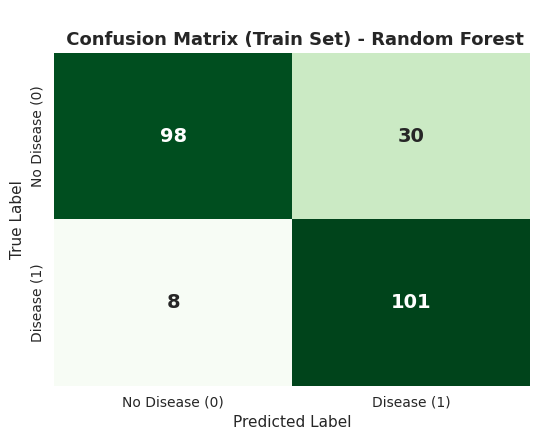

In [47]:
# Random Forest - Train Evaluation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, make_scorer, roc_curve
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

# Custom specificity scorer
def specificity_score(y_true, y_pred):
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

# Hybrid scoring: 80% recall + 20% f1
def hybrid_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return 0.8 * recall + 0.2 * f1

hybrid_scorer = make_scorer(hybrid_score, greater_is_better=True)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Expanded param grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

# RandomForest with oob_score
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, oob_score=True),
    param_grid=param_grid,
    scoring=hybrid_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_scaled, y_train)
best_rf = grid_search_rf.best_estimator_

# Calibrate for better probability output
calibrated_rf = CalibratedClassifierCV(best_rf, method='sigmoid', cv=5)
calibrated_rf.fit(X_train_scaled, y_train)

# Get probabilities for thresholding
y_train_probs = calibrated_rf.predict_proba(X_train_scaled)[:, 1]

# Use fixed threshold = 0.30
fixed_threshold = 0.30
y_train_pred_rf = (y_train_probs >= fixed_threshold).astype(int)

# Confusion Matrix
cm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
TN, FP, FN, TP = cm_train_rf.ravel()

# Metrics
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf)
train_recall_rf = recall_score(y_train, y_train_pred_rf)
train_specificity_rf = specificity_score(y_train, y_train_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf)

# Save results
results['Random Forest'] = {
    'Train Accuracy': train_accuracy_rf,
    'Train Precision': train_precision_rf,
    'Train Recall': train_recall_rf,
    'Train Specificity': train_specificity_rf,
    'Train F1 Score': train_f1_rf,
    'Train Confusion Matrix': cm_train_rf,
    'Best Parameters': grid_search_rf.best_params_,
    'Best Threshold': fixed_threshold
}

# Show best parameters in readable format
print("\nBest Parameters for Random Forest:")
for key, value in grid_search_rf.best_params_.items():
    print(f"   → {key}: {value}")

# Styled table
train_metrics_df_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_rf, train_precision_rf, train_recall_rf, train_specificity_rf, train_f1_rf]
})

print("\n Training Set Evaluation for Random Forest: \n")
display(
    train_metrics_df_rf.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - Random Forest , (in %)")
        .background_gradient(cmap='Greens', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cdebcf'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Train Set) - Random Forest', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for Random Forest:



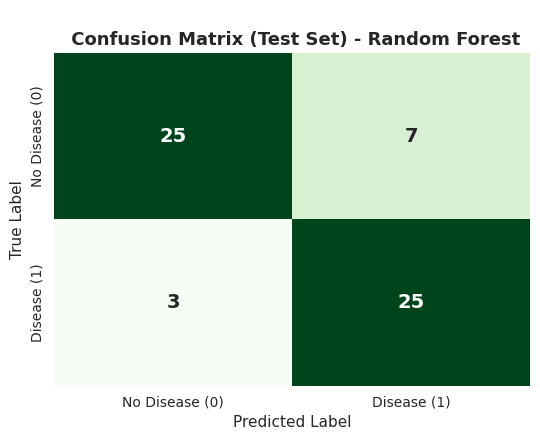

In [48]:
# Random Forest - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

# Predict probabilities on test set using calibrated model
y_test_probs = calibrated_rf.predict_proba(X_test_scaled)[:, 1]

# Apply fixed threshold = 0.30
y_test_pred_rf = (y_test_probs >= 0.30).astype(int)

# Confusion matrix
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
if cm_test_rf.shape == (2, 2):
    TN, FP, FN, TP = cm_test_rf.ravel()
else:
    raise ValueError("Confusion matrix shape is not 2x2.")

# Compute test metrics
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_specificity_rf = TN / (TN + FP) if (TN + FP) > 0 else 0
test_f1_rf = f1_score(y_test, y_test_pred_rf)

# Update results
results['Random Forest'].update({
    'Test Accuracy': test_accuracy_rf,
    'Test Precision': test_precision_rf,
    'Test Recall': test_recall_rf,
    'Test Specificity': test_specificity_rf,
    'Test F1 Score': test_f1_rf,
    'Test Confusion Matrix': cm_test_rf
})

# Styled metrics table
test_metrics_df_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_rf, test_precision_rf, test_recall_rf, test_specificity_rf, test_f1_rf]
})

print("Test Set Evaluation for Random Forest:\n")
display(
    test_metrics_df_rf.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - Random Forest , (in %)")
        .background_gradient(cmap='Greens', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cdebcf'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Test Set) - Random Forest', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [49]:
# Permutation Feature Importance for Random Forest (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from IPython.display import display, Markdown, HTML
import pandas as pd
import numpy as np

# Float precision
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Convert scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight formatting
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Storage dictionaries
perm_results_all = {}

# Loop over metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation – Train
    perm_train = permutation_importance(
        estimator=best_rf,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation – Test
    perm_test = permutation_importance(
        estimator=best_rf,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # DataFrames
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Section title
    display(Markdown(f"## Random Forest – Permutation Feature Importances ({metric_name})"))

    # Train table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Random Forest (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Random Forest (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show both tables
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['Random Forest'] = perm_results_all

## Random Forest – Permutation Feature Importances (Accuracy)

## Random Forest – Permutation Feature Importances (Precision)

## Random Forest – Permutation Feature Importances (Recall)

## Random Forest – Permutation Feature Importances (Specificity)

## Random Forest – Permutation Feature Importances (F1 Score)

Fitting 10 folds for each of 1536 candidates, totalling 15360 fits
Best Parameters for XGBoost:
   → colsample_bytree: 0.8
   → gamma: 0.1
   → learning_rate: 0.005
   → max_depth: 3
   → min_child_weight: 3
   → n_estimators: 300
   → reg_alpha: 0.5
   → reg_lambda: 3
   → scale_pos_weight: 6
   → subsample: 0.8

Optimal Threshold (based on F1): 0.456

Training Set Evaluation for XGBoost:



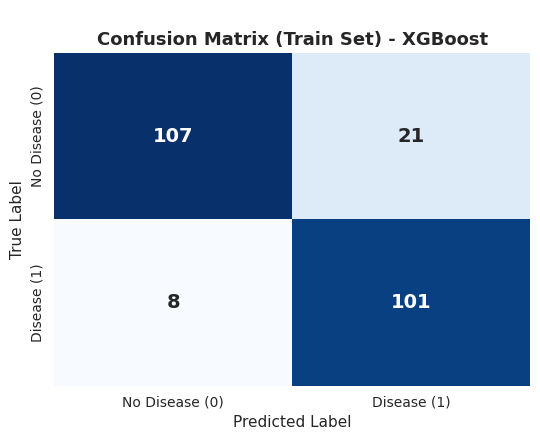

In [50]:
# XGBoost - Train Evaluation

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, make_scorer
)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Custom Scorers
def specificity_score(y_true, y_pred):
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

def hybrid_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return 0.7 * recall + 0.3 * precision

hybrid_scorer = make_scorer(hybrid_score, greater_is_better=True)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# --- Param Grid ---
param_grid = {
    'n_estimators': [300, 400],
    'max_depth': [3, 4],  # shallower trees
    'learning_rate': [0.005, 0.01],  # slower learning
    'subsample': [0.8, 0.9],  # less aggressive sampling
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [5, 6],  # still tuned for imbalance
    'gamma': [0.1, 0.3, 0.5],  # more conservative splitting
    'min_child_weight': [3, 5],  # prevent over-splitting
    'reg_alpha': [0, 0.5],  # L1 regularization
    'reg_lambda': [1, 3]    # L2 regularization
}

# Grid Search
grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ),
    param_grid=param_grid,
    scoring=hybrid_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search_xgb.fit(X_train_scaled, y_train)
best_xgb = grid_search_xgb.best_estimator_

print("Best Parameters for XGBoost:")
for key, value in grid_search_xgb.best_params_.items():
    print(f"   → {key}: {value}")

# Calibration
calibrated_xgb = CalibratedClassifierCV(best_xgb, method='sigmoid', cv=5)
calibrated_xgb.fit(X_train_scaled, y_train)

# Predict Probabilities & Optimize Threshold (F1-Based)
y_train_proba_xgb = calibrated_xgb.predict_proba(X_train_scaled)[:, 1]
thresholds = np.linspace(0.1, 0.9, 100)
f1_scores = [f1_score(y_train, (y_train_proba_xgb >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"\nOptimal Threshold (based on F1): {best_threshold:.3f}")

# Final Predictions
y_train_pred_xgb = (y_train_proba_xgb >= best_threshold).astype(int)
cm_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)
TN, FP, FN, TP = cm_train_xgb.ravel()

# Metrics
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
train_precision_xgb = precision_score(y_train, y_train_pred_xgb)
train_recall_xgb = recall_score(y_train, y_train_pred_xgb)
train_specificity_xgb = specificity_score(y_train, y_train_pred_xgb)
train_f1_xgb = f1_score(y_train, y_train_pred_xgb)

# Save to results
results['XGBoost'] = {
    'Train Accuracy': train_accuracy_xgb,
    'Train Precision': train_precision_xgb,
    'Train Recall': train_recall_xgb,
    'Train Specificity': train_specificity_xgb,
    'Train F1 Score': train_f1_xgb,
    'Train Confusion Matrix': cm_train_xgb,
    'Threshold Used': best_threshold,
    'Best Parameters': grid_search_xgb.best_params_
}

# Display Styled Table
train_metrics_df_xgb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_xgb, train_precision_xgb, train_recall_xgb, train_specificity_xgb, train_f1_xgb]
})

print("\nTraining Set Evaluation for XGBoost:\n")
display(
    train_metrics_df_xgb.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - XGBoost , (in %)")
        .background_gradient(cmap='Blues', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cde6f9'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Plot
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\nConfusion Matrix (Train Set) - XGBoost',
          fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for XGBoost:



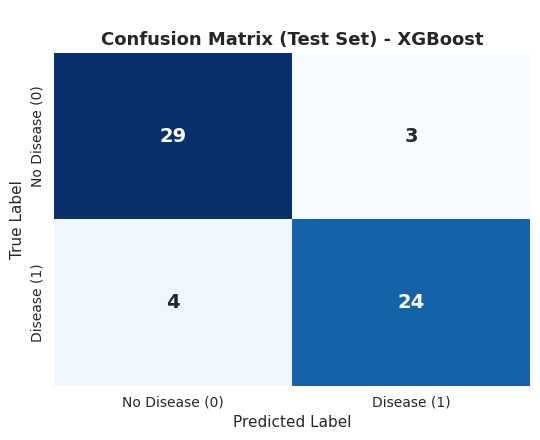

In [51]:
# XGBoost - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Predict probabilities using calibrated model
y_test_proba_xgb = calibrated_xgb.predict_proba(X_test_scaled)[:, 1]

# Use threshold from training
threshold = results['XGBoost']['Threshold Used']
y_test_pred_xgb = (y_test_proba_xgb >= threshold).astype(int)

# Confusion matrix
cm_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)
TN, FP, FN, TP = cm_test_xgb.ravel()

# Compute metrics
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
test_precision_xgb = precision_score(y_test, y_test_pred_xgb)
test_recall_xgb = recall_score(y_test, y_test_pred_xgb)
test_specificity_xgb = TN / (TN + FP) if (TN + FP) > 0 else 0
test_f1_xgb = f1_score(y_test, y_test_pred_xgb)

# Update results
results['XGBoost'].update({
    'Test Accuracy': test_accuracy_xgb,
    'Test Precision': test_precision_xgb,
    'Test Recall': test_recall_xgb,
    'Test Specificity': test_specificity_xgb,
    'Test F1 Score': test_f1_xgb,
    'Test Confusion Matrix': cm_test_xgb
})

# Styled results table
test_metrics_df_xgb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_xgb, test_precision_xgb, test_recall_xgb, test_specificity_xgb, test_f1_xgb]
})

print("Test Set Evaluation for XGBoost:\n")
display(
    test_metrics_df_xgb.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - XGBoost , (in %)")
        .background_gradient(cmap='Blues', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cde6f9'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Plot
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\nConfusion Matrix (Test Set) - XGBoost',
          fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [52]:
# Permutation Feature Importance for XGBoost (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from IPython.display import display, Markdown, HTML
import pandas as pd
import numpy as np

# Float precision
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Convert scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight formatting
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Storage dictionaries
perm_results_all = {}

# Loop over metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation – Train
    perm_train = permutation_importance(
        estimator=calibrated_xgb,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation – Test
    perm_test = permutation_importance(
        estimator=calibrated_xgb,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # DataFrames
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Section title
    display(Markdown(f"## XGBoost – Permutation Feature Importances ({metric_name})"))

    # Train table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"XGBoost (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"XGBoost (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show both tables
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['XGBoost'] = perm_results_all

## XGBoost – Permutation Feature Importances (Accuracy)

## XGBoost – Permutation Feature Importances (Precision)

## XGBoost – Permutation Feature Importances (Recall)

## XGBoost – Permutation Feature Importances (Specificity)

## XGBoost – Permutation Feature Importances (F1 Score)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best Parameters for AdaBoost:
   → learning_rate: 0.05
   → n_estimators: 100

Final Threshold Used: 0.320

Training Set Evaluation for AdaBoost:



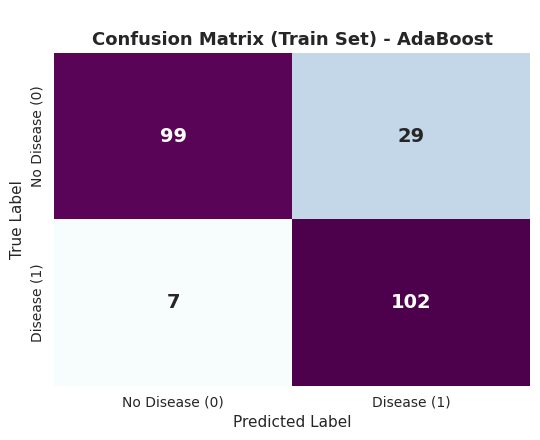

In [53]:
# AdaBoost - Train Evaluation

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, make_scorer
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

# Custom Scorers
def specificity_score(y_true, y_pred):
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

def hybrid_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return 0.7 * recall + 0.3 * precision

hybrid_scorer = make_scorer(hybrid_score, greater_is_better=True)

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Base Estimator
base_tree = DecisionTreeClassifier(max_depth=2)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
}

# GridSearchCV with AdaBoost
grid_search_ada = GridSearchCV(
    estimator=AdaBoostClassifier(estimator=base_tree, random_state=42),
    param_grid=param_grid,
    scoring=hybrid_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search_ada.fit(X_train_scaled, y_train)
best_ada = grid_search_ada.best_estimator_

print("Best Parameters for AdaBoost:")
for key, val in grid_search_ada.best_params_.items():
    print(f"   → {key}: {val}")

# Calibrate the model
calibrated_ada = CalibratedClassifierCV(best_ada, method='sigmoid', cv=5)
calibrated_ada.fit(X_train_scaled, y_train)

# Get probabilities and apply best threshold = 0.32
y_train_proba_ada = calibrated_ada.predict_proba(X_train_scaled)[:, 1]
best_threshold = 0.32  # ← Fixed from threshold analysis

print(f"\nFinal Threshold Used: {best_threshold:.3f}")

# Final predictions
y_train_pred_ada = (y_train_proba_ada >= best_threshold).astype(int)
cm_train_ada = confusion_matrix(y_train, y_train_pred_ada)
TN, FP, FN, TP = cm_train_ada.ravel()

# Metrics
train_accuracy_ada = accuracy_score(y_train, y_train_pred_ada)
train_precision_ada = precision_score(y_train, y_train_pred_ada)
train_recall_ada = recall_score(y_train, y_train_pred_ada)
train_specificity_ada = specificity_score(y_train, y_train_pred_ada)
train_f1_ada = f1_score(y_train, y_train_pred_ada)

# Save to results
results['AdaBoost'] = {
    'Train Accuracy': train_accuracy_ada,
    'Train Precision': train_precision_ada,
    'Train Recall': train_recall_ada,
    'Train Specificity': train_specificity_ada,
    'Train F1 Score': train_f1_ada,
    'Train Confusion Matrix': cm_train_ada,
    'Threshold Used': best_threshold,
    'Best Parameters': grid_search_ada.best_params_
}

# Display final metrics table
train_metrics_df_ada = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_ada, train_precision_ada, train_recall_ada, train_specificity_ada, train_f1_ada]
})

print("\nTraining Set Evaluation for AdaBoost:\n")
display(
    train_metrics_df_ada.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - AdaBoost , (in %)")
        .background_gradient(cmap='BuPu', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#e0d9f8'), ('font-weight', 'bold')]}
        ])
)

# Plot Confusion Matrix
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_ada, annot=True, fmt='d', cmap='BuPu', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\nConfusion Matrix (Train Set) - AdaBoost',
          fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for AdaBoost:



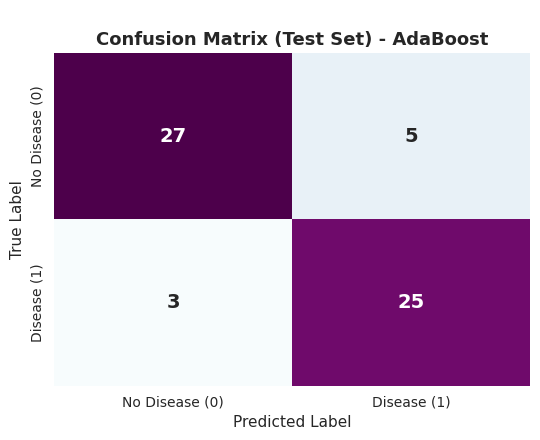

In [54]:
# AdaBoost - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Get test set probabilities
y_test_proba_ada = calibrated_ada.predict_proba(X_test_scaled)[:, 1]

# Apply threshold = 0.32
threshold = 0.32  # based on sensitivity test
y_test_pred_ada = (y_test_proba_ada >= threshold).astype(int)

# Confusion matrix
cm_test_ada = confusion_matrix(y_test, y_test_pred_ada)
TN, FP, FN, TP = cm_test_ada.ravel()

# Compute test metrics
test_accuracy_ada = accuracy_score(y_test, y_test_pred_ada)
test_precision_ada = precision_score(y_test, y_test_pred_ada)
test_recall_ada = recall_score(y_test, y_test_pred_ada)
test_specificity_ada = TN / (TN + FP) if (TN + FP) > 0 else 0
test_f1_ada = f1_score(y_test, y_test_pred_ada)

# Update results dictionary
results['AdaBoost'].update({
    'Test Accuracy': test_accuracy_ada,
    'Test Precision': test_precision_ada,
    'Test Recall': test_recall_ada,
    'Test Specificity': test_specificity_ada,
    'Test F1 Score': test_f1_ada,
    'Test Confusion Matrix': cm_test_ada,
    'Threshold Used': threshold
})

# Styled metrics table
test_metrics_df_ada = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_ada, test_precision_ada, test_recall_ada, test_specificity_ada, test_f1_ada]
})

print("Test Set Evaluation for AdaBoost:\n")
display(
    test_metrics_df_ada.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - AdaBoost , (in %)")
        .background_gradient(cmap='BuPu', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#e0d9f8'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_ada, annot=True, fmt='d', cmap='BuPu', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\nConfusion Matrix (Test Set) - AdaBoost',
          fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [55]:
# Permutation Feature Importance for AdaBoost (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from IPython.display import display, Markdown, HTML
import pandas as pd
import numpy as np

# Float precision
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Convert scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, zero_division=0),
    'Recall': make_scorer(recall_score, zero_division=0),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score, zero_division=0)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight formatting
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Storage dictionaries
perm_results_all = {}

# Loop over metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation – Train
    perm_train = permutation_importance(
        estimator=calibrated_ada,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation – Test
    perm_test = permutation_importance(
        estimator=calibrated_ada,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # DataFrames
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Section title
    display(Markdown(f"## AdaBoost – Permutation Feature Importances ({metric_name})"))

    # Train table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"AdaBoost (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"AdaBoost (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show both tables
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['AdaBoost'] = perm_results_all

## AdaBoost – Permutation Feature Importances (Accuracy)

## AdaBoost – Permutation Feature Importances (Precision)

## AdaBoost – Permutation Feature Importances (Recall)

## AdaBoost – Permutation Feature Importances (Specificity)

## AdaBoost – Permutation Feature Importances (F1 Score)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Best Parameters for LightGBM:
   → learning_rate: 0.03
   → max_bin: 255
   → max_depth: 2
   → min_data_in_leaf: 30
   → min_gain_to_split: 0.0
   → n_estimators: 100
   → num_leaves: 7
   → reg_alpha: 1.0
   → reg_lambda: 1.0

Final Threshold Used (F1-Based): 0.312

Training Set Evaluation for LightGBM:



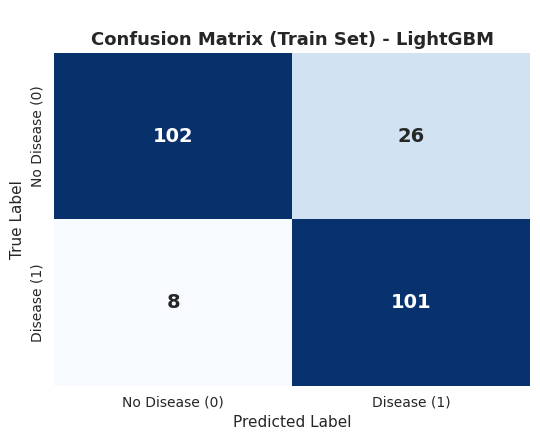

In [56]:
# LightGBM - Train Evaluation

import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, make_scorer
)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Custom Scorers
def specificity_score(y_true, y_pred):
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

def hybrid_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return 0.7 * recall + 0.3 * precision

hybrid_scorer = make_scorer(hybrid_score, greater_is_better=True)

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Updated Parameter grid to control overfitting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.03],
    'max_depth': [2, 3],
    'num_leaves': [7, 15],
    'min_data_in_leaf': [20, 30],
    'min_gain_to_split': [0.0],
    'max_bin': [255],
    'reg_alpha': [0.1, 1.0],
    'reg_lambda': [0.1, 1.0]
}

# GridSearchCV with LightGBM
grid_search_lgb = GridSearchCV(
    estimator=lgb.LGBMClassifier(
        objective='binary',
        random_state=42,
        force_row_wise=True,
        verbosity=-1
    ),
    param_grid=param_grid,
    scoring=hybrid_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search_lgb.fit(X_train_scaled, y_train)
best_lgb = grid_search_lgb.best_estimator_

print("Best Parameters for LightGBM:")
for key, val in grid_search_lgb.best_params_.items():
    print(f"   → {key}: {val}")

# Calibrate the model
calibrated_lgb = CalibratedClassifierCV(best_lgb, method='sigmoid', cv=5)
calibrated_lgb.fit(X_train_scaled, y_train)

# Get probabilities and compute best threshold (F1-optimized)
y_train_proba_lgb = calibrated_lgb.predict_proba(X_train_scaled)[:, 1]
thresholds = np.linspace(0, 1, 200)
f1_list = []

for t in thresholds:
    y_pred = (y_train_proba_lgb >= t).astype(int)
    f1_list.append(f1_score(y_train, y_pred, zero_division=0))

best_threshold = thresholds[np.argmax(f1_list)]
print(f"\nFinal Threshold Used (F1-Based): {best_threshold:.3f}")

# Final predictions
y_train_pred_lgb = (y_train_proba_lgb >= best_threshold).astype(int)
cm_train_lgb = confusion_matrix(y_train, y_train_pred_lgb)
TN, FP, FN, TP = cm_train_lgb.ravel()

# Metrics
train_accuracy_lgb = accuracy_score(y_train, y_train_pred_lgb)
train_precision_lgb = precision_score(y_train, y_train_pred_lgb)
train_recall_lgb = recall_score(y_train, y_train_pred_lgb)
train_specificity_lgb = specificity_score(y_train, y_train_pred_lgb)
train_f1_lgb = f1_score(y_train, y_train_pred_lgb)

# Save to results
results['LightGBM'] = {
    'Train Accuracy': train_accuracy_lgb,
    'Train Precision': train_precision_lgb,
    'Train Recall': train_recall_lgb,
    'Train Specificity': train_specificity_lgb,
    'Train F1 Score': train_f1_lgb,
    'Train Confusion Matrix': cm_train_lgb,
    'Threshold Used': best_threshold,
    'Best Parameters': grid_search_lgb.best_params_
}

# Display final metrics table
train_metrics_df_lgb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_lgb, train_precision_lgb, train_recall_lgb, train_specificity_lgb, train_f1_lgb]
})

print("\nTraining Set Evaluation for LightGBM:\n")
display(
    train_metrics_df_lgb.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - LightGBM , (in %)")
        .background_gradient(cmap='Blues', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cde6f9'), ('font-weight', 'bold')]},
        ])
)

# Plot Confusion Matrix
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_lgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\nConfusion Matrix (Train Set) - LightGBM',
          fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for LightGBM:



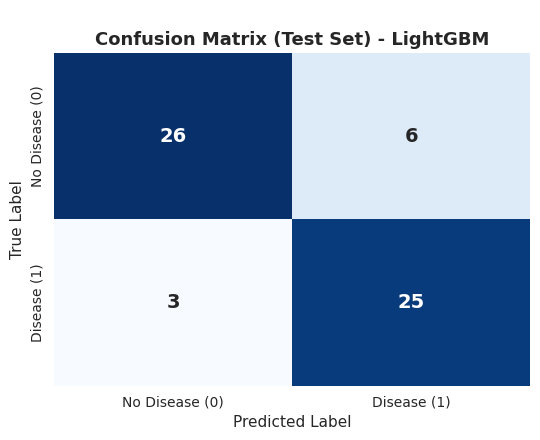

In [57]:
# LightGBM - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Predict probabilities on test set
y_test_proba_lgb = calibrated_lgb.predict_proba(X_test_scaled)[:, 1]

# Use best threshold from training phase
threshold = results['LightGBM']['Threshold Used']
y_test_pred_lgb = (y_test_proba_lgb >= threshold).astype(int)

# Confusion matrix
cm_test_lgb = confusion_matrix(y_test, y_test_pred_lgb)
TN, FP, FN, TP = cm_test_lgb.ravel()

# Metrics
test_accuracy_lgb = accuracy_score(y_test, y_test_pred_lgb)
test_precision_lgb = precision_score(y_test, y_test_pred_lgb)
test_recall_lgb = recall_score(y_test, y_test_pred_lgb)
test_specificity_lgb = TN / (TN + FP) if (TN + FP) > 0 else 0
test_f1_lgb = f1_score(y_test, y_test_pred_lgb)

# Save to results
results['LightGBM'].update({
    'Test Accuracy': test_accuracy_lgb,
    'Test Precision': test_precision_lgb,
    'Test Recall': test_recall_lgb,
    'Test Specificity': test_specificity_lgb,
    'Test F1 Score': test_f1_lgb,
    'Test Confusion Matrix': cm_test_lgb
})

# Display metrics as styled DataFrame
test_metrics_df_lgb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_lgb, test_precision_lgb, test_recall_lgb, test_specificity_lgb, test_f1_lgb]
})

print("Test Set Evaluation for LightGBM:\n")
display(
    test_metrics_df_lgb.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - LightGBM , (in %)")
        .background_gradient(cmap='Blues', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cde6f9'), ('font-weight', 'bold')]},
        ])
)

# Confusion Matrix Plot
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_lgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\nConfusion Matrix (Test Set) - LightGBM',
          fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [58]:
# Permutation Feature Importance for LightGBM (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from IPython.display import display, Markdown, HTML
import pandas as pd
import numpy as np

# Float precision
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Convert scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, zero_division=0),
    'Recall': make_scorer(recall_score, zero_division=0),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score, zero_division=0)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight formatting
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Storage dictionaries
perm_results_all = {}

# Loop over metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation – Train
    perm_train = permutation_importance(
        estimator=calibrated_lgb,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation – Test
    perm_test = permutation_importance(
        estimator=calibrated_lgb,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # DataFrames
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Section title
    display(Markdown(f"## LightGBM – Permutation Feature Importances ({metric_name})"))

    # Train table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"LightGBM (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"LightGBM (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show both tables
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['LightGBM'] = perm_results_all

## LightGBM – Permutation Feature Importances (Accuracy)

## LightGBM – Permutation Feature Importances (Precision)

## LightGBM – Permutation Feature Importances (Recall)

## LightGBM – Permutation Feature Importances (Specificity)

## LightGBM – Permutation Feature Importances (F1 Score)

VotingClassifier includes the following base models:
 - XGB: XGBClassifier
 - ADA: AdaBoostClassifier
 - SVM: CalibratedClassifierCV
Voting Type: SOFT
Number of Models Combined: 3
Calibration applied to: SVM (using sigmoid method)

Training Set Evaluation for VotingClassifier:



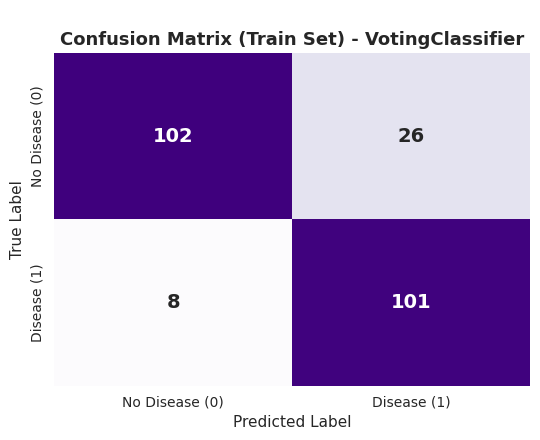

In [59]:
# VotingClassifier – Train Evaluation (xgb + ada + svm)

from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Calibrate only SVM (MLP is not included in this best combination)
svm_calibrated = CalibratedClassifierCV(svm_model, method='sigmoid', cv=5)

# Define VotingClassifier with best-performing combination based on F1 Score
voting_model = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),       # XGBoost - probabilistic
        ('ada', best_ada),       # AdaBoost - probabilistic
        ('svm', svm_calibrated)  # Calibrated SVM
    ],
    voting='soft',
    n_jobs=-1,
    verbose=1
)

# Train the VotingClassifier
voting_model.fit(X_train_scaled, y_train)

# Metadata (after fitting)
print("VotingClassifier includes the following base models:")
for name, estimator in voting_model.named_estimators_.items():
    model_type = type(estimator).__name__
    print(f" - {name.upper()}: {model_type}")

print(f"Voting Type: {voting_model.voting.upper()}")
print(f"Number of Models Combined: {len(voting_model.estimators)}")
print("Calibration applied to: SVM (using sigmoid method)\n")

# Predict on training data
y_train_pred_vote = voting_model.predict(X_train_scaled)

# Compute confusion matrix
cm_train_vote = confusion_matrix(y_train, y_train_pred_vote)
TN, FP, FN, TP = cm_train_vote.ravel()

# Calculate performance metrics
train_accuracy_vote = accuracy_score(y_train, y_train_pred_vote)
train_precision_vote = precision_score(y_train, y_train_pred_vote)
train_recall_vote = recall_score(y_train, y_train_pred_vote)
train_specificity_vote = TN / (TN + FP) if (TN + FP) > 0 else 0
train_f1_vote = f1_score(y_train, y_train_pred_vote)

# Save results
results['VotingClassifier'] = {
    'Train Accuracy': train_accuracy_vote,
    'Train Precision': train_precision_vote,
    'Train Recall': train_recall_vote,
    'Train Specificity': train_specificity_vote,
    'Train F1 Score': train_f1_vote,
    'Train Confusion Matrix': cm_train_vote
}

# Display performance metrics
train_metrics_df_vote = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_vote, train_precision_vote, train_recall_vote, train_specificity_vote, train_f1_vote]
})

print("Training Set Evaluation for VotingClassifier:\n")
display(
    train_metrics_df_vote.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - VotingClassifier , (in %)")
        .background_gradient(cmap='Purples', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#e6ccff'), ('font-weight', 'bold')]}
        ])
)

# Plot Confusion Matrix
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_vote, annot=True, fmt='d', cmap='Purples', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\nConfusion Matrix (Train Set) - VotingClassifier', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for VotingClassifier:



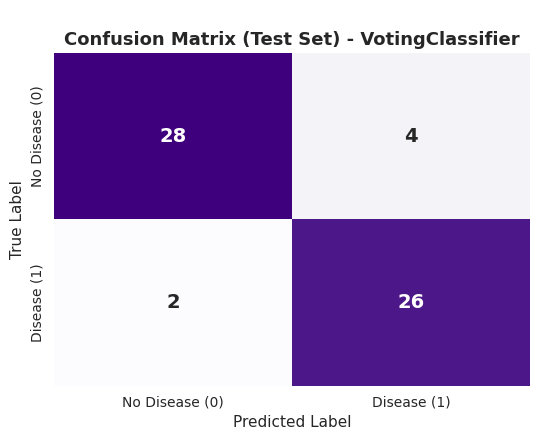

In [60]:
# VotingClassifier – Test Evaluation

# Predict on test data
y_test_pred_vote = voting_model.predict(X_test_scaled)

# Confusion matrix for test set
cm_test_vote = confusion_matrix(y_test, y_test_pred_vote)
TN_test, FP_test, FN_test, TP_test = cm_test_vote.ravel()

# Calculate test performance metrics
test_accuracy_vote = accuracy_score(y_test, y_test_pred_vote)
test_precision_vote = precision_score(y_test, y_test_pred_vote)
test_recall_vote = recall_score(y_test, y_test_pred_vote)
test_specificity_vote = TN_test / (TN_test + FP_test) if (TN_test + FP_test) > 0 else 0
test_f1_vote = f1_score(y_test, y_test_pred_vote)

# Save results
results['VotingClassifier'].update({
    'Test Accuracy': test_accuracy_vote,
    'Test Precision': test_precision_vote,
    'Test Recall': test_recall_vote,
    'Test Specificity': test_specificity_vote,
    'Test F1 Score': test_f1_vote,
    'Test Confusion Matrix': cm_test_vote
})

# Display test metrics
test_metrics_df_vote = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_vote, test_precision_vote, test_recall_vote, test_specificity_vote, test_f1_vote]
})

print("Test Set Evaluation for VotingClassifier:\n")
display(
    test_metrics_df_vote.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - VotingClassifier , (in %)")
        .background_gradient(cmap='Purples', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#e6ccff'), ('font-weight', 'bold')]}
        ])
)

# Plot Confusion Matrix for Test Set
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_vote, annot=True, fmt='d', cmap='Purples', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\nConfusion Matrix (Test Set) - VotingClassifier', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [61]:
# Permutation Feature Importance for VotingClassifier (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from IPython.display import display, Markdown, HTML
import pandas as pd
import numpy as np

# Float precision
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Convert scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, zero_division=0),
    'Recall': make_scorer(recall_score, zero_division=0),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score, zero_division=0)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight formatting
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Storage dictionaries
perm_results_all = {}

# Loop over metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation – Train
    perm_train = permutation_importance(
        estimator=voting_model,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation – Test
    perm_test = permutation_importance(
        estimator=voting_model,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # DataFrames
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Section title
    display(Markdown(f"## VotingClassifier – Permutation Feature Importances ({metric_name})"))

    # Train table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"VotingClassifier (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"VotingClassifier (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show both tables
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['VotingClassifier'] = perm_results_all

## VotingClassifier – Permutation Feature Importances (Accuracy)

## VotingClassifier – Permutation Feature Importances (Precision)

## VotingClassifier – Permutation Feature Importances (Recall)

## VotingClassifier – Permutation Feature Importances (Specificity)

## VotingClassifier – Permutation Feature Importances (F1 Score)

StackingClassifier includes the following base models:
 - XGB: XGBClassifier
 - SVM: CalibratedClassifierCV
 - MLP: MLPClassifier
Meta-Learner: MLPClassifier
Voting Strategy: Stacked Predictions
Number of Base Models Combined: 3
Calibration applied to: SVM (using sigmoid method)

Training Set Evaluation for StackingClassifier:



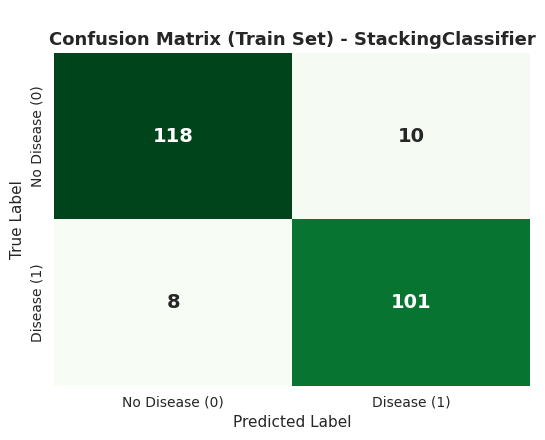

In [62]:
# StackingClassifier – Train Evaluation (xgb + svm + mlp)

from sklearn.ensemble import StackingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Calibrate only SVM (using sigmoid)
svm_calibrated = CalibratedClassifierCV(svm_model, method='sigmoid', cv=5)

# Define StackingClassifier with best-performing combination based on F1 Score
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('svm', svm_calibrated),
        ('mlp', mlp_model)
    ],
    final_estimator=MLPClassifier(hidden_layer_sizes=(16,), max_iter=500, random_state=42),
    cv=15,
    n_jobs=-1,
    passthrough=True
)

# Train the StackingClassifier
stacking_model.fit(X_train_scaled, y_train)

# Metadata (after fitting)
print("StackingClassifier includes the following base models:")
for name, estimator in stacking_model.named_estimators_.items():
    model_type = type(estimator).__name__
    print(f" - {name.upper()}: {model_type}")

print(f"Meta-Learner: {type(stacking_model.final_estimator).__name__}")
print(f"Voting Strategy: Stacked Predictions")
print(f"Number of Base Models Combined: {len(stacking_model.estimators)}")
print("Calibration applied to: SVM (using sigmoid method)\n")

# Predict probabilities on training data
y_train_proba_stack = stacking_model.predict_proba(X_train_scaled)[:, 1]

# Threshold tuning based on F1
thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []
metrics_by_thresh = []

for t in thresholds:
    preds = (y_train_proba_stack >= t).astype(int)
    acc = accuracy_score(y_train, preds)
    prec = precision_score(y_train, preds)
    rec = recall_score(y_train, preds)
    f1 = f1_score(y_train, preds)
    f1_scores.append(f1)
    metrics_by_thresh.append((t, acc, prec, rec, f1))

# Find best threshold
best_idx_train = np.argmax(f1_scores)
best_thresh_train = thresholds[best_idx_train]
best_metrics_train = metrics_by_thresh[best_idx_train]

# Final prediction using best threshold
y_train_pred_stack = (y_train_proba_stack >= best_thresh_train).astype(int)

# Compute confusion matrix
cm_train_stack = confusion_matrix(y_train, y_train_pred_stack)
TN, FP, FN, TP = cm_train_stack.ravel()

# Calculate performance metrics
train_accuracy_stack = best_metrics_train[1]
train_precision_stack = best_metrics_train[2]
train_recall_stack = best_metrics_train[3]
train_specificity_stack = TN / (TN + FP) if (TN + FP) > 0 else 0
train_f1_stack = best_metrics_train[4]

# Save results
results['StackingClassifier'] = {
    'Train Threshold': best_thresh_train,
    'Train Accuracy': train_accuracy_stack,
    'Train Precision': train_precision_stack,
    'Train Recall': train_recall_stack,
    'Train Specificity': train_specificity_stack,
    'Train F1 Score': train_f1_stack,
    'Train Confusion Matrix': cm_train_stack
}

# Display performance metrics
train_metrics_df_stack = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_stack, train_precision_stack, train_recall_stack, train_specificity_stack, train_f1_stack]
})

print("Training Set Evaluation for StackingClassifier:\n")
display(
    train_metrics_df_stack.style
        .format({'Value': '{:.2%}'})
        .set_caption(f"Training Performance - StackingClassifier , (in %)")
        .background_gradient(cmap='Greens', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#ccffcc'), ('font-weight', 'bold')]}
        ])
)

# Plot Confusion Matrix
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_stack, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title(f'\nConfusion Matrix (Train Set) - StackingClassifier',
          fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for StackingClassifier:



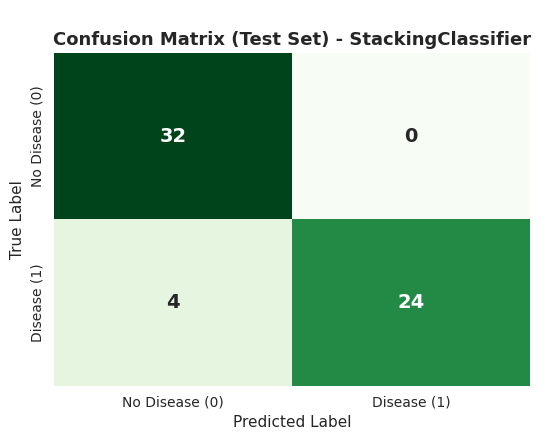

In [63]:
# StackingClassifier – Test Evaluation

# Predict on test data (probabilities)
y_test_proba_stack = stacking_model.predict_proba(X_test_scaled)[:, 1]

# Use best threshold from training phase
y_test_pred_stack = (y_test_proba_stack >= best_thresh_train).astype(int)

# Confusion matrix for test set
cm_test_stack = confusion_matrix(y_test, y_test_pred_stack)
TN_test, FP_test, FN_test, TP_test = cm_test_stack.ravel()

# Calculate test performance metrics
test_accuracy_stack = accuracy_score(y_test, y_test_pred_stack)
test_precision_stack = precision_score(y_test, y_test_pred_stack)
test_recall_stack = recall_score(y_test, y_test_pred_stack)
test_specificity_stack = TN_test / (TN_test + FP_test) if (TN_test + FP_test) > 0 else 0
test_f1_stack = f1_score(y_test, y_test_pred_stack)

# Save results
results['StackingClassifier'].update({
    'Test Threshold': best_thresh_train,
    'Test Accuracy': test_accuracy_stack,
    'Test Precision': test_precision_stack,
    'Test Recall': test_recall_stack,
    'Test Specificity': test_specificity_stack,
    'Test F1 Score': test_f1_stack,
    'Test Confusion Matrix': cm_test_stack
})

# Display test metrics
test_metrics_df_stack = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_stack, test_precision_stack, test_recall_stack, test_specificity_stack, test_f1_stack]
})

print("Test Set Evaluation for StackingClassifier:\n")
display(
    test_metrics_df_stack.style
        .format({'Value': '{:.2%}'})
        .set_caption(f"Test Performance - StackingClassifier , (in %)")
        .background_gradient(cmap='Greens', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#ccffcc'), ('font-weight', 'bold')]}
        ])
)

# Plot Confusion Matrix for Test Set
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_stack, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title(f'\nConfusion Matrix (Test Set) - StackingClassifier',
          fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [64]:
# Permutation Feature Importance for StackingClassifier (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from IPython.display import display, Markdown, HTML
import pandas as pd
import numpy as np

# Float precision
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Convert scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color configuration for bar charts (like your XGBoost style)
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight formatting
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Storage dictionaries
perm_results_all = {}

# Loop over metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation – Train
    perm_train = permutation_importance(
        estimator=stacking_model,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation – Test
    perm_test = permutation_importance(
        estimator=stacking_model,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # DataFrames
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Section title
    display(Markdown(f"## StackingClassifier – Permutation Feature Importances ({metric_name})"))

    # Train table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"StackingClassifier (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"StackingClassifier (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show both tables
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['StackingClassifier'] = perm_results_all

## StackingClassifier – Permutation Feature Importances (Accuracy)

## StackingClassifier – Permutation Feature Importances (Precision)

## StackingClassifier – Permutation Feature Importances (Recall)

## StackingClassifier – Permutation Feature Importances (Specificity)

## StackingClassifier – Permutation Feature Importances (F1 Score)

Training Set Performance Summary:





 Testing Set Performance Summary:



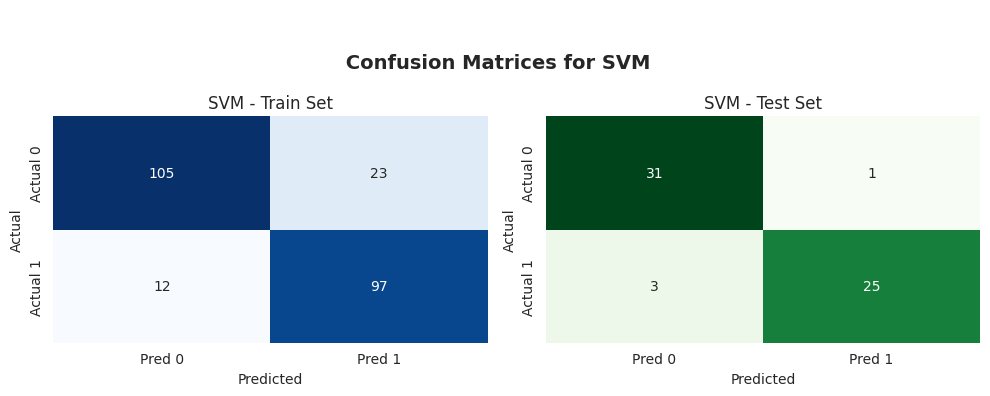

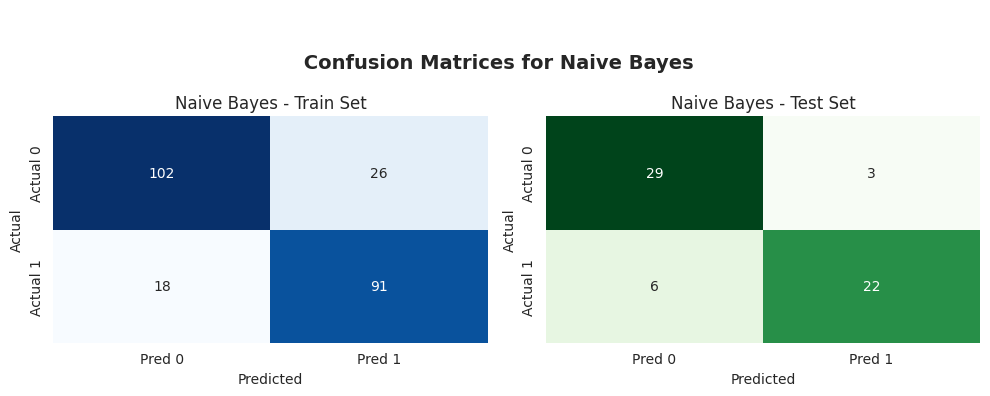

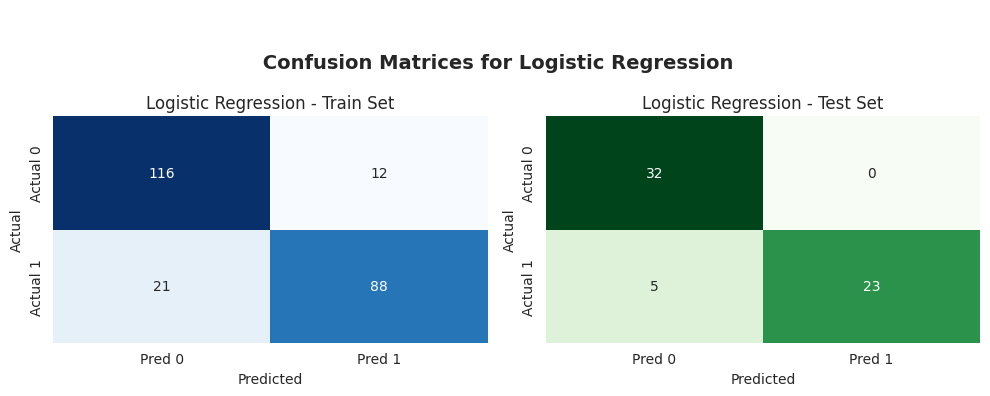

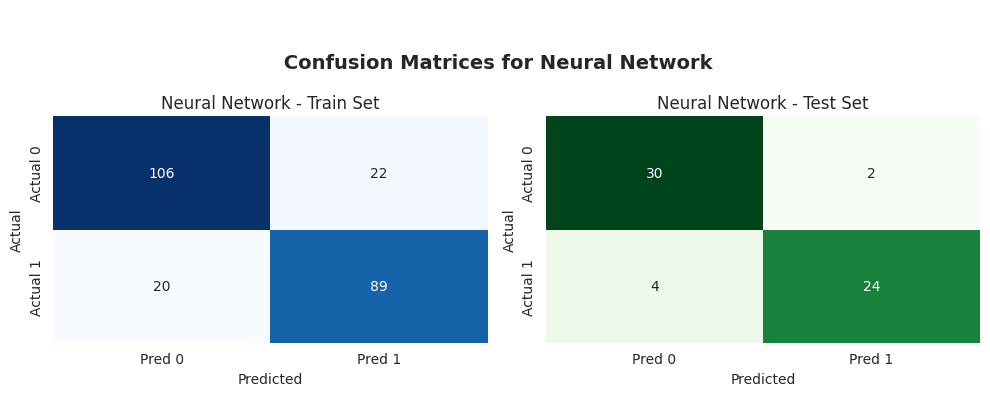

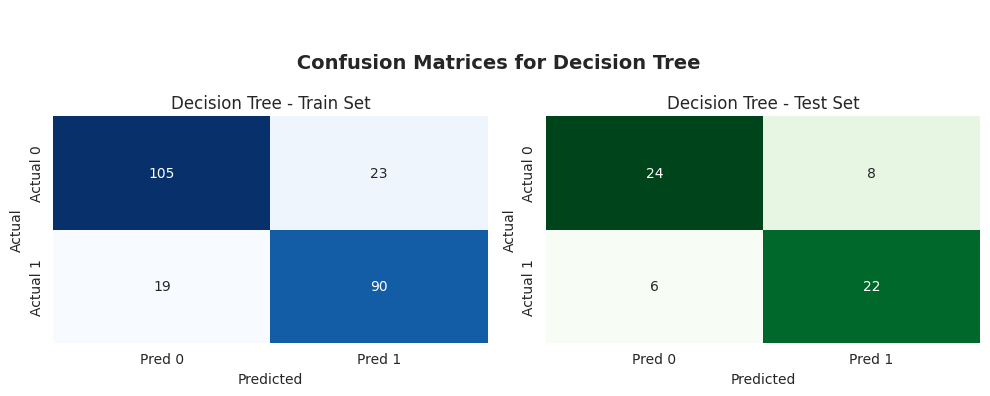

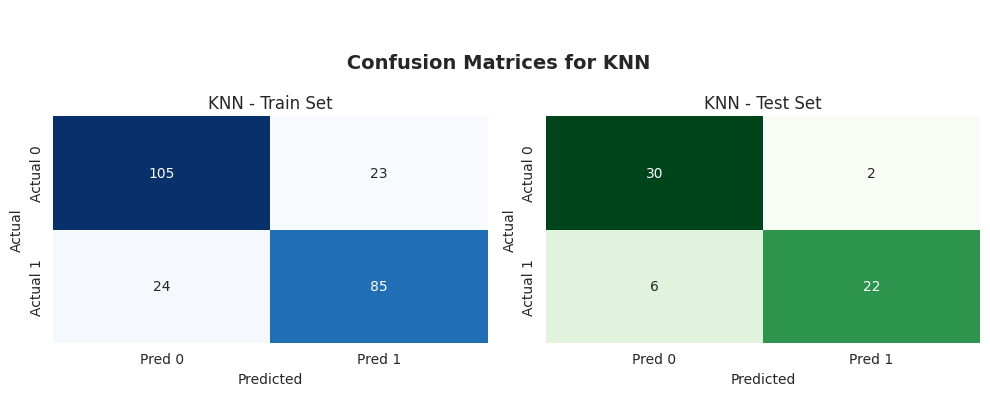

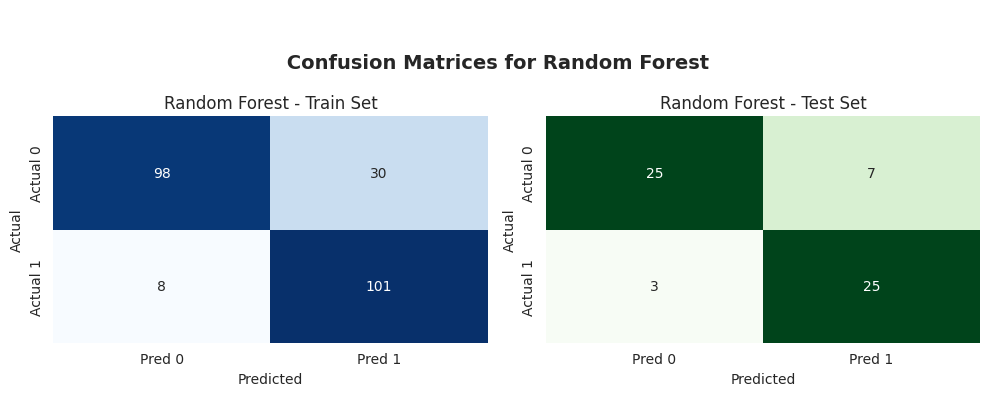

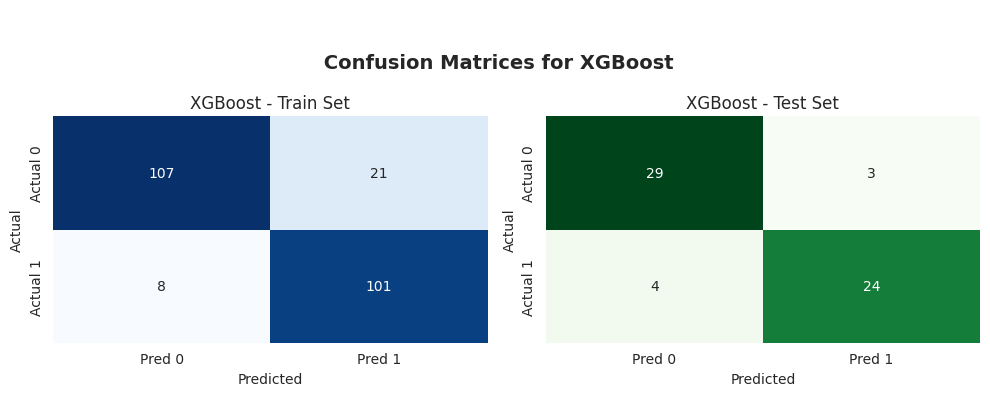

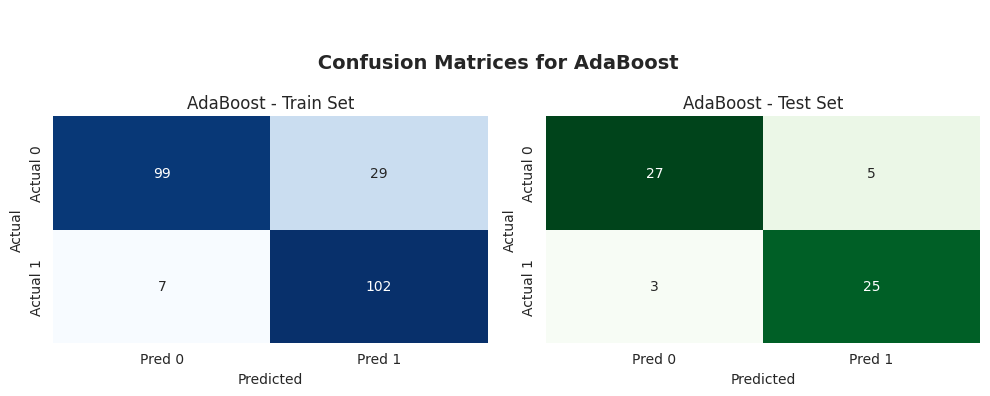

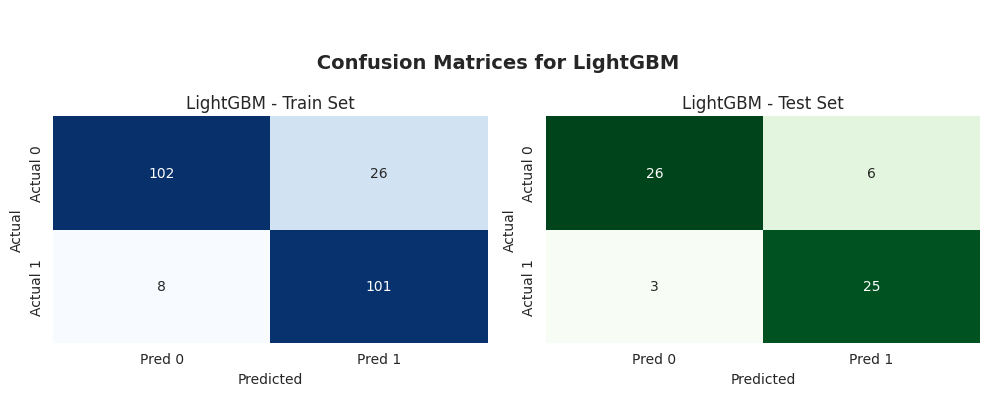

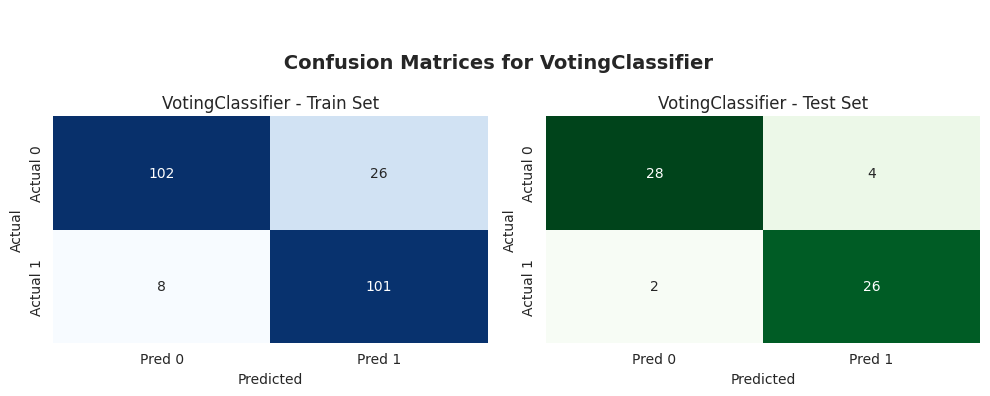

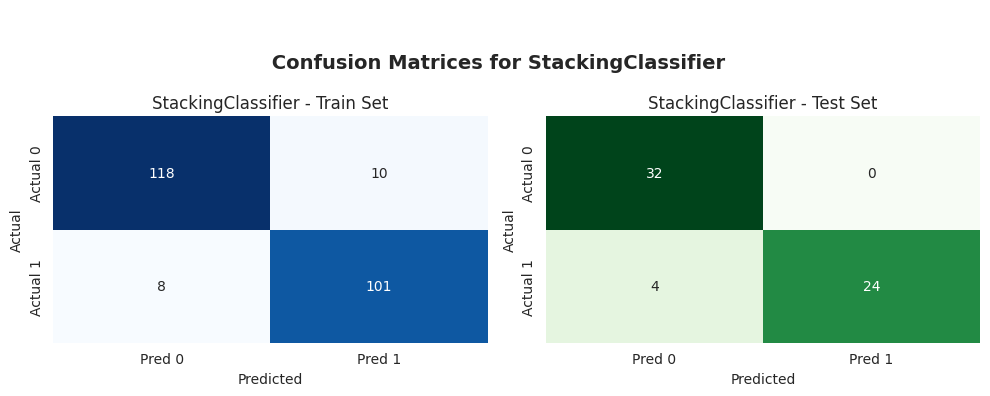

In [65]:
# Final Summary Report for All Models

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Safely convert to float for formatting
def safe_float(x):
    try:
        return float(x)
    except:
        return None

# List of all trained models
model_list = list(results.keys())

# Training metrics table
train_metrics_df = pd.DataFrame({
    'Model': model_list,
    'Accuracy': [safe_float(results[m]['Train Accuracy']) for m in model_list],
    'Precision': [safe_float(results[m]['Train Precision']) for m in model_list],
    'Recall': [safe_float(results[m]['Train Recall']) for m in model_list],
    'Specificity': [safe_float(results[m]['Train Specificity']) for m in model_list],
    'F1 Score': [safe_float(results[m]['Train F1 Score']) for m in model_list]
})

# Test metrics table
test_metrics_df = pd.DataFrame({
    'Model': model_list,
    'Accuracy': [safe_float(results[m]['Test Accuracy']) for m in model_list],
    'Precision': [safe_float(results[m]['Test Precision']) for m in model_list],
    'Recall': [safe_float(results[m]['Test Recall']) for m in model_list],
    'Specificity': [safe_float(results[m]['Test Specificity']) for m in model_list],
    'F1 Score': [safe_float(results[m]['Test F1 Score']) for m in model_list]
})

# Display styled training table
print("Training Set Performance Summary:\n")
display(
    train_metrics_df.style
        .format({col: '{:.2%}' for col in train_metrics_df.columns if col != 'Model'})
        .set_caption("Training Metrics (%)")
        .background_gradient(cmap='BuPu', subset=pd.IndexSlice[:, train_metrics_df.columns[1:]])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('background-color', '#e0d9f8'), ('font-weight', 'bold')]}])
)

# Display styled test table
print("\n\n Testing Set Performance Summary:\n")
display(
    test_metrics_df.style
        .format({col: '{:.2%}' for col in test_metrics_df.columns if col != 'Model'})
        .set_caption("Test Metrics (%)")
        .background_gradient(cmap='YlOrBr', subset=pd.IndexSlice[:, test_metrics_df.columns[1:]])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('background-color', '#ffe5b4'), ('font-weight', 'bold')]}])
)

# Plot confusion matrices side-by-side for each model
for model in model_list:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Training confusion matrix
    sns.heatmap(results[model]['Train Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[0])
    axes[0].set_title(f'{model} - Train Set')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    # Test confusion matrix
    sns.heatmap(results[model]['Test Confusion Matrix'], annot=True, fmt='d', cmap='Greens', cbar=False,
                xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[1])
    axes[1].set_title(f'{model} - Test Set')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    # Global title
    plt.suptitle(f'\n\n Confusion Matrices for {model}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

<div dir="rtl">


## 📝 گزارش تحلیلی عملکرد مدل‌ها

در این پروژه، با هدف پیش‌بینی بیماری قلبی بر پایه‌ی داده‌های پزشکی، عملکرد ۱۲ مدل یادگیری ماشین مورد بررسی قرار گرفت. ارزیابی‌ها در دو سطح **آموزش (Training)** و **آزمون (Testing)** با استفاده از معیارهای Accuracy، Precision، Recall، Specificity و F1 Score انجام شد.

---

##  ۱. مقایسه معیارهای آموزش (Training)

در جدول مربوط به آموزش، مدل‌هایی مثل **StackingClassifier، XGBoost و LightGBM** بیشترین دقت (Accuracy) و F1 را دارند.
اما نکته مهم در این سطح:

* مدل‌های **درختی (Tree-based)** مثل Random Forest و AdaBoost در Recall بسیار بالا عمل کردند، اما ممکن است به Overfitting دچار شده باشند.
* مدل **SVM** با F1 = 84.72% و Recall = 88.99% عملکرد خوبی در تشخیص بیماران داشته است.

---

##  ۲. عملکرد در آزمون (Testing)

در جدول تست، واقعیت قدرت مدل‌ها نمایان شد:

| مدل برتر از نظر عملکرد کلی | دلیل                                                                |
| -------------------------- | ------------------------------------------------------------------- |
| ✅ **SVM**                  | بهترین توازن بین Precision (96.15%)، Recall (89.29%) و F1 (92.59%)  |
| ✅ **StackingClassifier**   | دقیق‌ترین مدل از نظر Precision و F1، اما Recall کمی پایین‌تر از SVM |
| ✅ **Logistic Regression**  | Precision = 100%، اما Recall پایین‌تر از SVM                        |
| ❌ Decision Tree / KNN      | کاهش چشمگیر دقت در Test → نشانه‌ی Overfitting                       |

---

## 🧠 نکات کلیدی:

* **SVM** نه‌تنها در Train عملکرد خوبی داشت، بلکه در Test نیز **تعمیم‌پذیری بالایی** نشان داد.
* مدل‌های انسمبل مثل **StackingClassifier و XGBoost** در Test نیز قدرتمند ظاهر شدند و gap کمی داشتند.
* مدل‌های ساده‌تر (مثل Logistic و KNN) یا بیش‌از‌حد ساده یا دچار نوسان شدند و در نواحی مرزی دقت کافی نداشتند.

---

## ✍️ نتیجه‌گیری:

> بر اساس مقایسه‌ی دقیق معیارهای آموزش و آزمون، **مدل SVM** به‌عنوان متوازن‌ترین مدل از نظر **تشخیص بیماران واقعی (Recall)، جلوگیری از مثبت‌های کاذب (Precision)** و دقت کلی (F1 Score) انتخاب می‌شود. در کنار آن، مدل **StackingClassifier** نیز به‌عنوان مدلی ترکیبی با عملکرد پایدار و بسیار بالا قابل توجه است. در نتیجه، پیشنهاد می‌شود برای مسائل حساس مانند تشخیص بیماری قلبی، از **SVM یا مدل‌های انسمبل** استفاده شود تا هم دقت بالا و هم تعمیم‌پذیری حفظ گردد.

---


<div dir="rtl">


## 📝 تحلیل نهایی بر اساس Confusion Matrices


Confusion Matrix‌ها ابزار اصلی برای تحلیل خطاهای مدل‌های یادگیری ماشین هستند، مخصوصاً در مسائل پزشکی که تمایز بین **True Positive (شناسایی درست بیمار)** و **False Negative (عدم شناسایی بیمار)** بسیار حیاتی است.

---

## ✅ مقایسه عملکرد مدل‌ها بر اساس Confusion Matrix

| مدل                      | نقاط قوت                                                                                                               | نقاط ضعف                                                                                                               |
| ------------------------ | ---------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------- |
| **SVM**                  | عملکرد عالی روی داده‌ی تست: فقط 3 بیمار را از دست داده؛ Recall بسیار بالا (89.29%). تعادل عالی بین Precision و Recall. | نسبت به بعضی مدل‌ها، در داده‌ی آموزش تعداد FP نسبتاً زیاد داشته (23 نمونه).                                            |
| **Naive Bayes**          | سرعت بالا و عملکرد قابل قبول در Recall                                                                                 | اشتباه در شناسایی بیماران (FN=6) و مقدار FP نسبتاً بالا در Train و Test                                                |
| **Logistic Regression**  | Precision بسیار بالا (حتی 100% در تست)، بدون FP در تست                                                                 | 5 بیمار را از دست داده؛ نسبت به SVM و NN عملکرد ضعیف‌تری در Recall                                                     |
| **Neural Network**       | تعادل خوب بین TP و FP، خطاهای متوازن در هر دو کلاس                                                                     | کمی ناپایدارتر از SVM در داده آموزش؛ FN = 4 در تست                                                                     |
| **Decision Tree**        | تعداد TP قابل قبول در Train                                                                                            | افت شدید دقت در Test: 6 بیمار را از دست داده و 8 نمونه سالم را اشتباه بیمار پیش‌بینی کرده (FP بالا) ← Overfitting واضح |
| **KNN**                  | عملکرد بهتر از Tree                                                                                                    | اما هنوز 6 FN دارد، و کمی دچار نوسان در کلاس‌بندی است                                                                  |
| **Random Forest**        | FP زیاد در Train، ولی در Test عملکرد نسبتاً خوب (FN = 3)                                                               | تعادل ناقص بین حساسیت و اختصاصیت                                                                                       |
| **XGBoost**              | فقط 4 بیمار را در Test از دست داده؛ Recall خوب و عملکرد پایدار                                                         | خطای مثبت کاذب در Train قابل توجه (FP=21)                                                                              |
| **AdaBoost**             | شناسایی عالی بیماران در Train (FN=7)، FN کم در تست (3 مورد)                                                            | FP زیاد در Train (29 نمونه) و 5 نمونه در تست                                                                           |
| **LightGBM**             | FN بسیار کم (Train=8, Test=3)                                                                                          | FP در Train بالا (26 نمونه)، در Test هم FP=6                                                                           |
| **VotingClassifier**     | عملکرد قابل قبول؛ فقط 2 بیمار از دست رفته در تست                                                                       | 4 مورد FP در تست و 26 مورد در Train ← ممکن است کمی Overfit باشد                                                        |
| **StackingClassifier**   | کمترین خطای کلی: بدون FP در تست و فقط 4 FN                                                                             | عملکرد بسیار پایدار و متعادل در همه سطوح؛ بهترین گزینه جایگزین SVM                                                     |

---

## ✍️ نتیجه‌گیری:

> بر اساس مقایسه‌ی مستقیم confusion matrix‌ها، مدل‌های **SVM** و **StackingClassifier** بیشترین دقت در تشخیص بیماران قلبی را نشان داده‌اند. SVM با FN = 3 و FP = 1 در داده تست، و Stacking با FN = 4 و FP = 0، عملکرد بسیار خوبی از خود نشان داده‌اند. در مقابل، مدل‌هایی مثل Decision Tree و Naive Bayes با تعداد خطای بالا در طبقه‌بندی کلاس‌ها، دچار Overfitting یا ضعف در تعمیم‌پذیری هستند. در مسائل حساس پزشکی، مدل‌هایی با FN پایین و FP کنترل‌شده، مانند SVM و Stacking، اولویت دارند.

---

In [67]:
import pandas as pd
from IPython.display import display

def rank_metrics_dense(df: pd.DataFrame, cmap: str, caption: str, header_bg: str):
    # Make a deep copy of the dataframe for safe processing
    ranked_df = df.copy()

    # Extract only the metric columns (excluding 'Model')
    metric_columns = ranked_df.columns.drop('Model')

    # Clean and convert data to float
    for col in metric_columns:
        # Remove '%' if present
        if ranked_df[col].dtype == 'object':
            ranked_df[col] = ranked_df[col].str.replace('%', '', regex=False)
        # Convert to float (handle errors by coercing to NaN)
        ranked_df[col] = pd.to_numeric(ranked_df[col], errors='coerce')

    # Compute dense rank for each metric (1 = best, handles ties properly)
    for col in metric_columns:
        ranked_df[f"{col} Rank"] = ranked_df[col].rank(method='dense', ascending=False).astype(int)

    # Keep only the final columns: 'Model' and rank columns
    final_columns = ['Model'] + [f"{col} Rank" for col in metric_columns]
    ranked_df = ranked_df[final_columns]

    # Style the dataframe for a colorful and bold display
    styled = (
        ranked_df.style
            .set_caption(caption)
            .background_gradient(cmap=cmap, subset=pd.IndexSlice[:, ranked_df.columns[1:]])
            .set_properties(**{'text-align': 'center', 'font-weight': 'bold'})
            .set_table_styles([
                {'selector': 'th', 'props': [('background-color', header_bg),
                                             ('text-align', 'center'),
                                             ('font-weight', 'bold')]},
            ])
    )

    return styled

# ---------- Display train metric dense ranking ---------- #
print("Train Metric Rankings:\n")
styled_train_dense = rank_metrics_dense(
    train_metrics_df,
    cmap='BuPu_r',
    caption="Train Metric Rankings (1 = Best)",
    header_bg='#e0d9f8'
)
display(styled_train_dense)

# ---------- Display test metric dense ranking ---------- #
print("\nTest Metric Rankings:\n")
styled_test_dense = rank_metrics_dense(
    test_metrics_df,
    cmap='YlOrBr_r',
    caption="Test Metric Rankings (1 = Best)",
    header_bg='#ffe5b4'
)
display(styled_test_dense)

Train Metric Rankings:




Test Metric Rankings:



In [68]:
import pandas as pd
from IPython.display import display, Markdown, HTML

# Scientific Weights for Medical Applications
weights = {
    "Recall": 0.35,
    "F1 Score": 0.30,
    "Specificity": 0.15,
    "Precision": 0.10,
    "Accuracy": 0.10
}

# Spacer before formula
display(HTML("<br>"))

# Display the scientific formula first
display(Markdown("### Scientific Scoring Formula for Medical Models"))
display(Markdown(r"""
**Scientific Score** = `0.35 × Recall` + `0.30 × F1 Score` + `0.15 × Specificity` + `0.10 × Precision` + `0.10 × Accuracy`
"""))

# Spacer before training results
display(HTML("<br>"))

# Ranking function with reverse colormap (dark = better score)
def scientific_ranking(df: pd.DataFrame, caption: str, cmap: str, header_color: str):
    df = df.copy()
    df["Scientific Score"] = (
        df["Recall"] * weights["Recall"] +
        df["F1 Score"] * weights["F1 Score"] +
        df["Specificity"] * weights["Specificity"] +
        df["Precision"] * weights["Precision"] +
        df["Accuracy"] * weights["Accuracy"]
    )
    df["Rank"] = df["Scientific Score"].rank(ascending=False).astype(int)
    df_sorted = df.sort_values("Rank").reset_index(drop=True)

    styled = (
        df_sorted.style
        .format({
            "Accuracy": "{:.2%}",
            "Precision": "{:.2%}",
            "Recall": "{:.2%}",
            "Specificity": "{:.2%}",
            "F1 Score": "{:.2%}",
            "Scientific Score": "{:.2%}"
        })
        .set_caption(caption)
        .background_gradient(cmap=cmap, subset=["Scientific Score"])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th',
             'props': [('background-color', header_color),
                       ('color', 'black'),
                       ('font-weight', 'bold'),
                       ('text-align', 'center')]},
        ])
    )
    return styled

# Spacer before training table
display(HTML("<br>"))

# Display Training Set Results
display(scientific_ranking(
    train_metrics_df,
    caption="Scientific Model Ranking Based on Training Set",
    cmap='BuPu',
    header_color='#dcd6f7'
))

# Spacer between tables
display(HTML("<br>"))

# Display Testing Set Results
display(scientific_ranking(
    test_metrics_df,
    caption="Scientific Model Ranking Based on Testing Set",
    cmap='YlOrBr',
    header_color='#ffe5b4'
))

# Final spacing
display(HTML("<br>"))

### Scientific Scoring Formula for Medical Models


**Scientific Score** = `0.35 × Recall` + `0.30 × F1 Score` + `0.15 × Specificity` + `0.10 × Precision` + `0.10 × Accuracy`


<div dir="rtl">


> **Scientific Score = 0.35 × Recall + 0.30 × F1 Score + 0.15 × Specificity + 0.10 × Precision + 0.10 × Accuracy**


## 📝 تحلیل نهایی بر اساس Scientific Score


### ✅ معیار طراحی Scientific Score:

در کاربردهای پزشکی، تشخیص درست افراد بیمار (Recall) و حفظ تعادل بین مثبت‌های واقعی و کاذب (F1 Score و Specificity) از اهمیت ویژه‌ای برخوردارند. به همین دلیل، در این فرمول:

* Recall با ضریب 0.35 بیشترین وزن دارد
* F1 Score با ضریب 0.30 تعادل کلی مدل را نشان می‌دهد
* Specificity، Precision و Accuracy هرکدام وزن کمتری دارند ولی حذف نشده‌اند

---

## 🔎 نتایج آموزش (Training Set):

| رتبه | مدل                         | Scientific Score | تحلیل                                           |
| ---- | --------------------------- | ---------------- | ----------------------------------------------- |
| 🥇 1 | **StackingClassifier**      | 92.14%           | مدل ترکیبی قدرتمند با تعادل عالی در همه معیارها |
| 🥈 2 | XGBoost                     | 88.26%           | عملکرد بسیار خوب به‌ویژه در Recall و F1         |
| 🥉 3 | LightGBM / VotingClassifier | 86.58%           | مدل‌های سبک‌تر اما پایدار                       |
| 6    | **SVM**                     | 85.47%           | عملکرد خوب، اما پایین‌تر از انسمبل‌ها در Train  |

---

## 🔎 نتایج آزمون (Testing Set):

| رتبه  | مدل                 | Scientific Score | تحلیل                                              |
| ----- | ------------------- | ---------------- | -------------------------------------------------- |
| 🥇 1  | **SVM**             | **92.51%**       | بهترین مدل از نظر تعمیم‌پذیری، دقت و تشخیص بیماران |
| 🥈 2  | StackingClassifier  | 92.03%           | دقیق و متعادل؛ بدون FP در تست                      |
| 🥉 3  | VotingClassifier    | 90.19%           | عملکرد ثابت و نزدیک به SVM                         |
| 4     | Logistic Regression | 89.98%           | Precision بالا ولی Recall پایین‌تر از SVM          |
| 🔻 12 | Decision Tree       | 76.51%           | پایین‌ترین رتبه؛ نشان‌دهنده ضعف در تعمیم‌پذیری     |

---

## ✅ نکات:

* مدل **SVM با Scientific Score = 92.51% در داده‌ی تست**، بهترین مدل برای استفاده در کاربردهای پزشکی این پروژه شناخته می‌شود.
* درحالی‌که **StackingClassifier در آموزش رتبه ۱** را دارد، اما در تست با اختلاف بسیار ناچیز دوم شده است.
* مدل‌هایی مانند **Logistic Regression** در معیارهایی مثل Precision عالی‌اند، اما Recall پایین‌ترشان باعث افت رتبه شده است.
* **Decision Tree با اختلاف بسیار در انتها قرار دارد** که نشان‌دهنده Overfitting شدید در آموزش و ضعف در تعمیم است.

---

## ✍️ جمع‌بندی:

> با توجه به نتایج به‌دست‌آمده از فرمول علمی امتیازدهی مبتنی بر معیارهای مهم پزشکی، مدل **SVM** به‌عنوان بهترین مدل از نظر عملکرد واقعی و تعمیم‌پذیری روی داده‌های جدید شناخته می‌شود. **StackingClassifier** نیز به‌عنوان رقیب نزدیک، عملکرد پایداری دارد و می‌تواند به‌عنوان یک گزینه ترکیبی جایگزین SVM استفاده شود. سایر مدل‌ها، از جمله XGBoost و VotingClassifier نیز در جایگاه‌های مناسبی قرار دارند، اما در نهایت SVM با حداکثر Scientific Score در داده تست، **انتخاب بهینه برای پیش‌بینی بیماری قلبی** است.

---


In [69]:
# Final Display of Permutation Feature Importances – All Models and All Metrics

from IPython.display import display, Markdown, HTML

# Loop over each model and its metrics
for model_name, metrics_dict in all_models_perm_results.items():
    for metric_name, result in metrics_dict.items():

        # Extract Train and Test DataFrames
        df_train = result['train'].copy()
        df_test = result['test'].copy()

        # Display section title
        display(Markdown(f"## {model_name} – Permutation Feature Importances ({metric_name})"))

        # Function to style and return HTML table
        def style_df(df, dataset_type):
            return (
                df.style
                    .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
                    .bar(subset='Importance', color=importance_color_map[dataset_type], vmin=0)
                    .bar(subset='Std', color=std_color_map[dataset_type], vmin=0)
                    .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
                    .set_caption(f"{model_name} ({dataset_type.capitalize()}) – Feature Importances ({metric_name})")
                    .set_properties(**{'text-align': 'center'})
                    .set_table_styles([{
                        'selector': 'caption',
                        'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
                    }])
                    .to_html()
            )

        # Style tables
        train_html = style_df(df_train, 'train')
        test_html = style_df(df_test, 'test')

        # Display side-by-side
        html_block = f"""
        <div style="display: flex; gap: 50px; margin-bottom: 40px;">
            <div>{train_html}</div>
            <div>{test_html}</div>
        </div>
        """
        display(HTML(html_block))

## SVM – Permutation Feature Importances (Accuracy)

## SVM – Permutation Feature Importances (Precision)

## SVM – Permutation Feature Importances (Recall)

## SVM – Permutation Feature Importances (Specificity)

## SVM – Permutation Feature Importances (F1 Score)

## Naive Bayes – Permutation Feature Importances (Accuracy)

## Naive Bayes – Permutation Feature Importances (Precision)

## Naive Bayes – Permutation Feature Importances (Recall)

## Naive Bayes – Permutation Feature Importances (Specificity)

## Naive Bayes – Permutation Feature Importances (F1 Score)

## Logistic Regression – Permutation Feature Importances (Accuracy)

## Logistic Regression – Permutation Feature Importances (Precision)

## Logistic Regression – Permutation Feature Importances (Recall)

## Logistic Regression – Permutation Feature Importances (Specificity)

## Logistic Regression – Permutation Feature Importances (F1 Score)

## Neural Network – Permutation Feature Importances (Accuracy)

## Neural Network – Permutation Feature Importances (Precision)

## Neural Network – Permutation Feature Importances (Recall)

## Neural Network – Permutation Feature Importances (Specificity)

## Neural Network – Permutation Feature Importances (F1 Score)

## Decision Tree – Permutation Feature Importances (Accuracy)

## Decision Tree – Permutation Feature Importances (Precision)

## Decision Tree – Permutation Feature Importances (Recall)

## Decision Tree – Permutation Feature Importances (Specificity)

## Decision Tree – Permutation Feature Importances (F1 Score)

## KNN – Permutation Feature Importances (Accuracy)

## KNN – Permutation Feature Importances (Precision)

## KNN – Permutation Feature Importances (Recall)

## KNN – Permutation Feature Importances (Specificity)

## KNN – Permutation Feature Importances (F1 Score)

## Random Forest – Permutation Feature Importances (Accuracy)

## Random Forest – Permutation Feature Importances (Precision)

## Random Forest – Permutation Feature Importances (Recall)

## Random Forest – Permutation Feature Importances (Specificity)

## Random Forest – Permutation Feature Importances (F1 Score)

## XGBoost – Permutation Feature Importances (Accuracy)

## XGBoost – Permutation Feature Importances (Precision)

## XGBoost – Permutation Feature Importances (Recall)

## XGBoost – Permutation Feature Importances (Specificity)

## XGBoost – Permutation Feature Importances (F1 Score)

## AdaBoost – Permutation Feature Importances (Accuracy)

## AdaBoost – Permutation Feature Importances (Precision)

## AdaBoost – Permutation Feature Importances (Recall)

## AdaBoost – Permutation Feature Importances (Specificity)

## AdaBoost – Permutation Feature Importances (F1 Score)

## LightGBM – Permutation Feature Importances (Accuracy)

## LightGBM – Permutation Feature Importances (Precision)

## LightGBM – Permutation Feature Importances (Recall)

## LightGBM – Permutation Feature Importances (Specificity)

## LightGBM – Permutation Feature Importances (F1 Score)

## VotingClassifier – Permutation Feature Importances (Accuracy)

## VotingClassifier – Permutation Feature Importances (Precision)

## VotingClassifier – Permutation Feature Importances (Recall)

## VotingClassifier – Permutation Feature Importances (Specificity)

## VotingClassifier – Permutation Feature Importances (F1 Score)

## StackingClassifier – Permutation Feature Importances (Accuracy)

## StackingClassifier – Permutation Feature Importances (Precision)

## StackingClassifier – Permutation Feature Importances (Recall)

## StackingClassifier – Permutation Feature Importances (Specificity)

## StackingClassifier – Permutation Feature Importances (F1 Score)

In [70]:
# Save Final Models, Scaler, and Feature Names

import joblib
import os

# Define and create the directory
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

# Save all 12 models
joblib.dump(svm_model, os.path.join(save_dir, "svm.pkl"))                 # Support Vector Machine
joblib.dump(nb_model, os.path.join(save_dir, "naive_bayes.pkl"))         # Naive Bayes
joblib.dump(best_model_lr, os.path.join(save_dir, "logistic_regression.pkl"))  # Logistic Regression
joblib.dump(mlp_model, os.path.join(save_dir, "mlp.pkl"))                # Multi-Layer Perceptron
joblib.dump(best_tree, os.path.join(save_dir, "decision_tree.pkl"))     # Decision Tree
joblib.dump(best_knn, os.path.join(save_dir, "knn.pkl"))                # K-Nearest Neighbors
joblib.dump(calibrated_rf, os.path.join(save_dir, "random_forest.pkl")) # Random Forest
joblib.dump(calibrated_xgb, os.path.join(save_dir, "xgboost.pkl"))      # XGBoost
joblib.dump(calibrated_ada, os.path.join(save_dir, "adaboost.pkl"))     # AdaBoost
joblib.dump(calibrated_lgb, os.path.join(save_dir, "lightgbm.pkl"))     # LightGBM
joblib.dump(voting_model, os.path.join(save_dir, "voting.pkl"))         # Voting Classifier
joblib.dump(stacking_model, os.path.join(save_dir, "stacking.pkl"))     # Stacking Classifier

print("All 12 models saved in 'saved_models/'.")

# Save the fitted StandardScaler used for normalization
joblib.dump(scaler, os.path.join(save_dir, "scaler.pkl"))

# Save the exact column names used in the model (after One-Hot Encoding)
encoder_columns = X.columns.tolist()
joblib.dump(encoder_columns, os.path.join(save_dir, "encoder_columns.pkl"))

print("Scaler and feature names saved successfully.")

All 12 models saved in 'saved_models/'.
Scaler and feature names saved successfully.


In [71]:
import shutil
from google.colab import files

# Create zip file
shutil.make_archive("saved_models", 'zip', "saved_models")

# Print message
print("The ZIP file has been created successfully.")
print("Your download should begin shortly...")

# Trigger download
files.download("saved_models.zip")

The ZIP file has been created successfully.
Your download should begin shortly...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>